## NIMFA

http://nimfa.biolab.si/

Nimfa is a Python library for nonnegative matrix factorization. It includes implementations of several factorization methods, initialization approaches, and quality scoring. Both dense and sparse matrix representation are supported.

In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF 
import scipy.stats
import scipy.spatial as sp
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import pairwise_distances
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
simulated_samples = np.loadtxt("simulated_samples.txt", dtype="int")
true_suitability = np.loadtxt("true_suitability.txt", dtype="float")
print(simulated_samples.shape)
print(true_suitability.shape)
print(np.shape(simulated_samples), type(simulated_samples[0,0]))
print(true_suitability[np.where(simulated_samples == 1)])

(10000, 1000)
(10000, 1000)
(10000, 1000) <class 'numpy.int32'>
[0.977 0.95  0.999 ... 0.989 0.948 0.458]


In [48]:
import matplotlib.pyplot as plt

def normalize(array):
    normalized = []
    min_val = min(array)
    max_val = max(array)
    for i in range(0, len(array)):
        normalized.append((array[i] - min_val) / (max_val - min_val))
    return normalized

def compare_matrixes(generated, true, name):
    print(name)
    print('Spearman: {0}'.format(scipy.stats.spearmanr(generated, true).correlation))
    print('MAE {}'.format(mean_absolute_error(generated, true)))
    
def create_mistakes_plot(run_name, zero_mistakes, one_mistakes, one_zero_mistakes):
    mistakes_data = [np.absolute(zero_mistakes), np.absolute(one_mistakes), np.absolute(one_zero_mistakes)]
    titles = [
        'Predicted prob mistake where simulated samples were 0',
        'Predicted prob mistake where simulated samples were 1',
        'All predicted mistakes'
    ] 

    f, a = plt.subplots(1, 3, figsize=(15, 7))
    a = a.ravel()
    for idx, ax in enumerate(a):
        ax.hist(mistakes_data[idx])
        ax.set_title(titles[idx] + '\n' + run_name)
        ax.set_xlabel('mistake')
        ax.set_ylabel('mistake count')
    plt.tight_layout()
    
def create_matrix_compare_plot(X, Y, x_label, y_label):
    Y = np.around(Y, decimals=3)
    X_argsort = X.argsort()
    sorted_X = X[X_argsort]
    sorted_Y = Y[X_argsort]
    
    fig = plt.figure(figsize=(25, 15))
    plt.scatter(sorted_X, sorted_Y, c='r', s=0.5)
    plt.xlabel(x_label, fontsize=16)
    plt.ylabel(y_label, fontsize=16)
    plt.show()

def NMF_fun(samples, true_suit, rank_array, max_iter_num, tol_num, create_scatter_plot=False):
    for rank in rank_array:
        factorizer = NMF(init='nndsvd', n_components=rank, max_iter=max_iter_num, solver="cd", tol=tol_num)
        W = factorizer.fit_transform(samples)
        H = factorizer.components_
        estimated_matrix = np.dot(W, H)
        
        run_name = "Rank: " + str(rank) + ", Max iter: " + str(max_iter_num)
        print(run_name + ", Tol: " + str(tol_num))
        
        estimated_matrix_zero = np.array(estimated_matrix)[np.where(samples==0)]
        estimated_matrix_zero = normalize(estimated_matrix_zero)
        true_matrix_zero = np.array(true_suit)[np.where(samples==0)]
        compare_matrixes(estimated_matrix_zero, true_matrix_zero, 'Zero')

        estimated_matrix_one = np.array(estimated_matrix)[np.where(samples==1)]
        estimated_matrix_one = normalize(estimated_matrix_one)
        true_matrix_one = np.array(true_suit)[np.where(samples==1)]
        compare_matrixes(estimated_matrix_one, true_matrix_one, 'One')
        if (create_scatter_plot):
            create_matrix_compare_plot(true_matrix_one, estimated_matrix_one, 'true matrix', 'generated matrix')
            create_matrix_compare_plot(true_matrix_one, np.absolute(np.subtract(true_matrix_one, estimated_matrix_one)), 'true matrix', 'mistake value (abs of true-generated)')

        estimated_matrix_flat = estimated_matrix.flatten()
        estimated_matrix_flat = normalize(estimated_matrix_flat)
        true_matrix_flat = true_suit.flatten()
        compare_matrixes(estimated_matrix_flat, true_matrix_flat, 'All data')
        if (create_scatter_plot):
            create_matrix_compare_plot(true_matrix_flat, estimated_matrix_flat, 'true matrix', 'generated matrix')
            create_matrix_compare_plot(true_matrix_flat, np.absolute(np.subtract(true_matrix_flat, estimated_matrix_flat)), 'true matrix', 'mistake value (abs of true-generated)')
        
        create_mistakes_plot(
            run_name,
            np.subtract(true_matrix_zero, estimated_matrix_zero), 
            np.subtract(true_matrix_one, estimated_matrix_one), 
            np.subtract(true_matrix_flat, estimated_matrix_flat))
        
        print("\n")

In [49]:
# shuffling matrixes

def shuffle_matrix(simulated_samples, true_suitability):
    random_rows = []
    for i in range(0, 10000):
        random_rows.append(i)
    np.random.shuffle(random_rows)
    
    shuffled_samples = []
    shuffled_true_suit = []
    for idx in random_rows:
        shuffled_samples.append(simulated_samples[idx])
        shuffled_true_suit.append(true_suitability[idx])
    
    # transpose to shuffle with numpy
    np.transpose(shuffled_samples)
    np.transpose(shuffled_true_suit)
    
    random_columns = []
    for i in range(0, 1000):
        random_columns.append(i)
    np.random.shuffle(random_columns)
    
    shuffled_samples_2 = []
    shuffled_true_suit_2 = []
    for idx in random_columns:
        shuffled_samples_2.append(shuffled_samples[idx])
        shuffled_true_suit_2.append(shuffled_true_suit[idx])
        
    # transpose again to get 1000x10,000 shape back
    np.transpose(shuffled_samples)
    np.transpose(shuffled_true_suit)
    
    return (shuffled_samples, shuffled_true_suit)
    

In [50]:
shuffle_1 = shuffle_matrix(simulated_samples, true_suitability)
simulated_samples_shuffled_1 = np.array(shuffle_1[0])
shuffled_true_suitability_1 = np.array(shuffle_1[1])

Rank: 100, Max iter: 3000, Tol: 1e-05
Zero
Spearman: 0.5525774357108617
MAE 0.4228064700963077
One
Spearman: 0.16288186300577298
MAE 0.6274886200750877


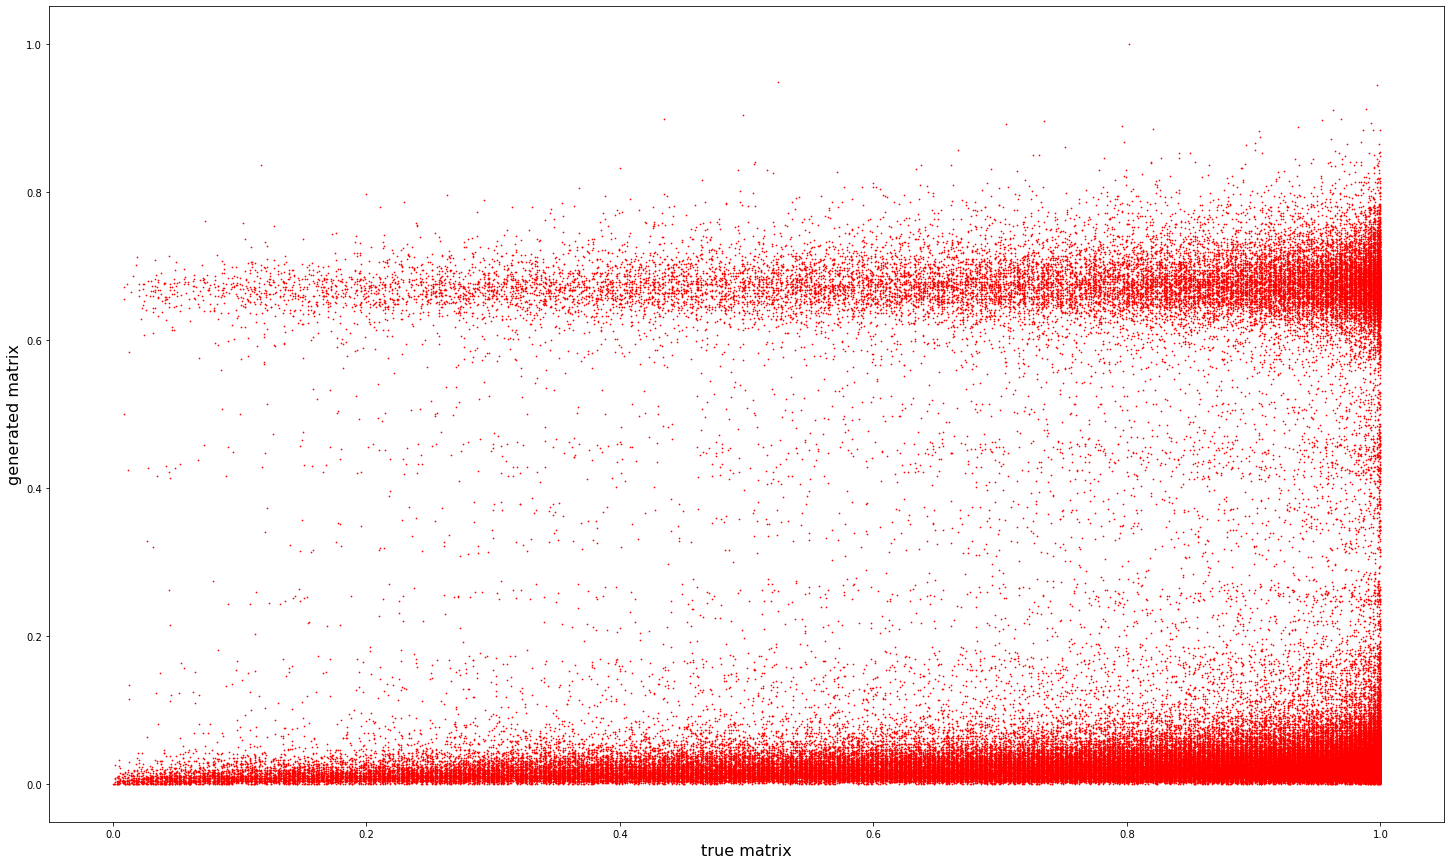

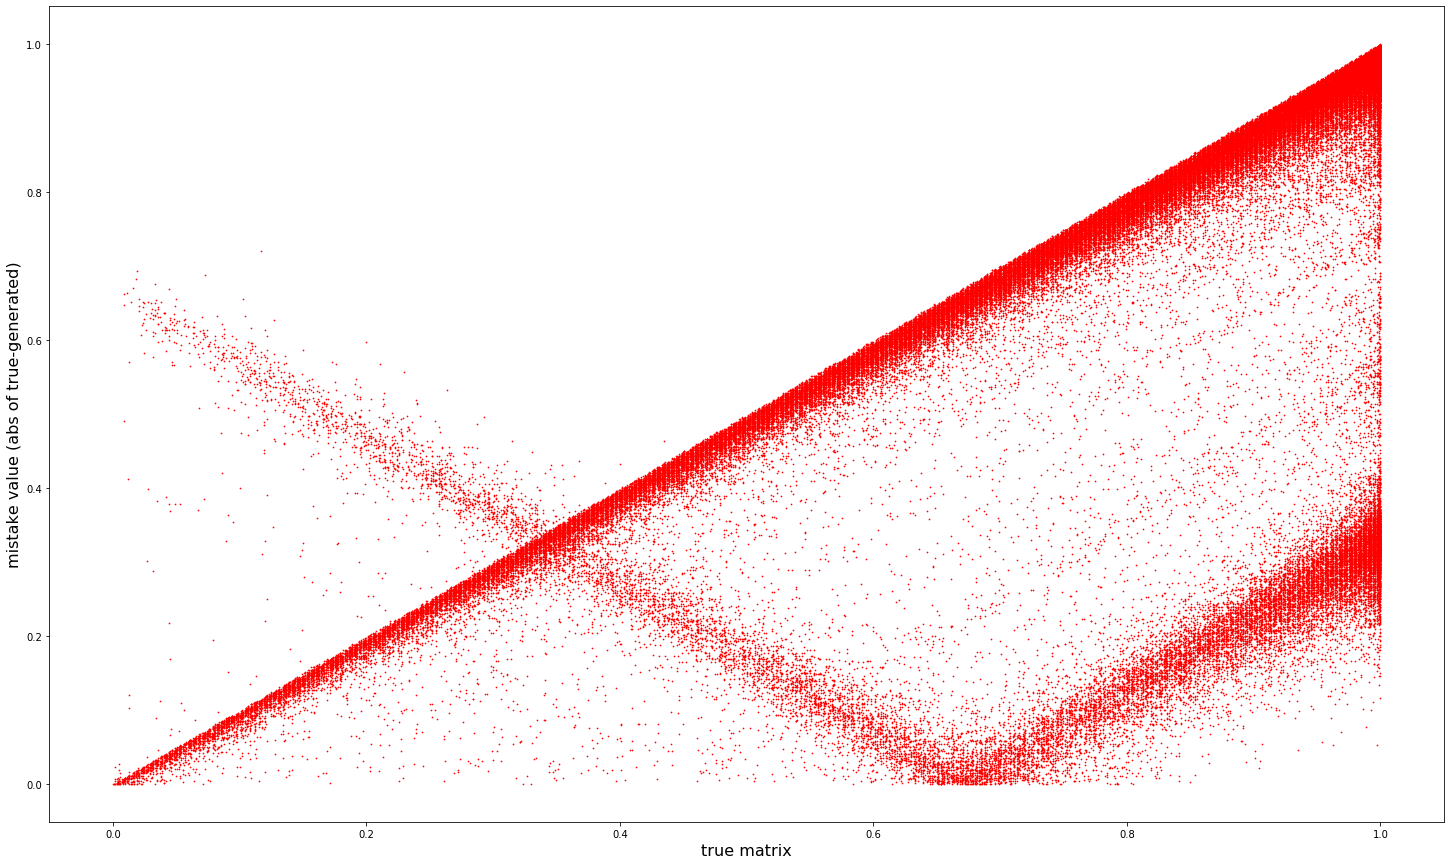

All data
Spearman: 0.5564633212713305
MAE 0.4318821280600579


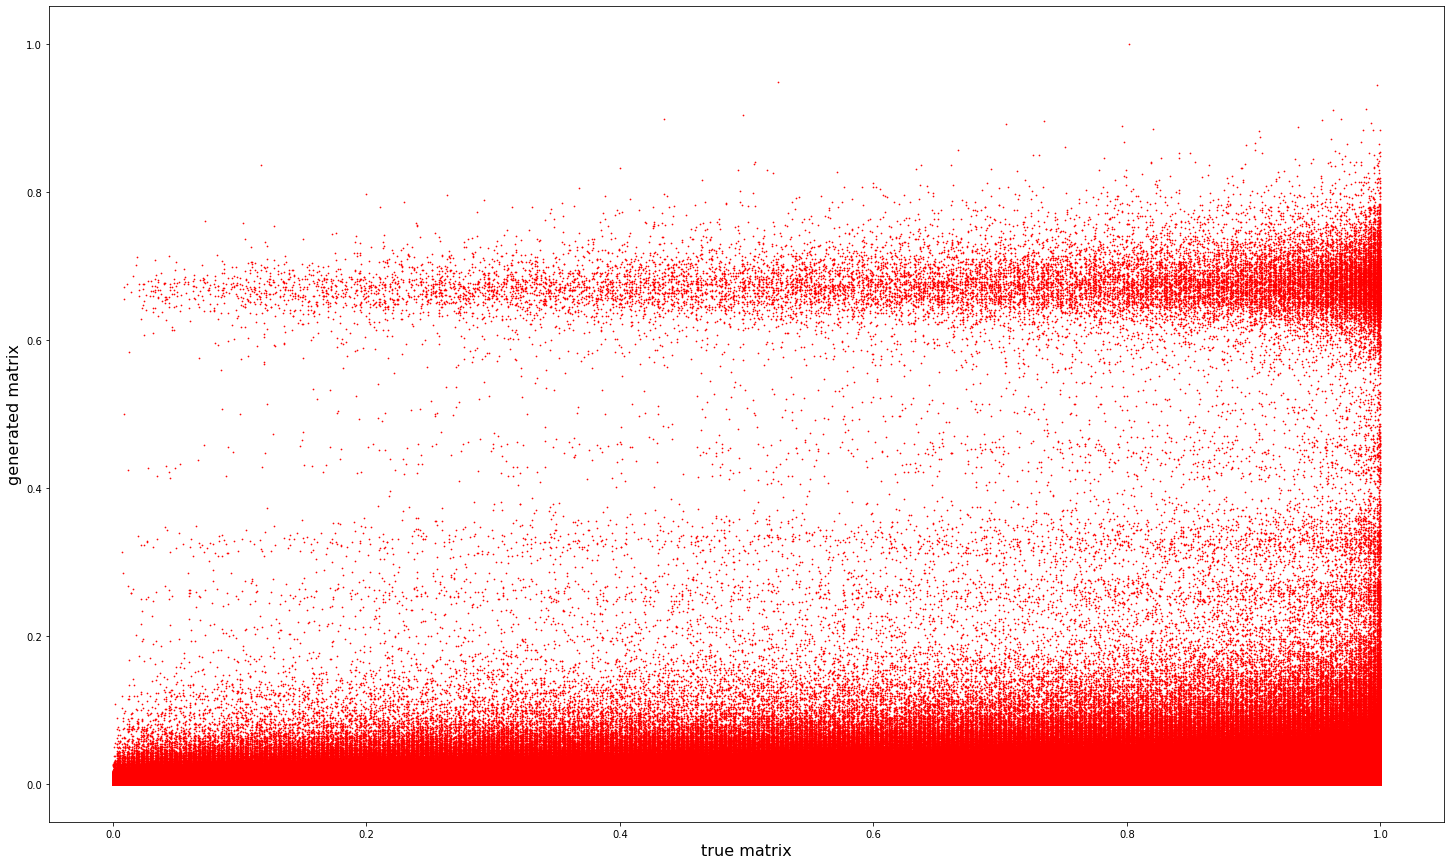

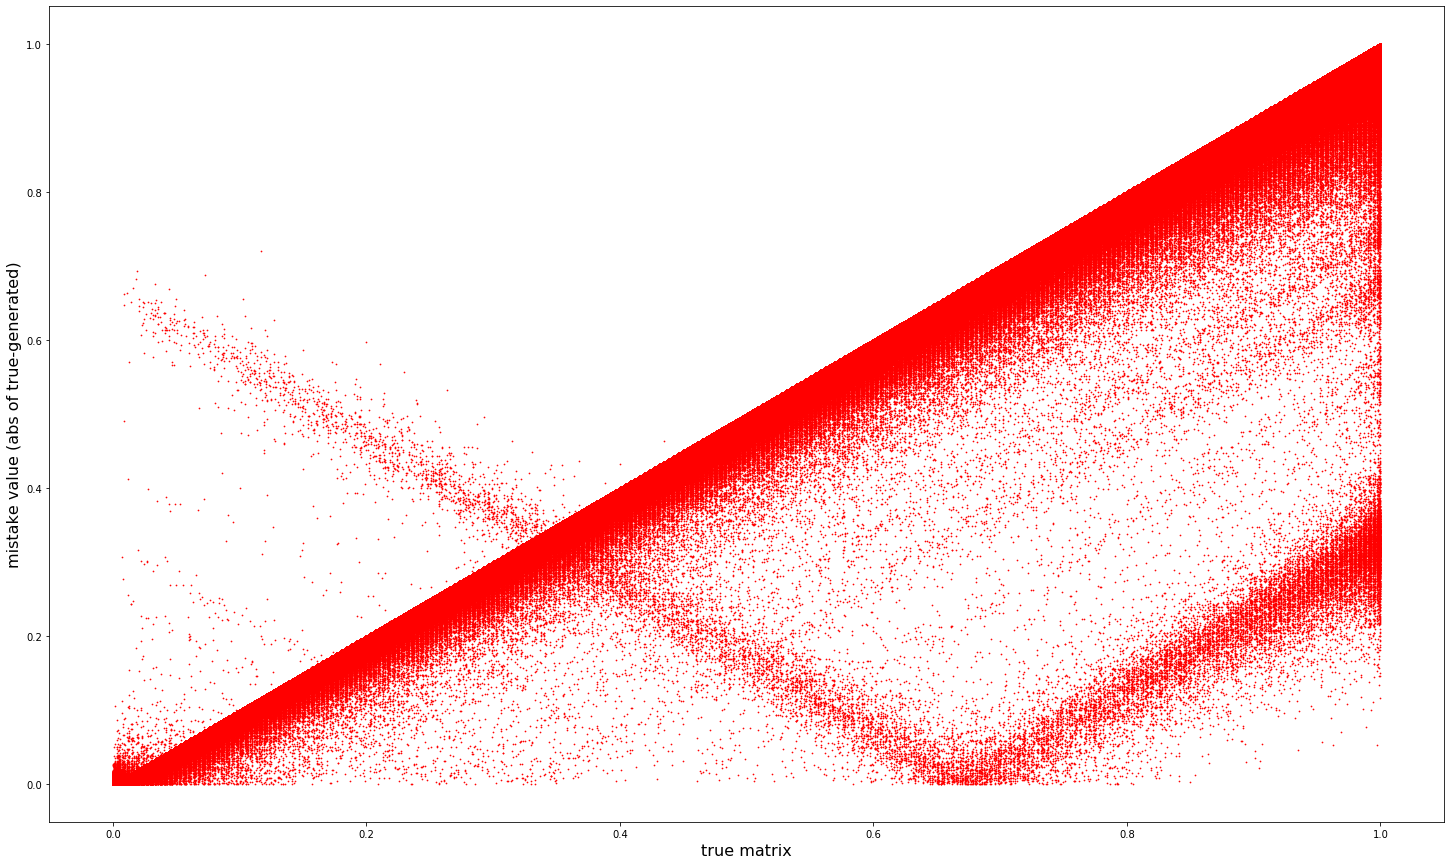

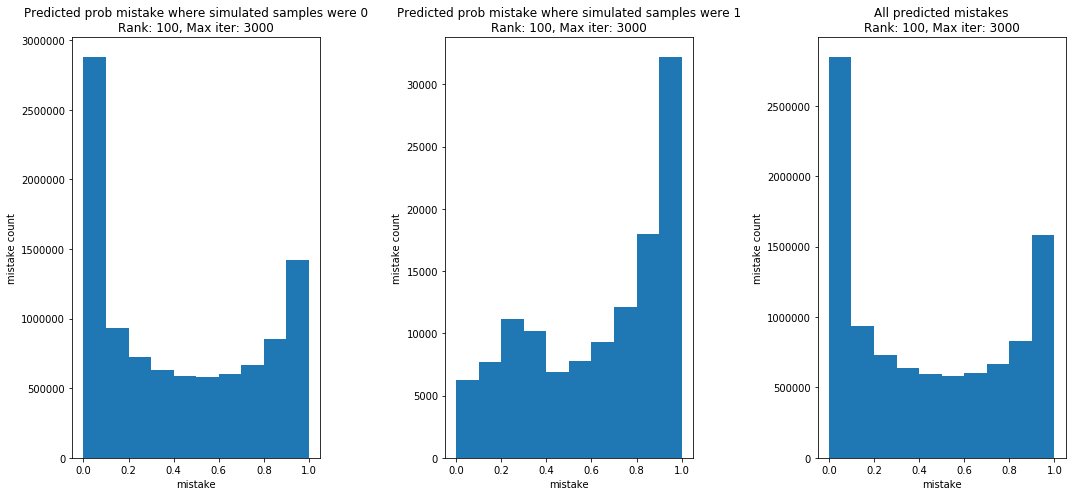

In [51]:
NMF_fun(simulated_samples_shuffled_1, shuffled_true_suitability_1, [100], 3000, 10e-6, create_scatter_plot=True)

Rank: 500, Max iter: 3000, Tol: 1e-05
Zero
Spearman: -0.11254569031240388
MAE 0.4299377339303
One
Spearman: 0.017436814554219863
MAE 0.3314548779812009


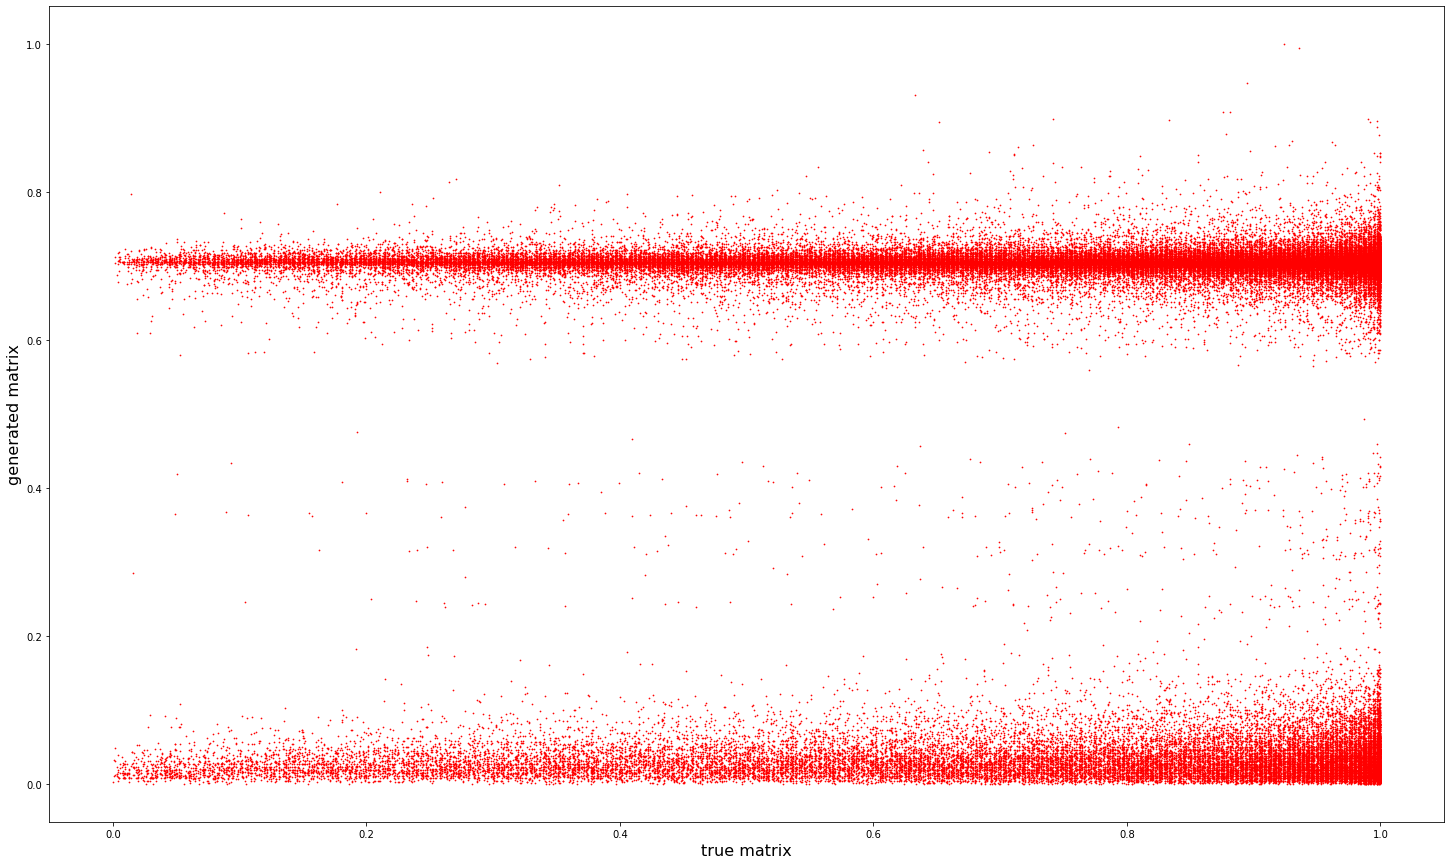

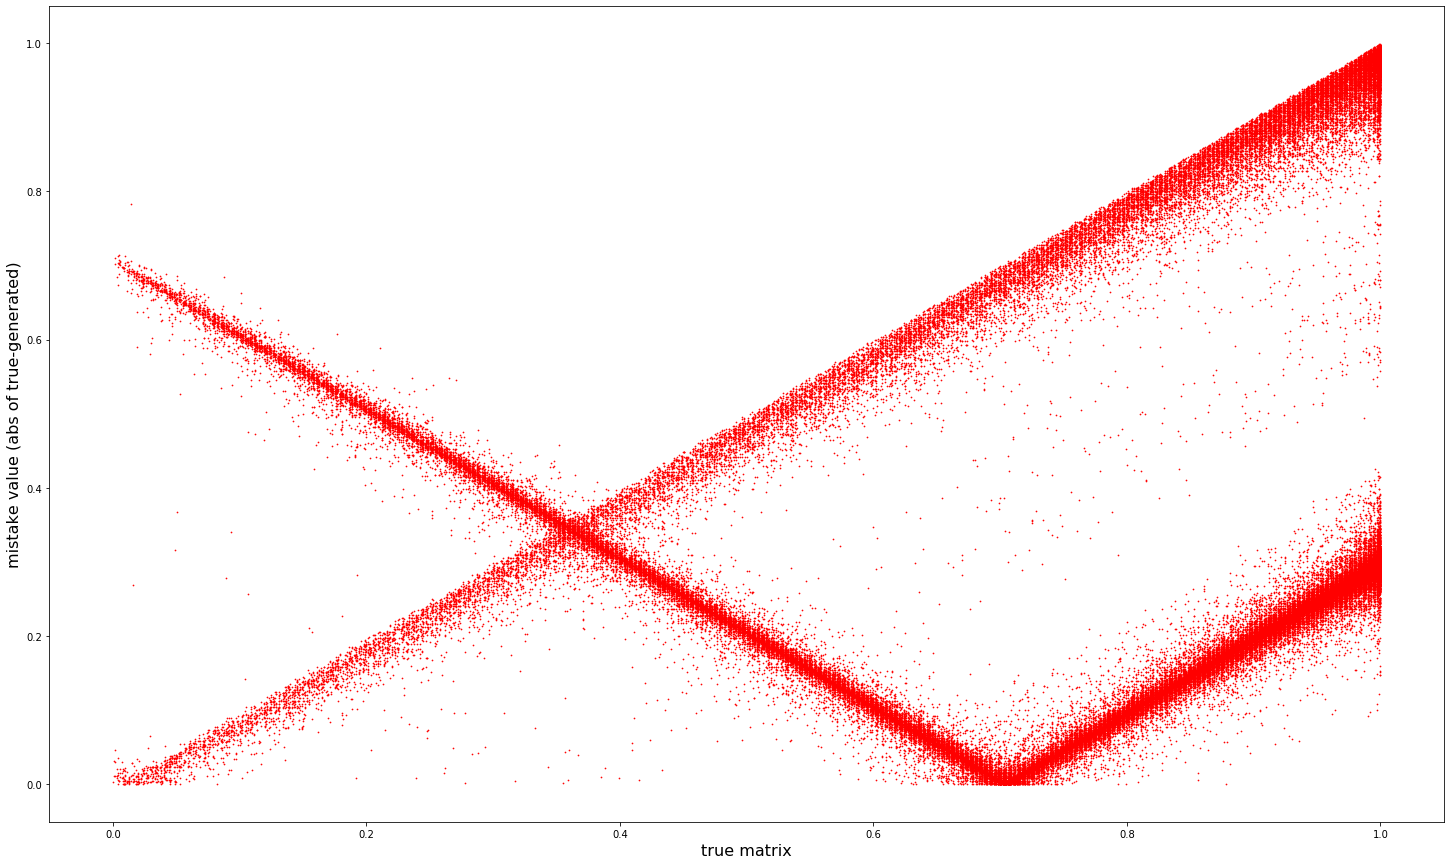

All data
Spearman: -0.09089257960932887
MAE 0.4327677480419931


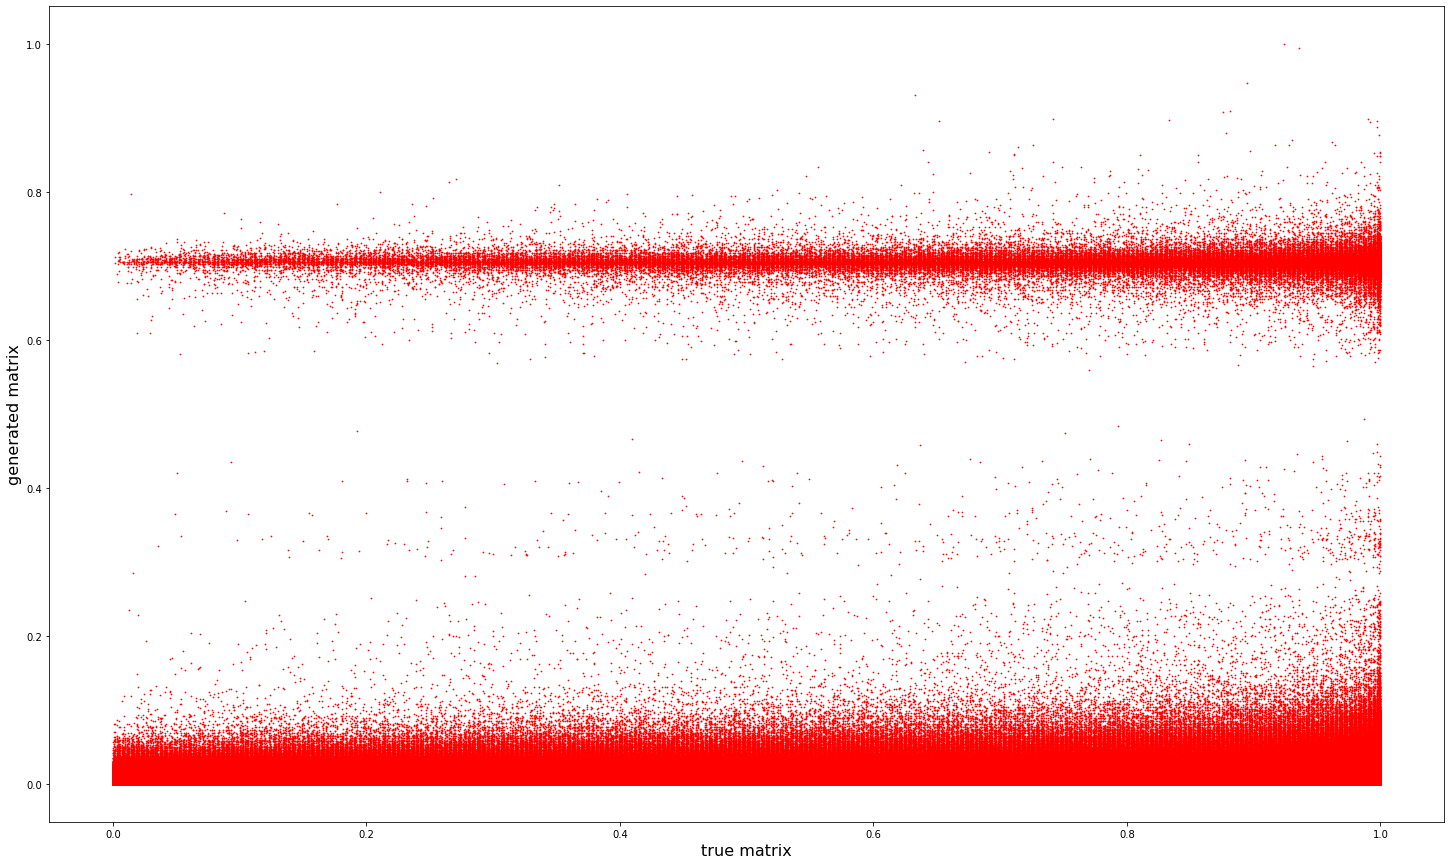

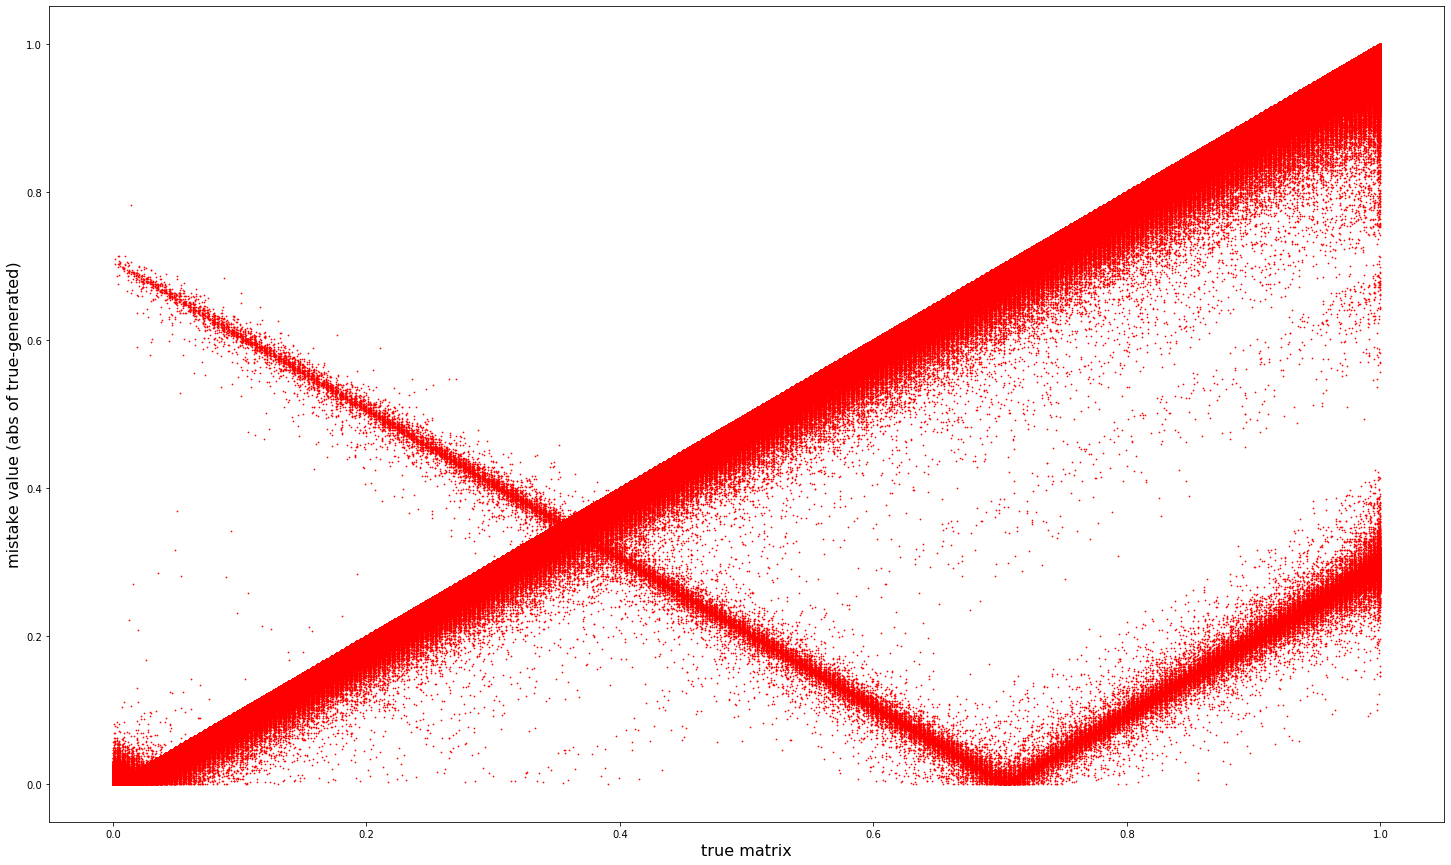

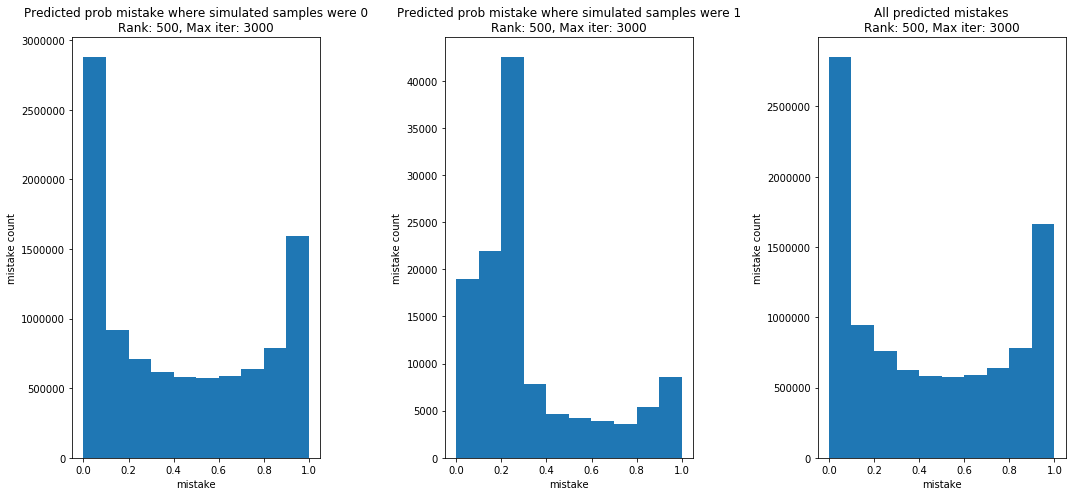

In [52]:
NMF_fun(simulated_samples_shuffled_1, shuffled_true_suitability_1, [500], 3000, 10e-6, create_scatter_plot=True)

Rank: 10, Max iter: 3000, Tol: 1e-05
Zero
Spearman: 0.7419336652556899
MAE 0.42271642147848754
One
Spearman: 0.2930316603259046
MAE 0.7294320999728768


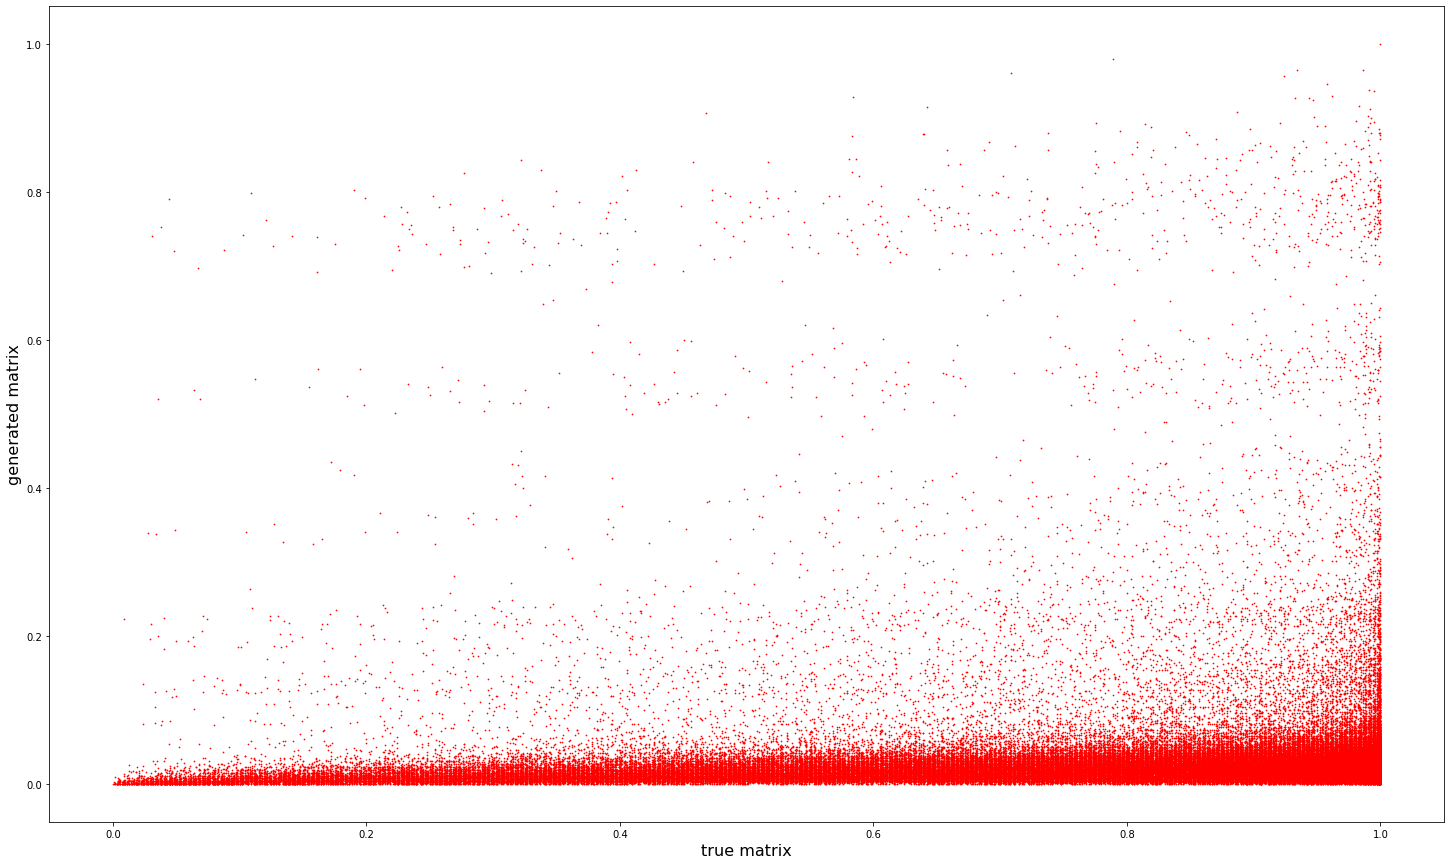

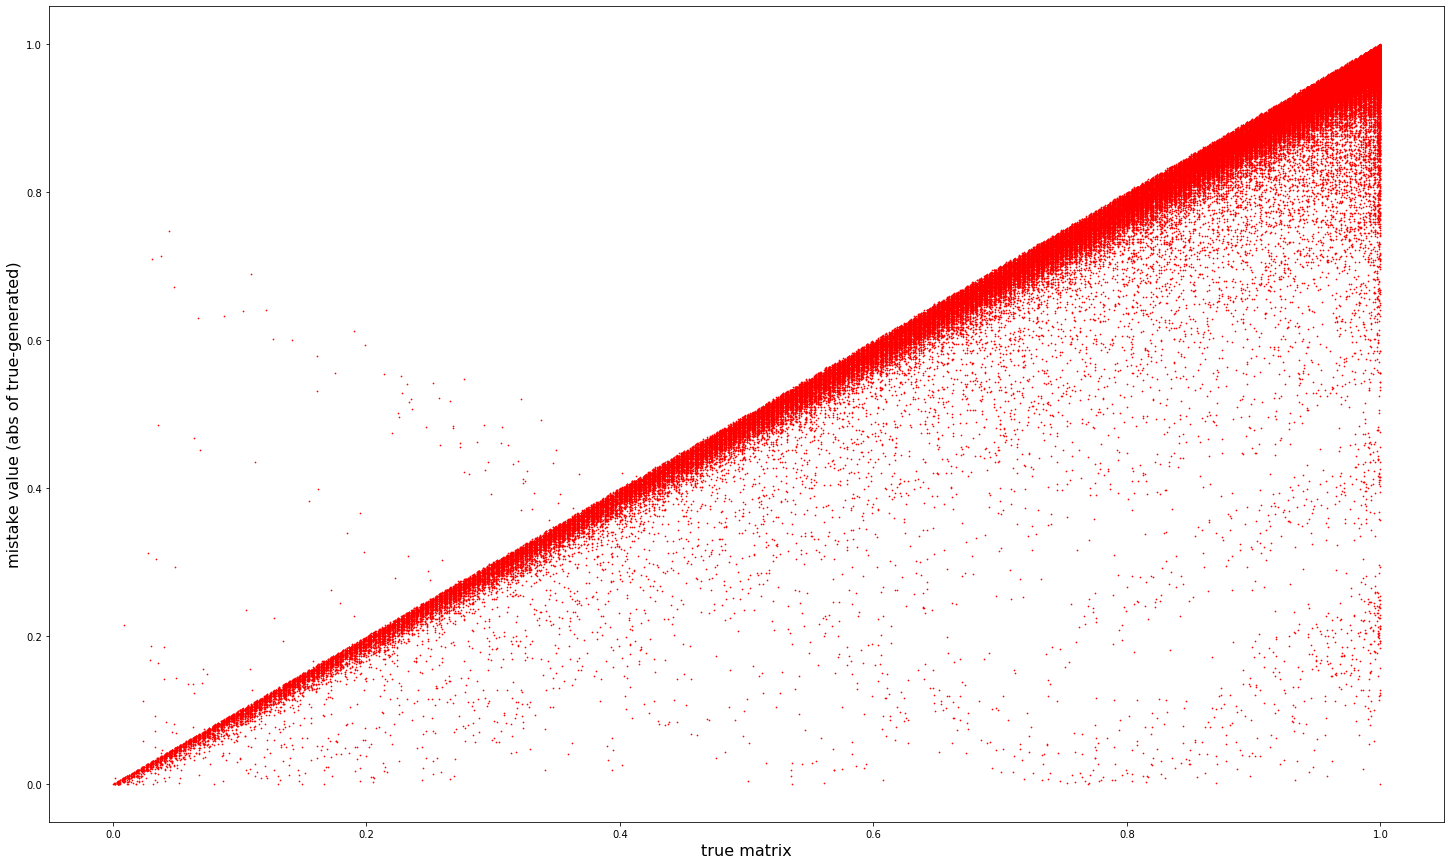

All data
Spearman: 0.7416552117664528
MAE 0.4314944792995557


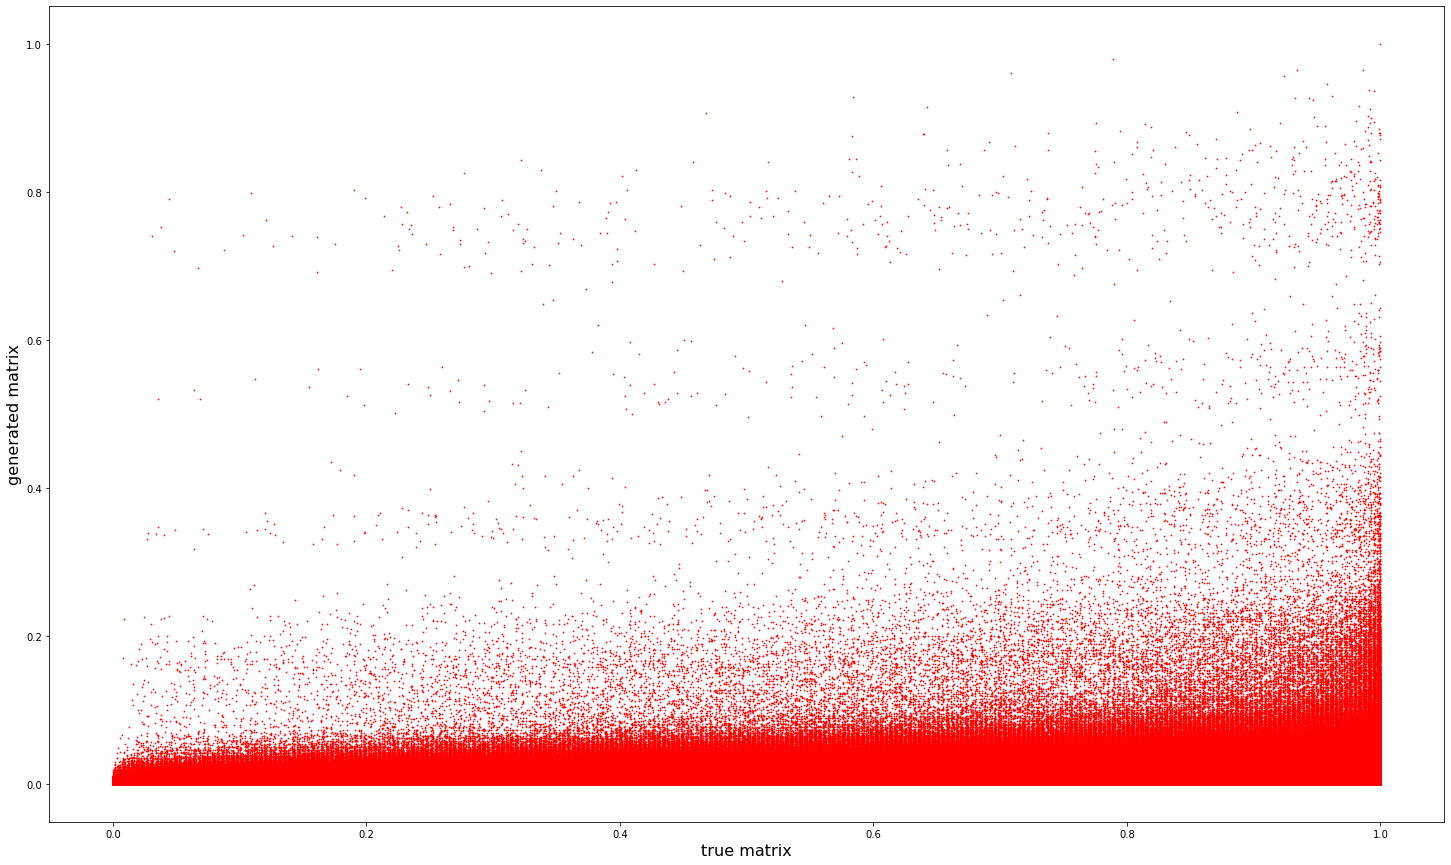

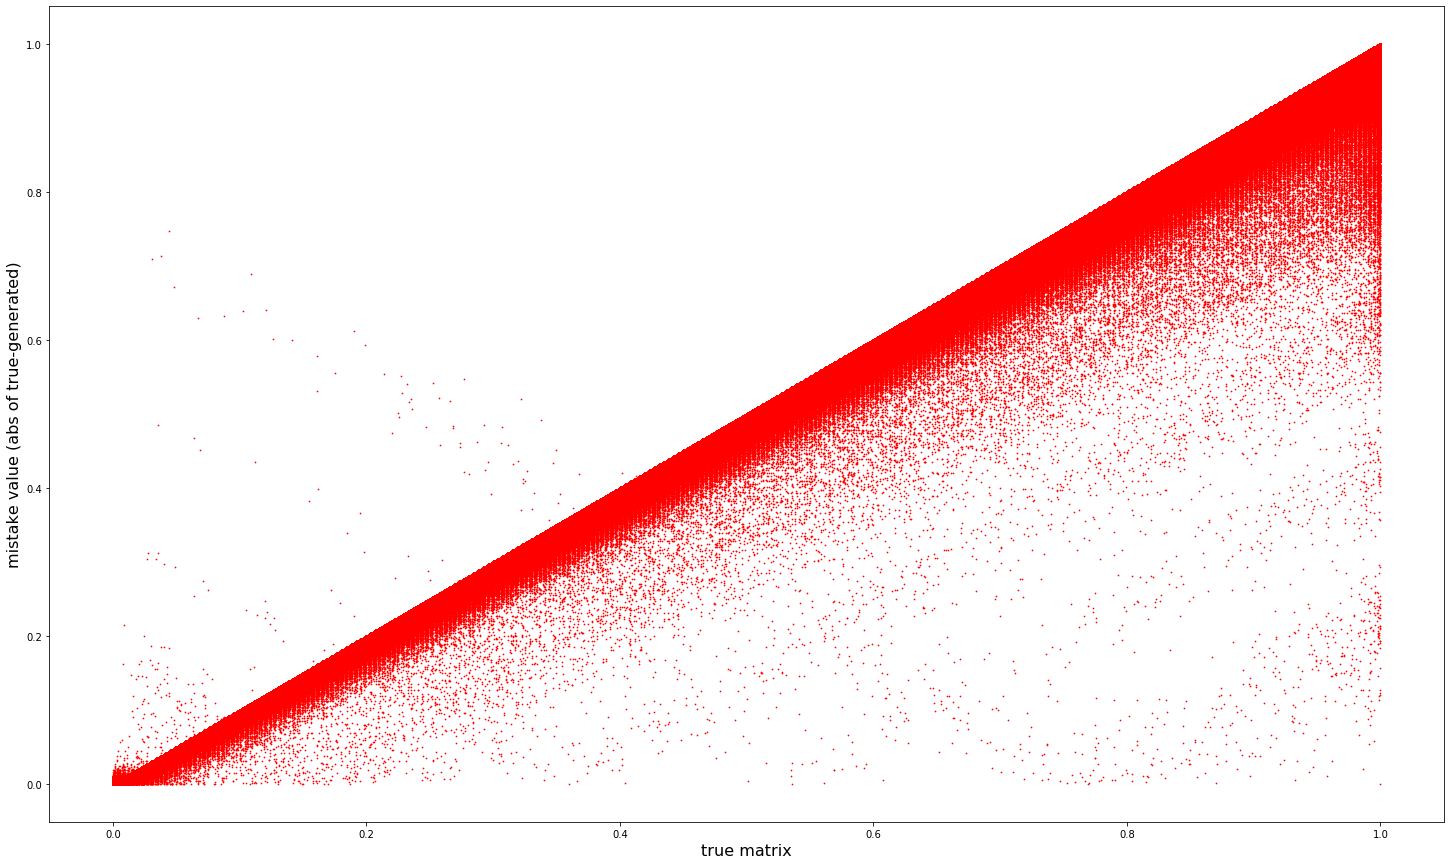

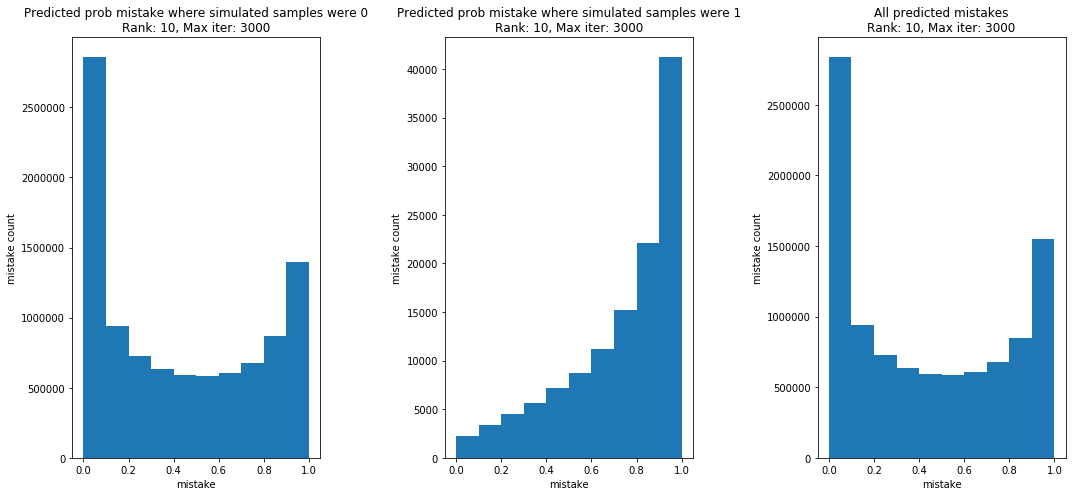

In [53]:
NMF_fun(simulated_samples_shuffled_1, shuffled_true_suitability_1, [10], 3000, 10e-6, create_scatter_plot=True)

Rank: 800, Max iter: 3000, Tol: 1e-05
Zero
Spearman: -0.19086835056030316
MAE 0.4352405220267365
One
Spearman: 0.032415157654488685
MAE 0.2357008061383191


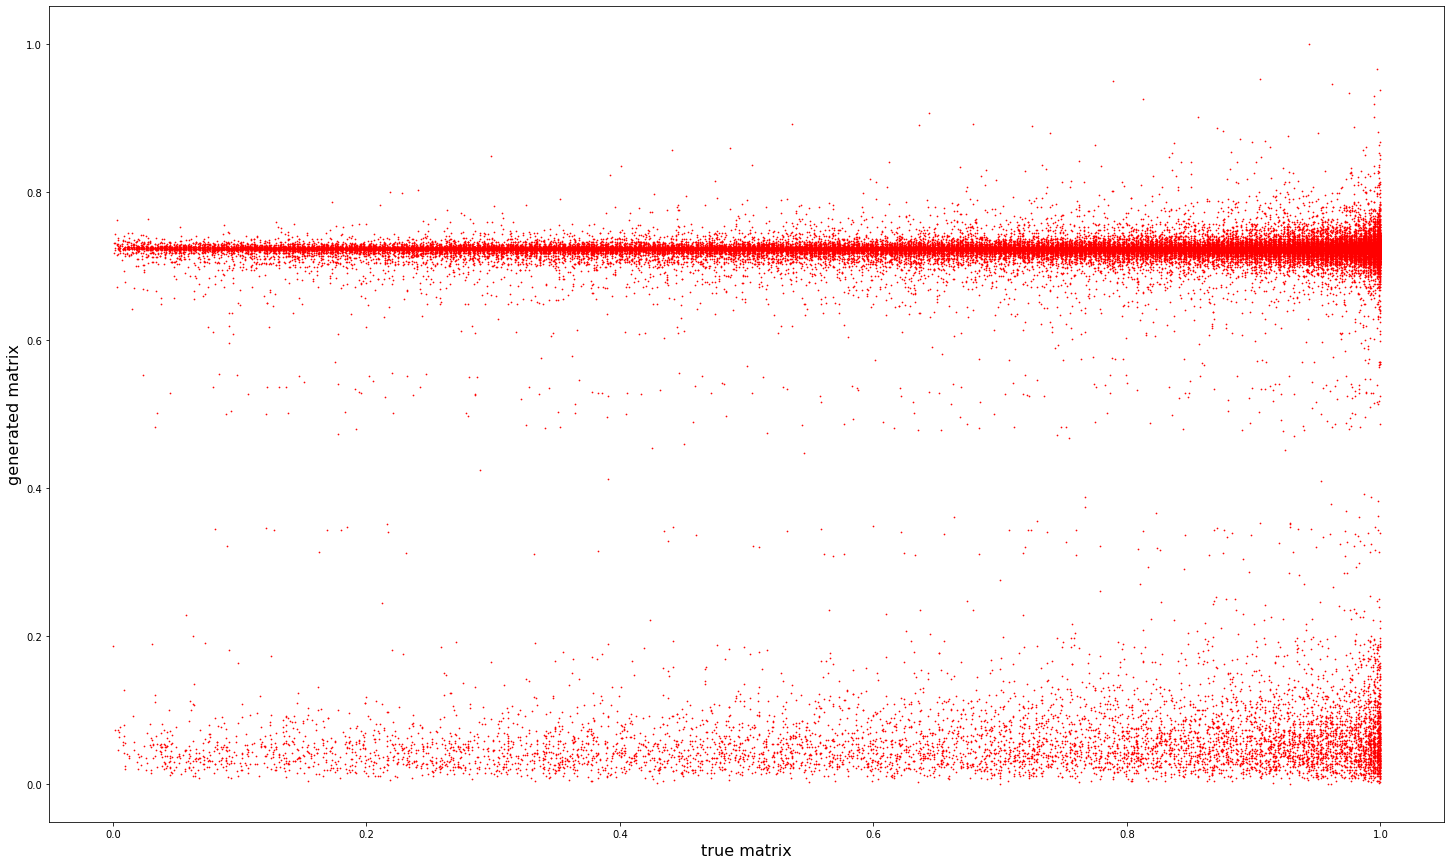

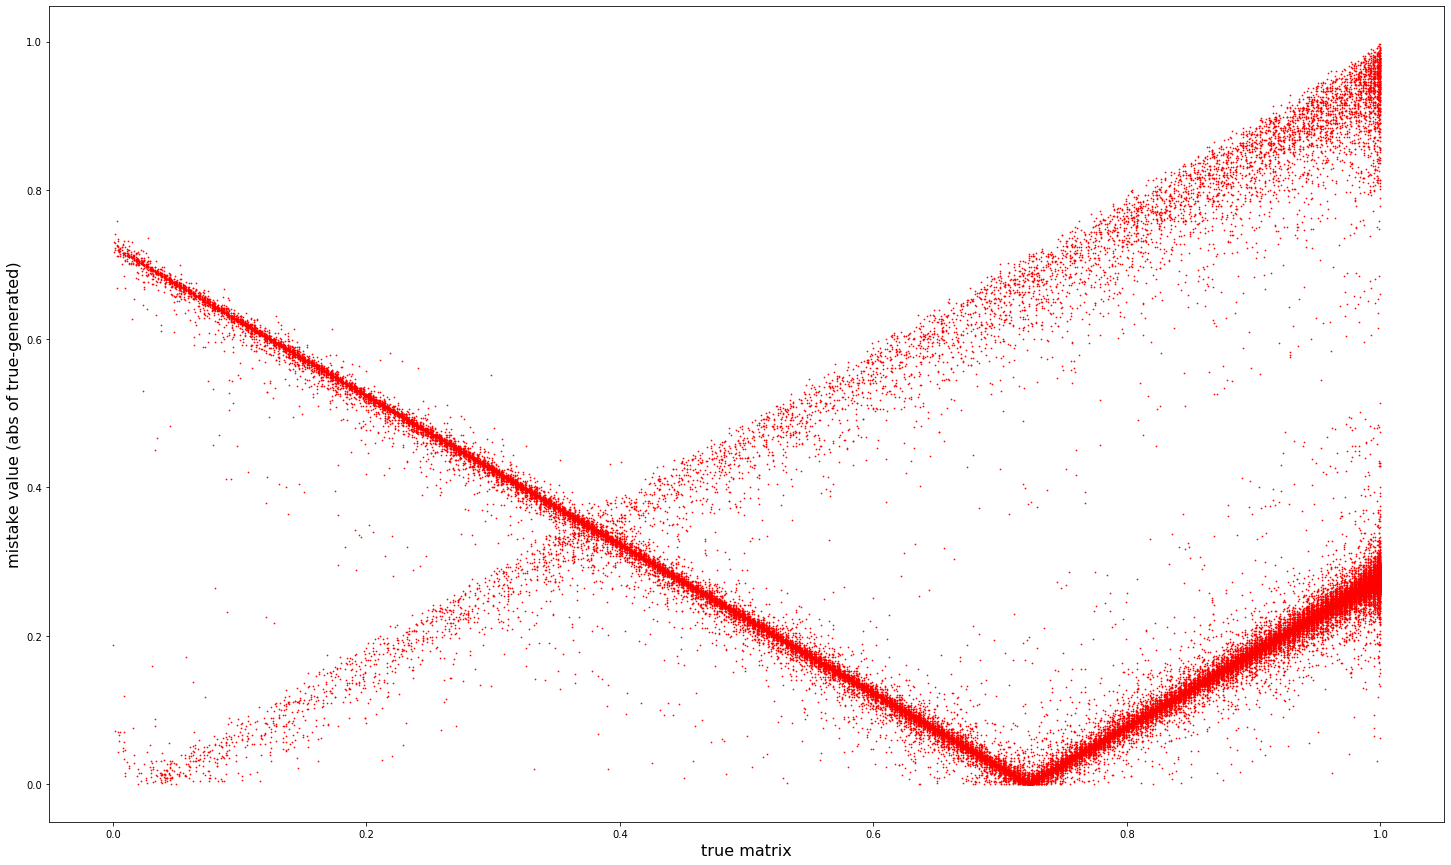

All data
Spearman: -0.1656604787048567
MAE 0.43406137956946667


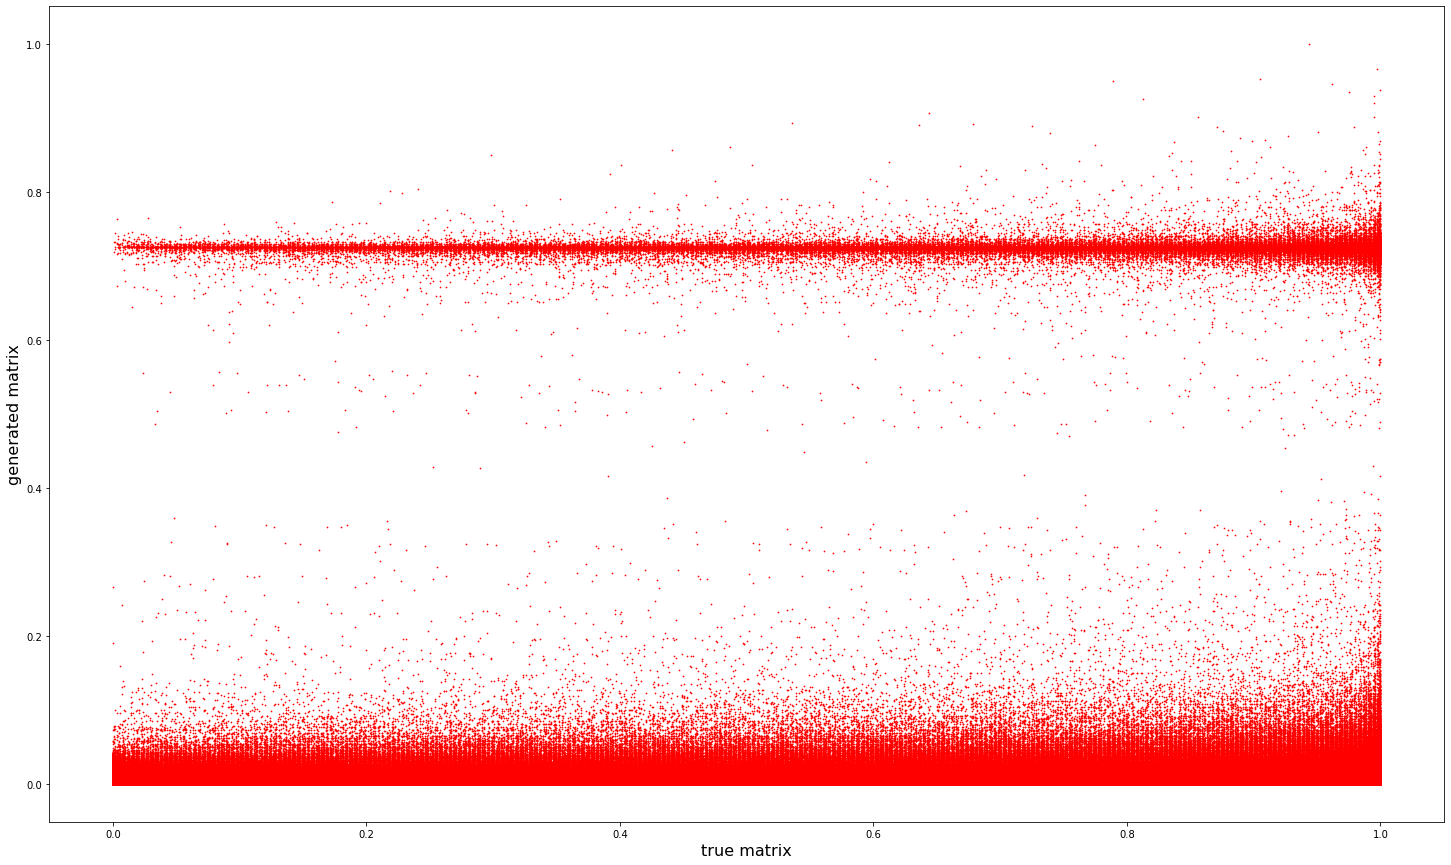

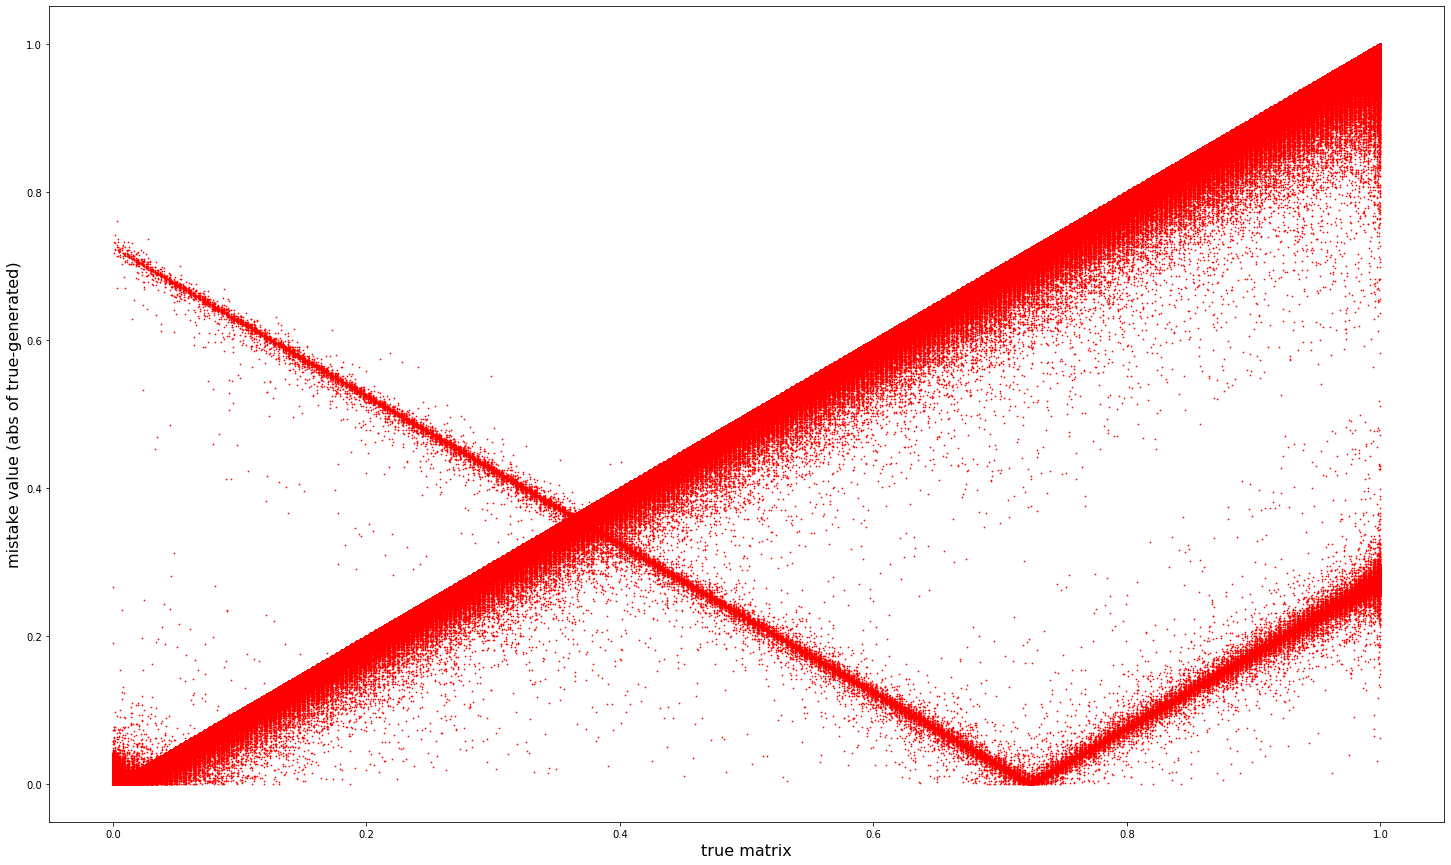

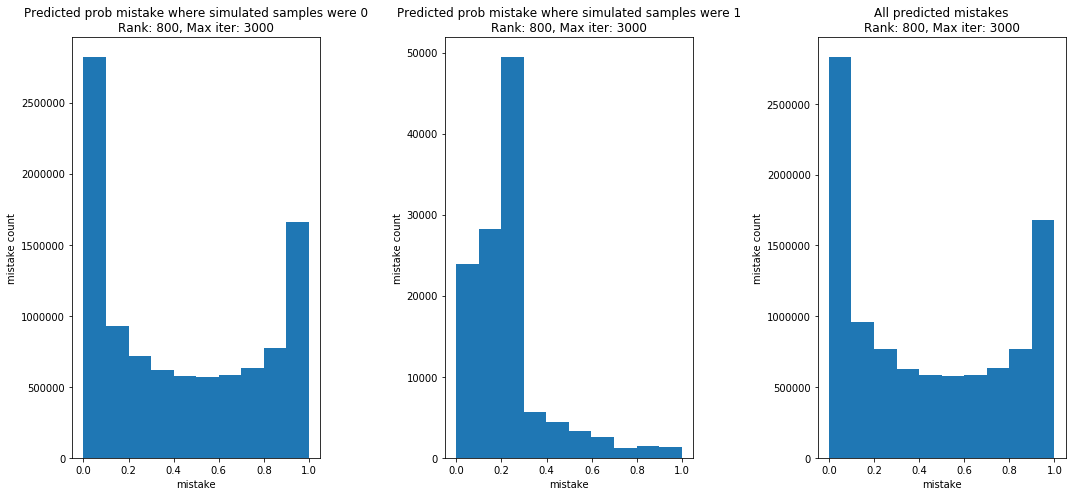

In [54]:
NMF_fun(simulated_samples_shuffled_1, shuffled_true_suitability_1, [800], 3000, 10e-6, create_scatter_plot=True)

Rank: 1000, Max iter: 3000, Tol: 1e-05
Zero
Spearman: 0.1232019683384511
MAE 0.437603641824797
One
Spearman: 0.03450587904155101
MAE 0.18997123127989046


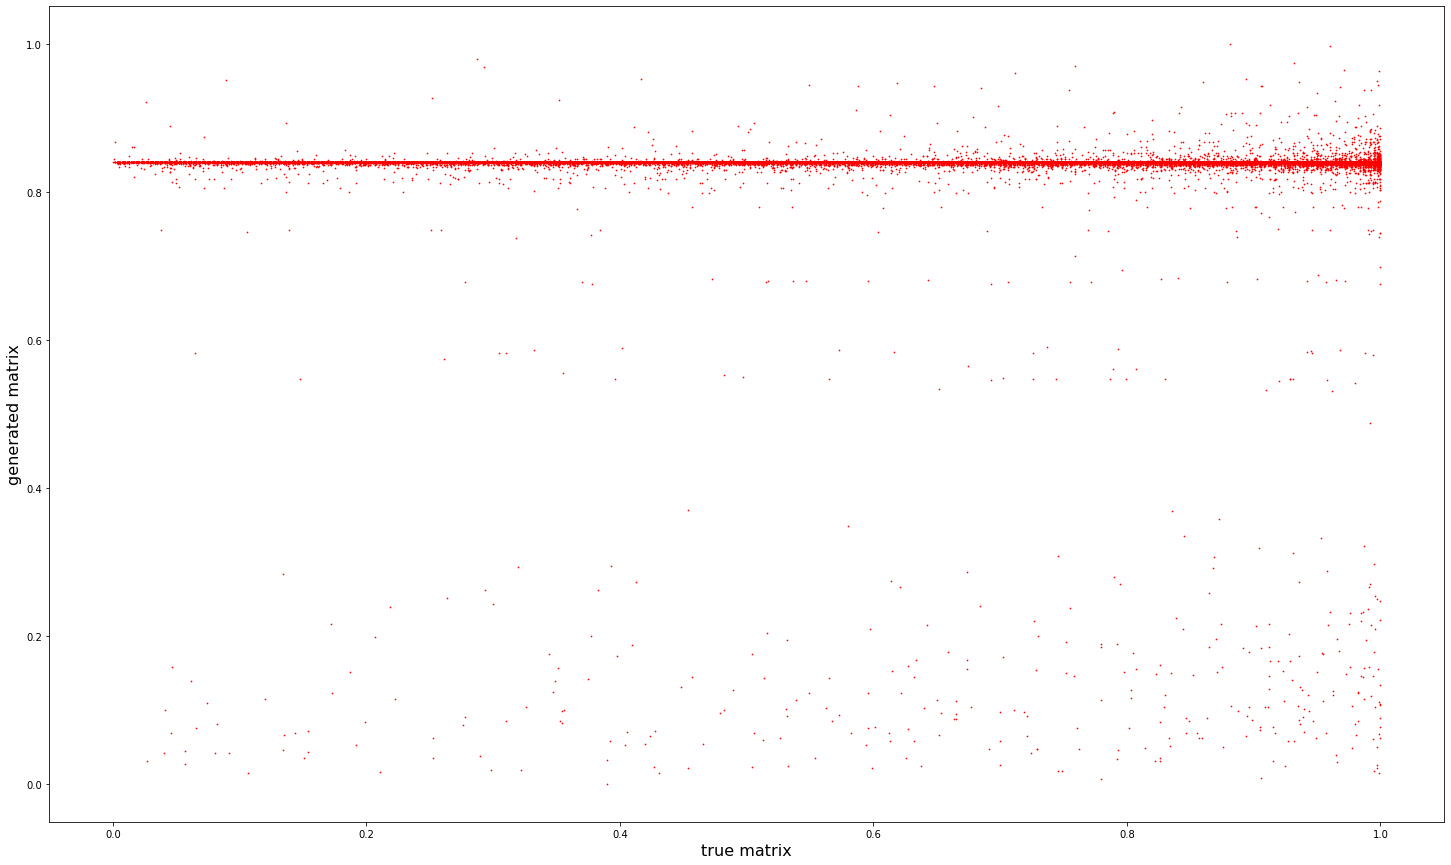

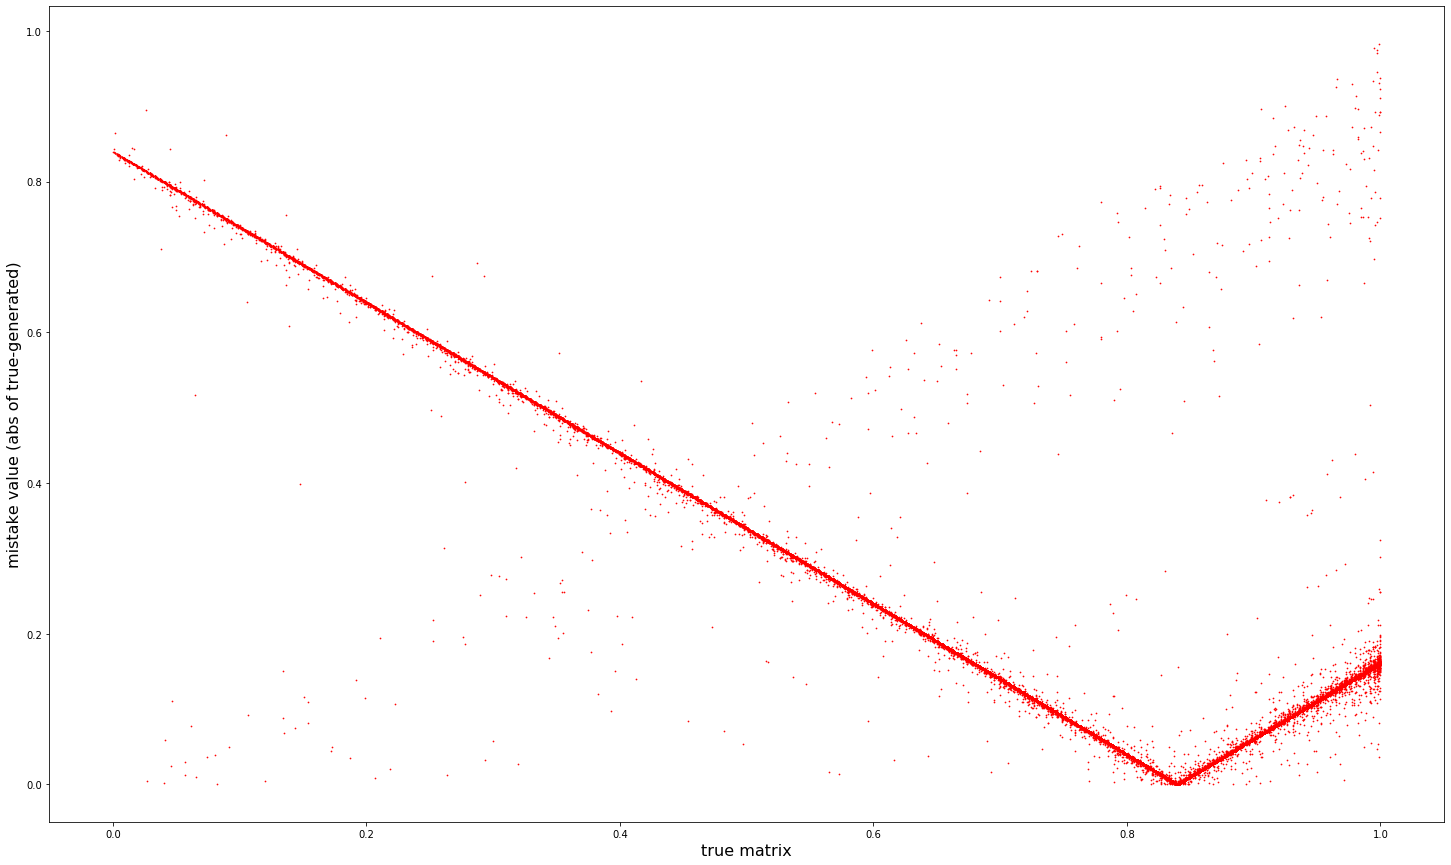

All data
Spearman: 0.1383534180600107
MAE 0.43469728515629164


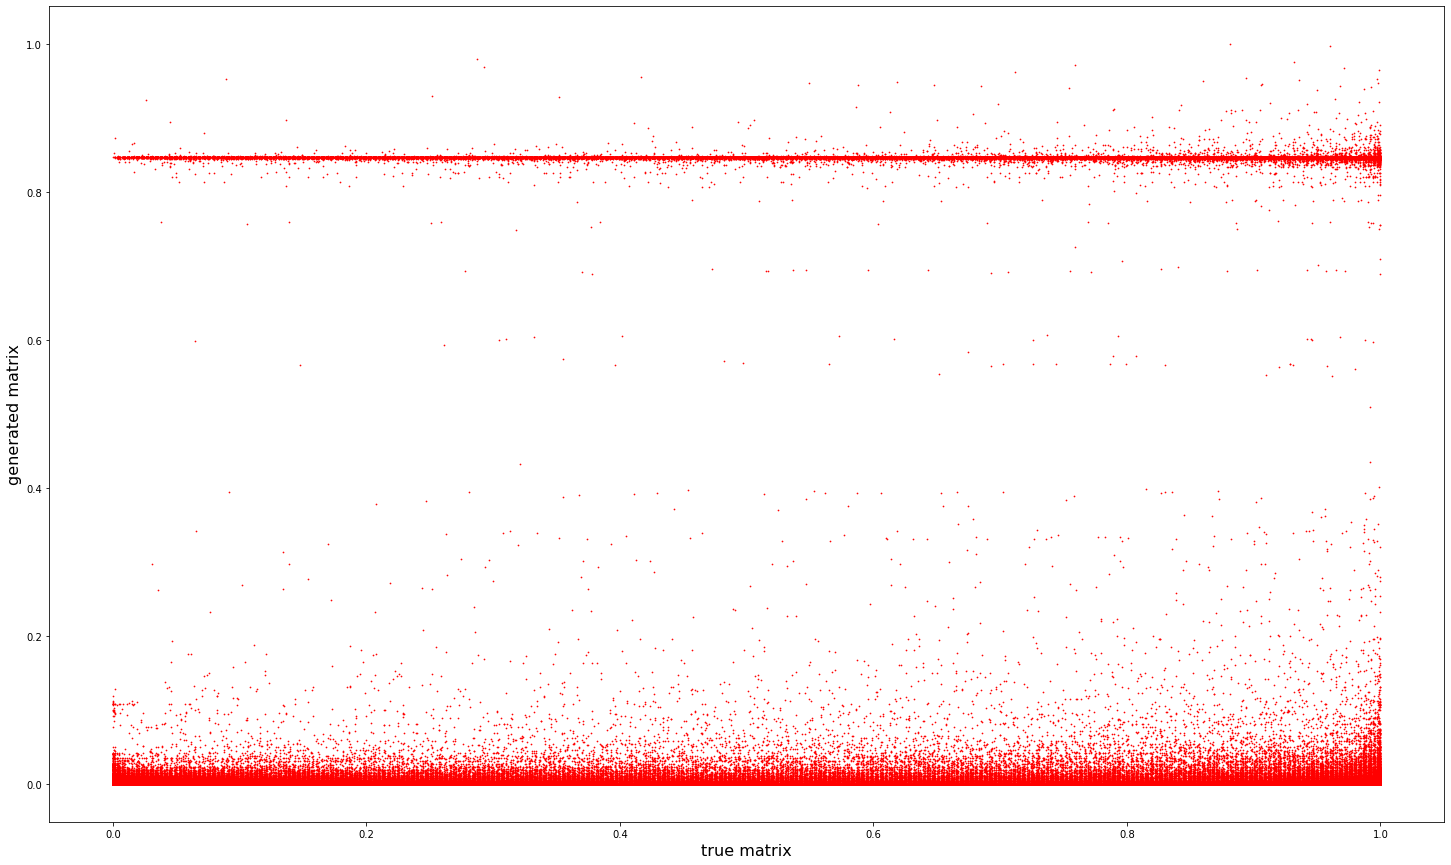

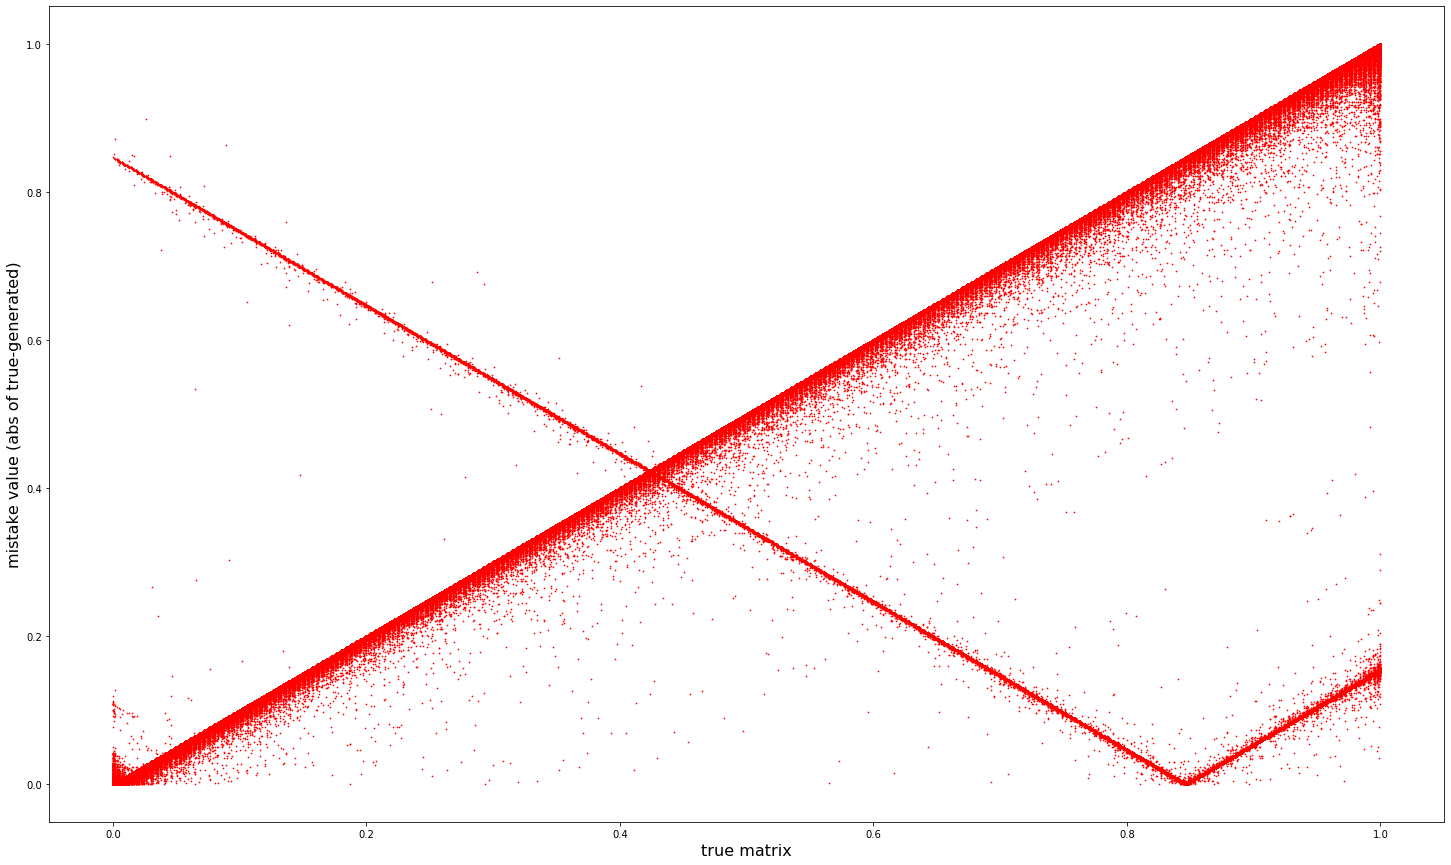

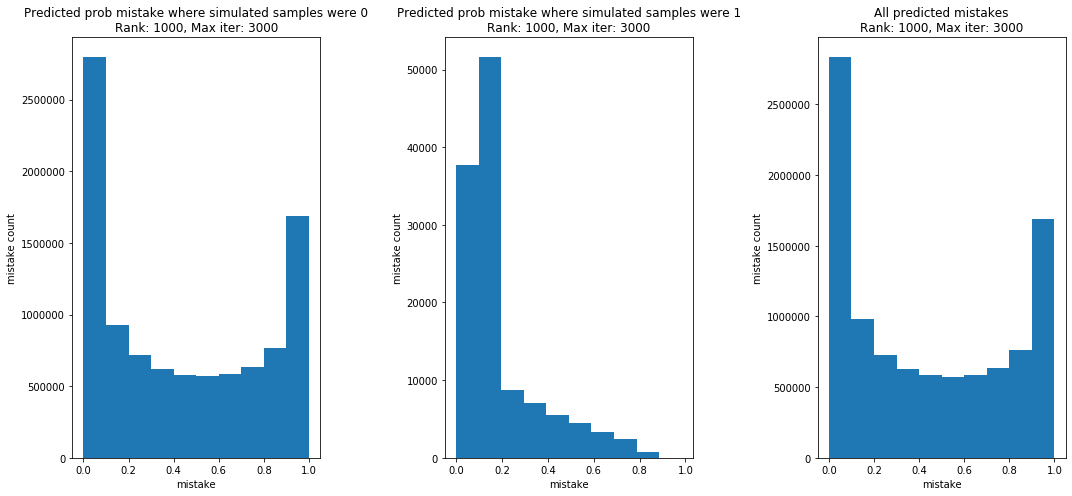

In [58]:
NMF_fun(simulated_samples_shuffled_1, shuffled_true_suitability_1, [1000], 3000, 10e-6, create_scatter_plot=True)

In [59]:
shuffle_2 = shuffle_matrix(simulated_samples, true_suitability)
simulated_samples_shuffled_2 = np.array(shuffle_2[0])
shuffled_true_suitability_2 = np.array(shuffle_2[1])

Rank: 10, Max iter: 3000, Tol: 1e-05
Zero
Spearman: 0.7457203390923418
MAE 0.42171292201569144
One
Spearman: 0.29948974990356725
MAE 0.7316619809855829


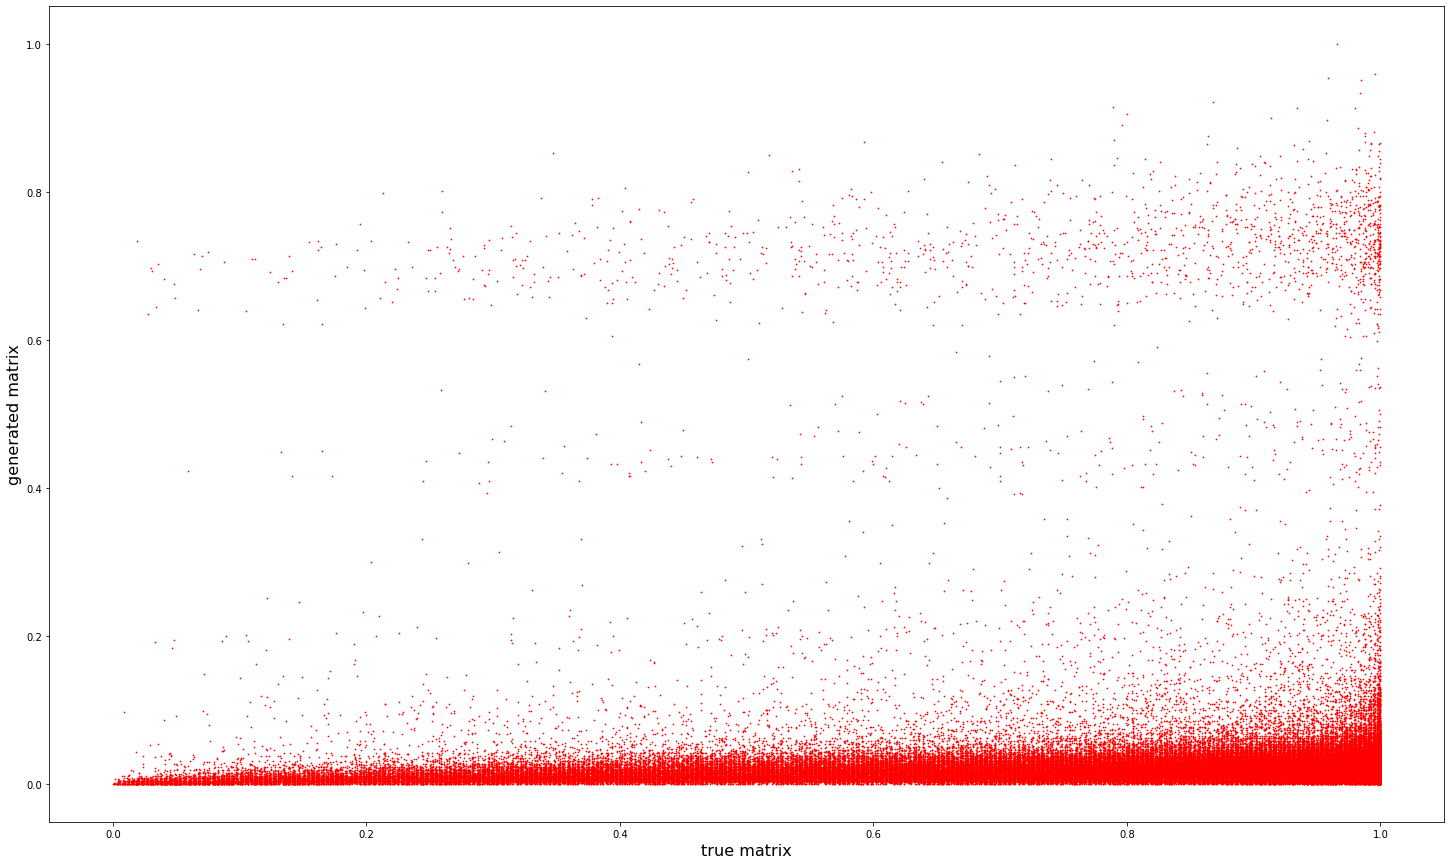

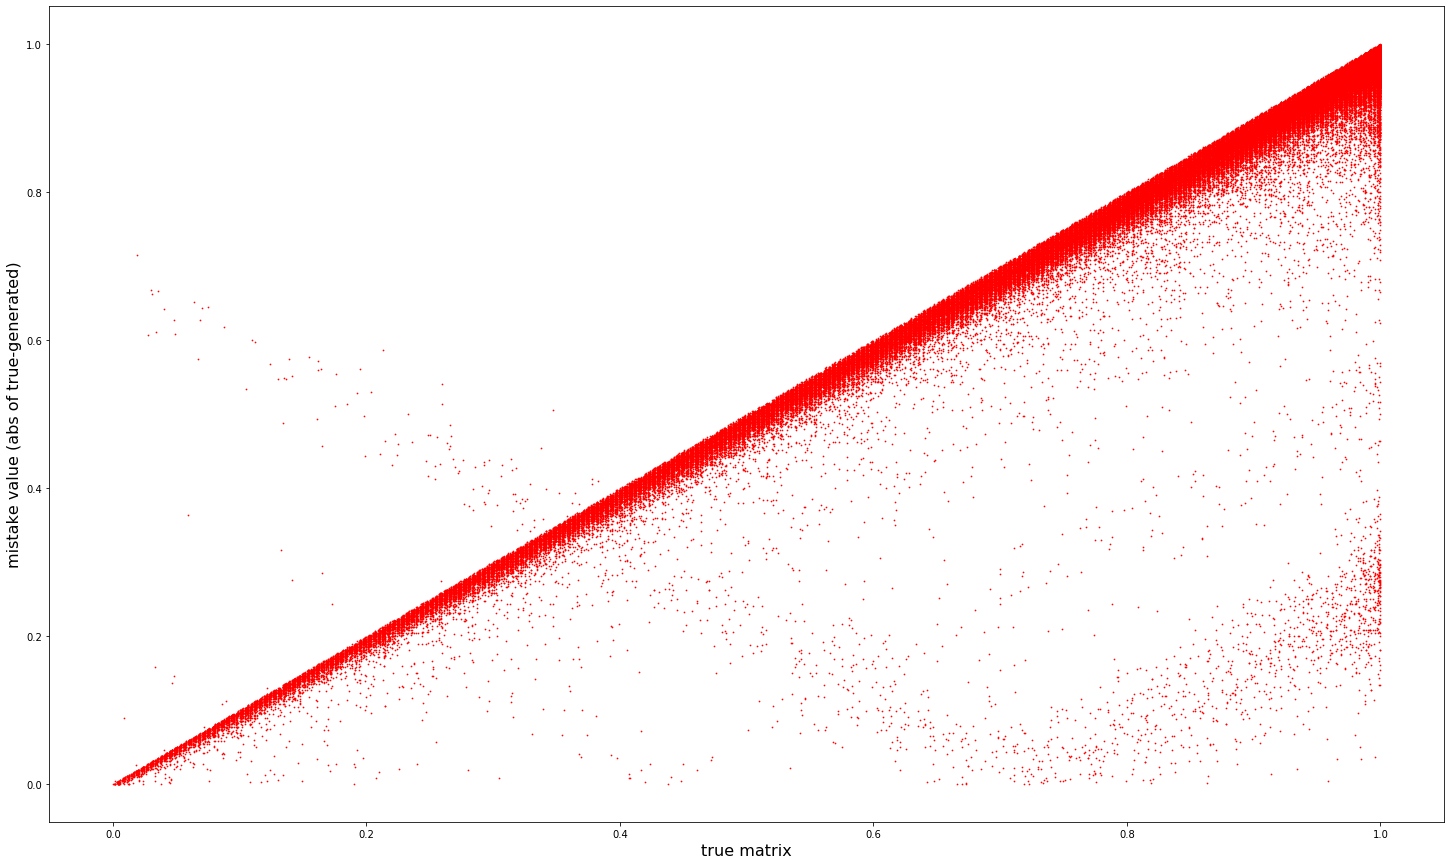

All data
Spearman: 0.7452965401632461
MAE 0.43210647572229116


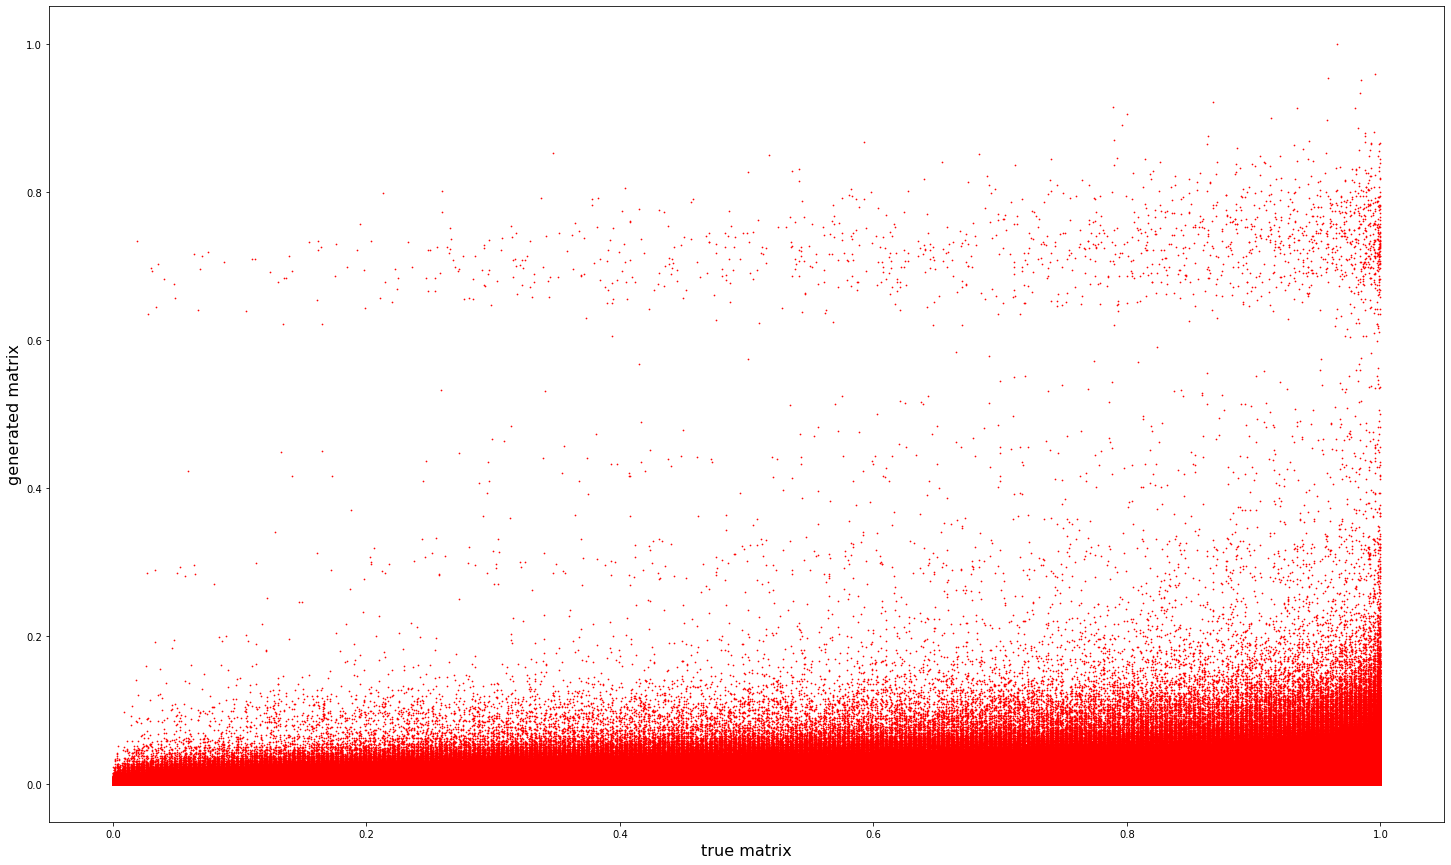

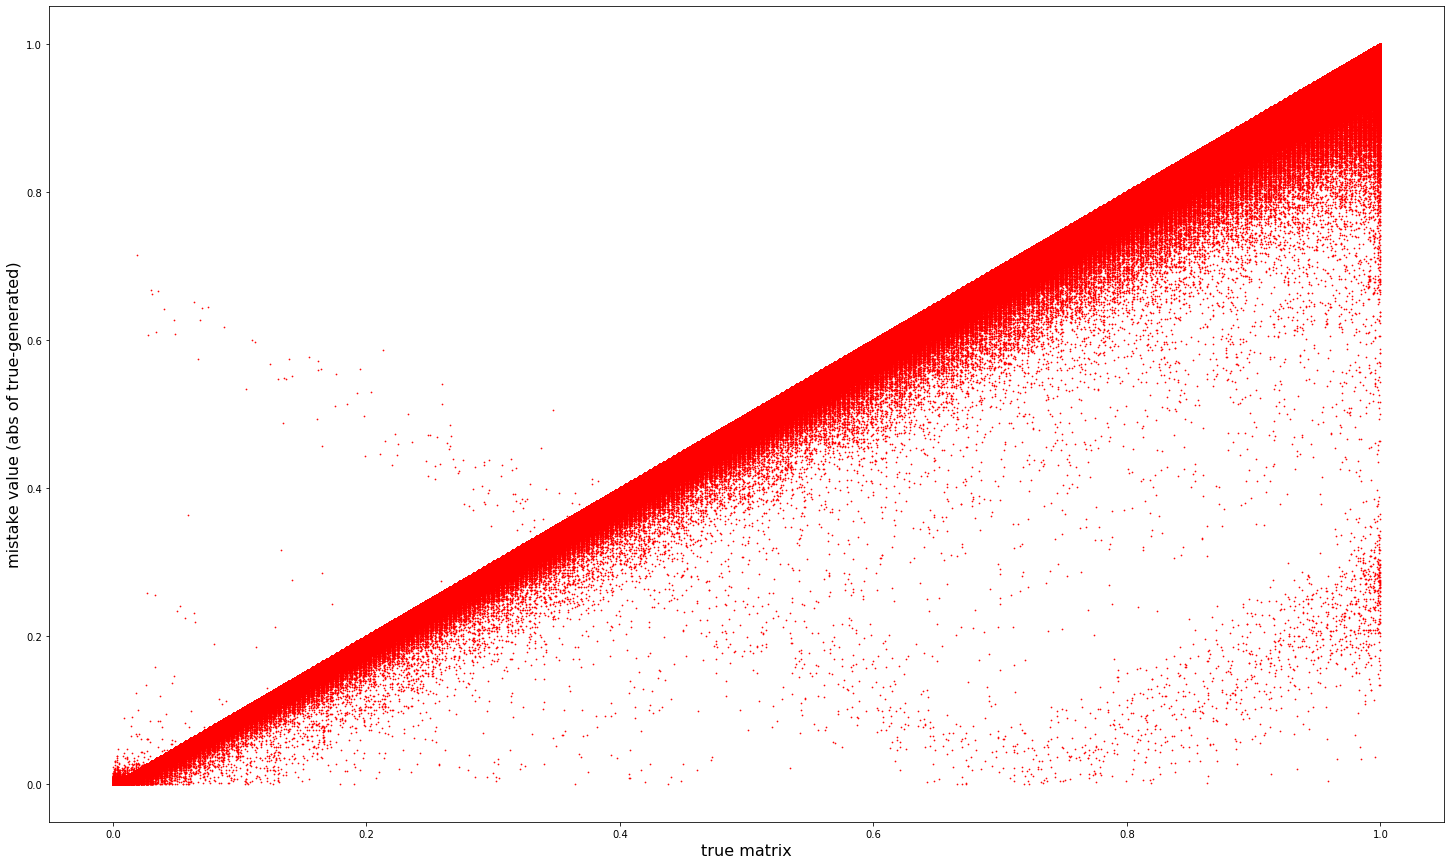

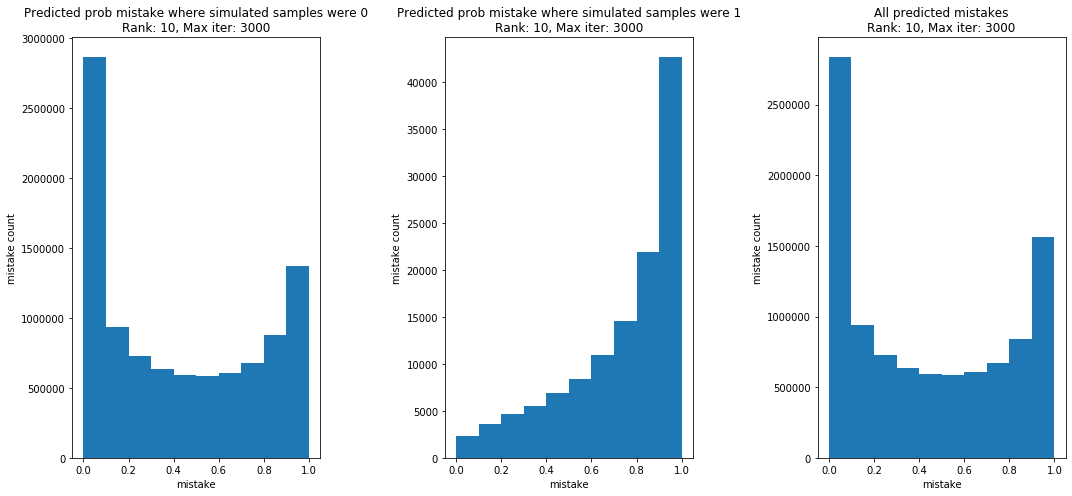

In [60]:
NMF_fun(simulated_samples_shuffled_2, shuffled_true_suitability_2, [10], 3000, 10e-6, create_scatter_plot=True)

Rank: 100, Max iter: 3000, Tol: 1e-05
Zero
Spearman: 0.5513317199649596
MAE 0.42395506314307113
One
Spearman: 0.16147891316863253
MAE 0.6208947739153007


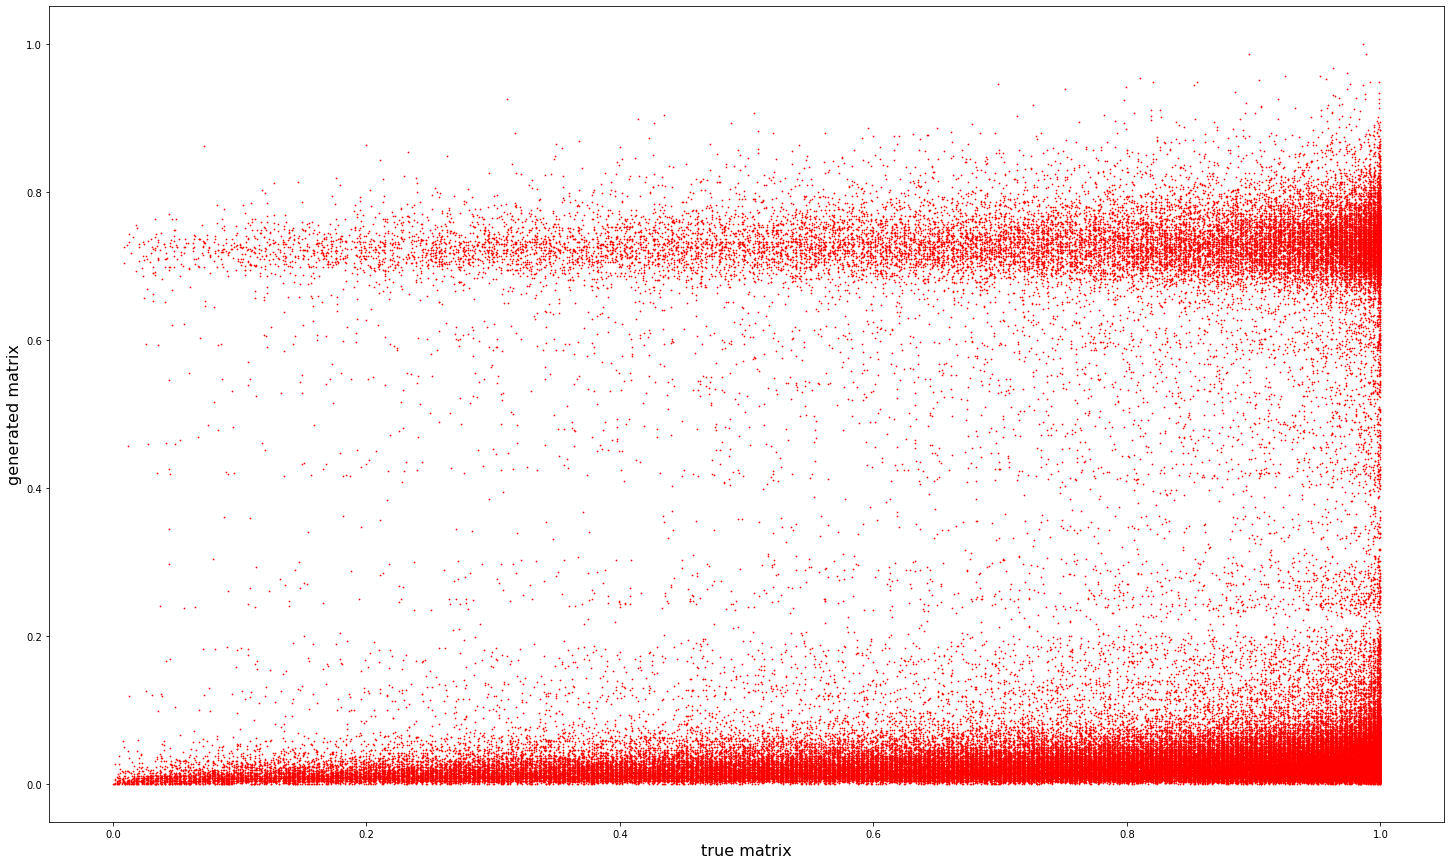

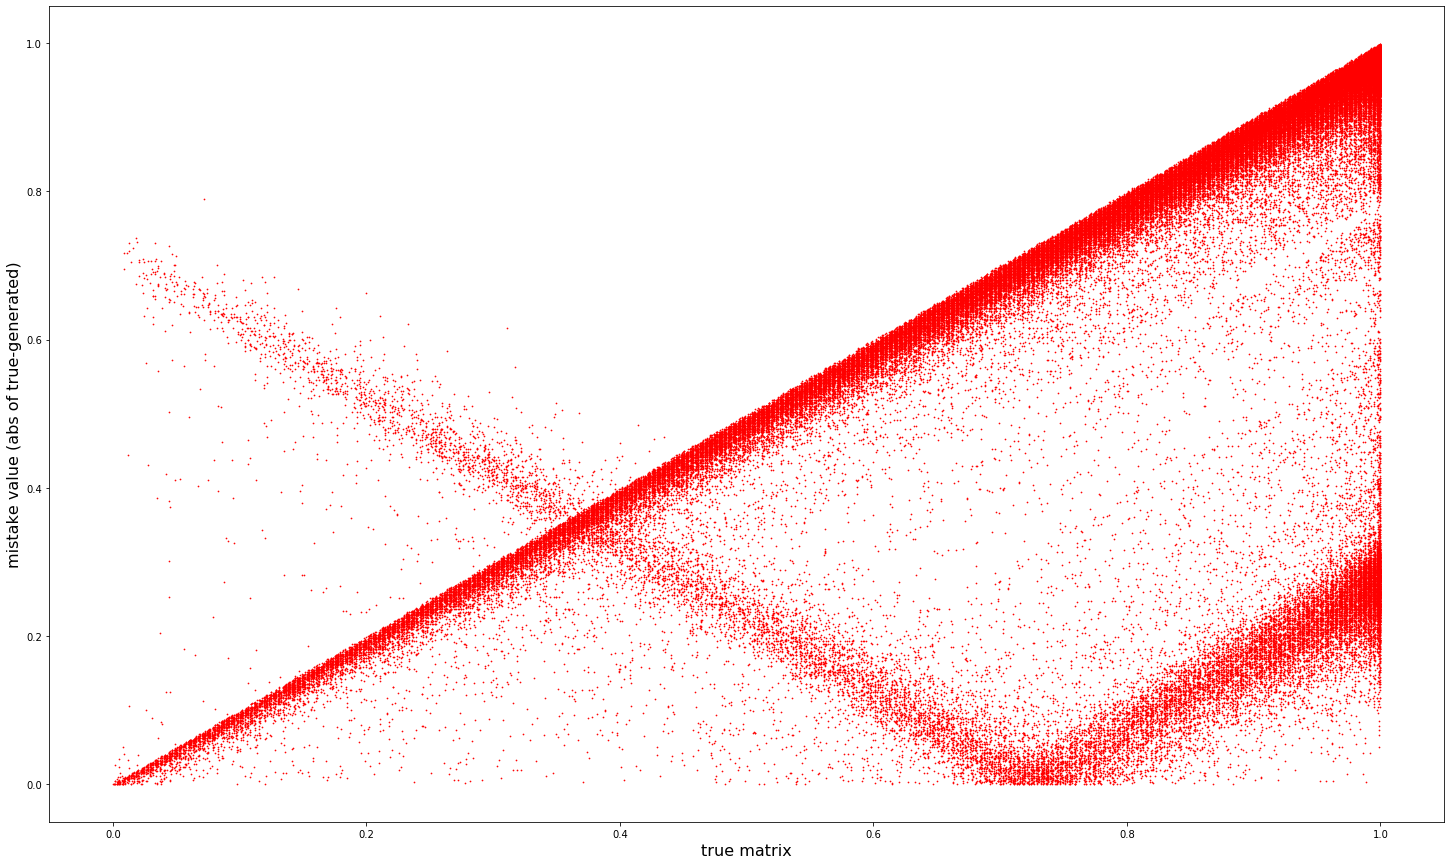

All data
Spearman: 0.5552410676661038
MAE 0.4311776885700211


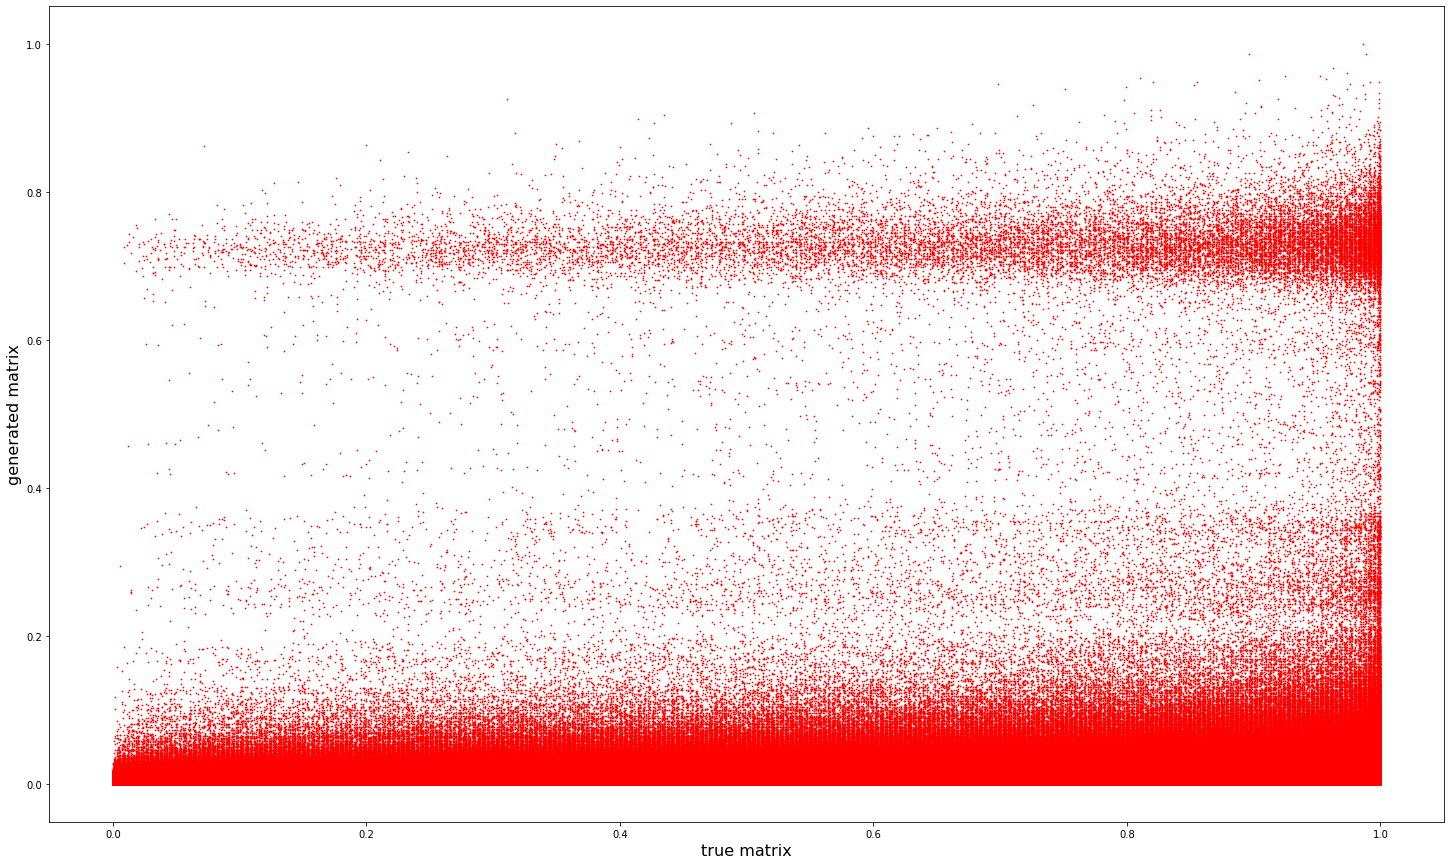

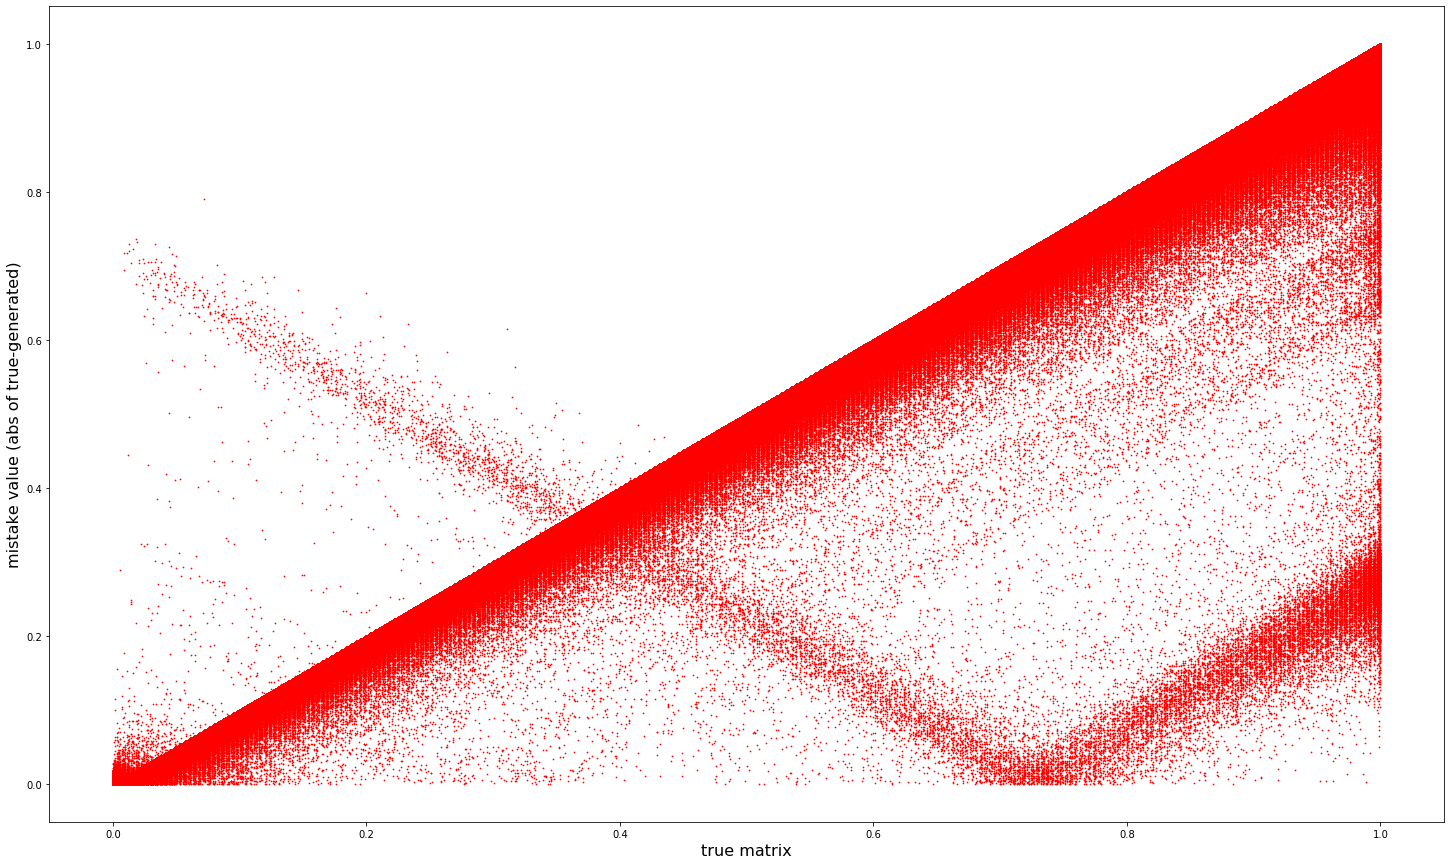

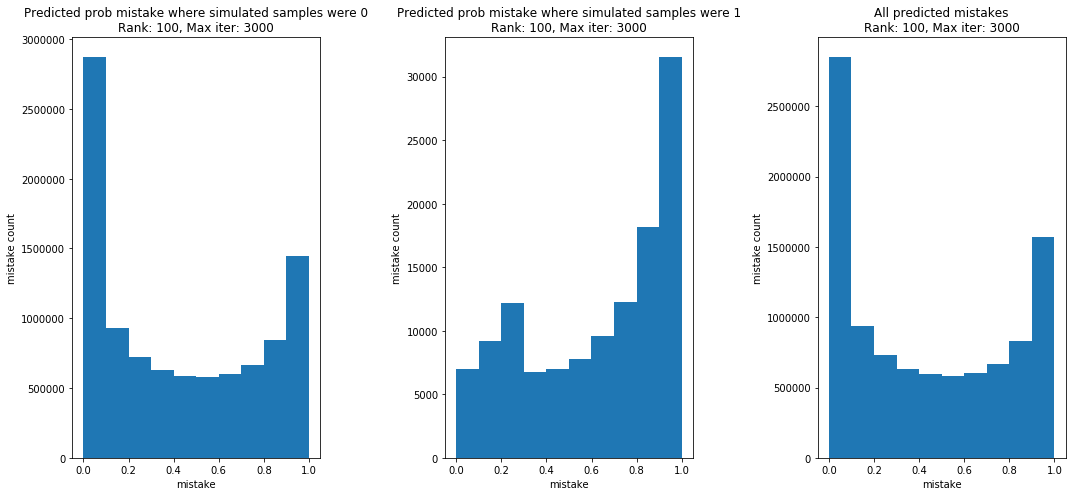

In [61]:
NMF_fun(simulated_samples_shuffled_2, shuffled_true_suitability_2, [100], 3000, 10e-6, create_scatter_plot=True)

Rank: 500, Max iter: 3000, Tol: 1e-05
Zero
Spearman: -0.11137457619448285
MAE 0.42985378024952126
One
Spearman: 0.017490480703340104
MAE 0.34679285402312776


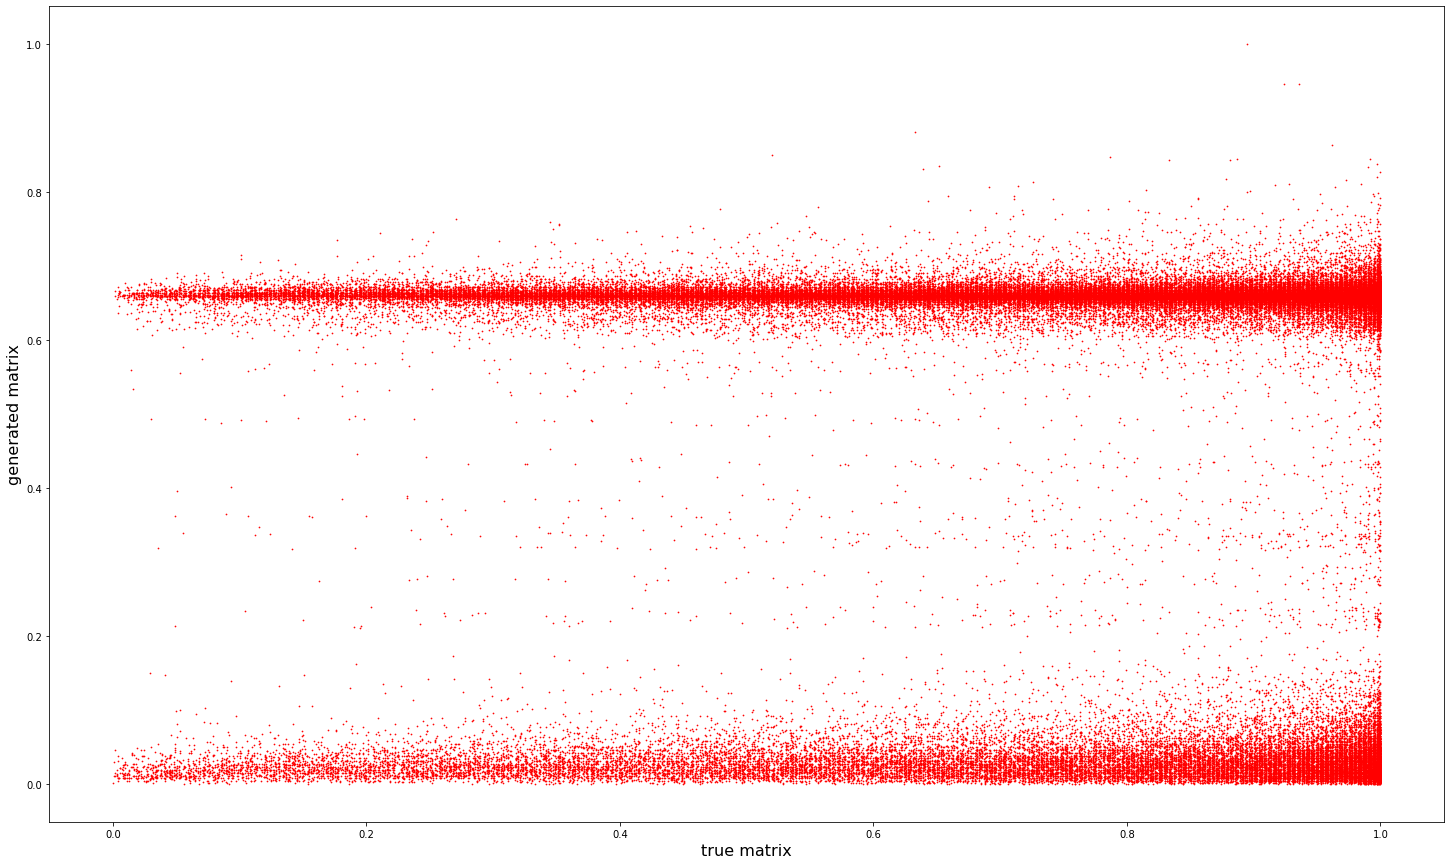

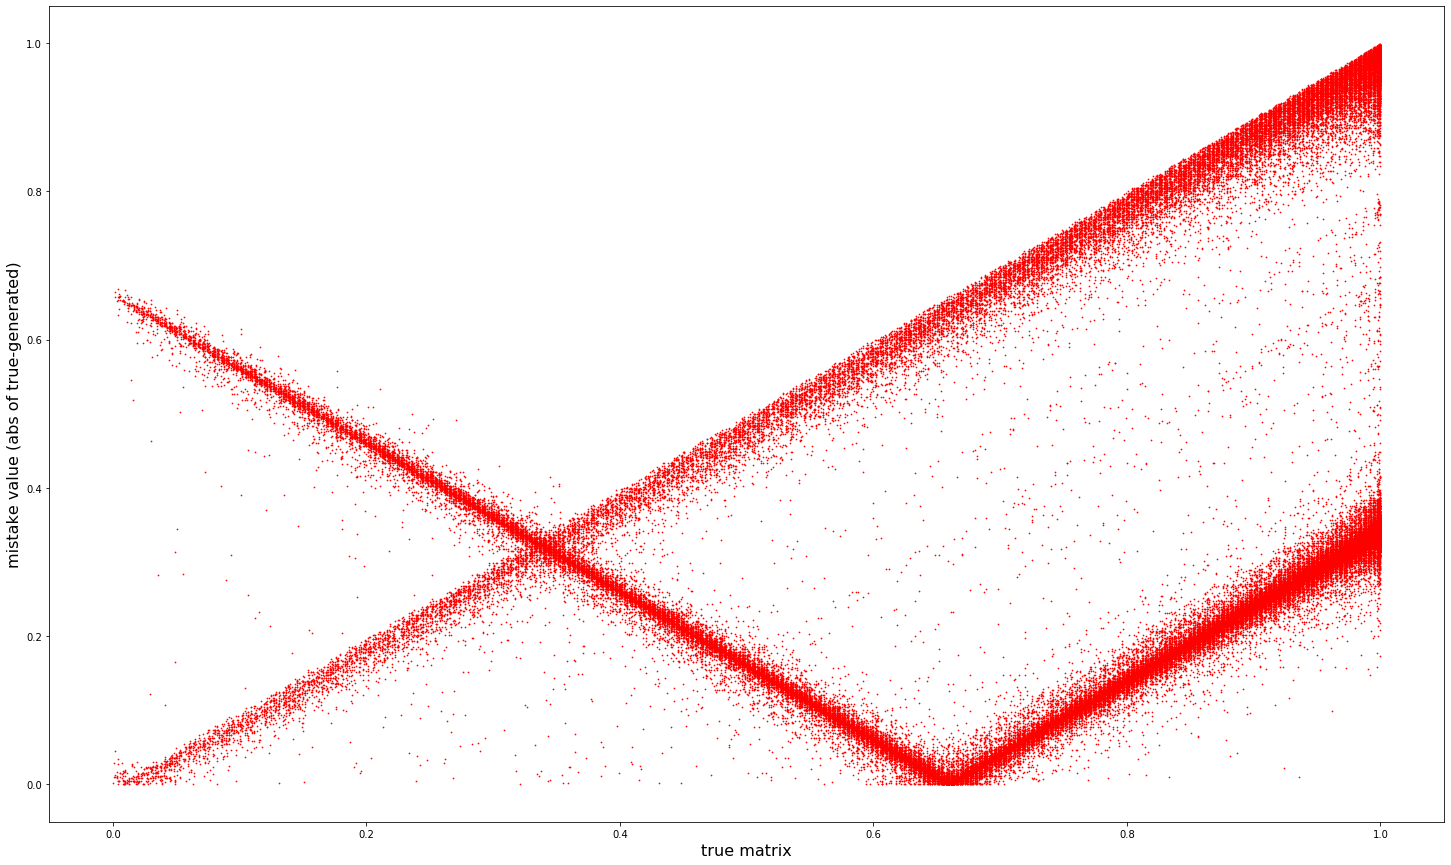

All data
Spearman: -0.08976181586508136
MAE 0.43318152041199215


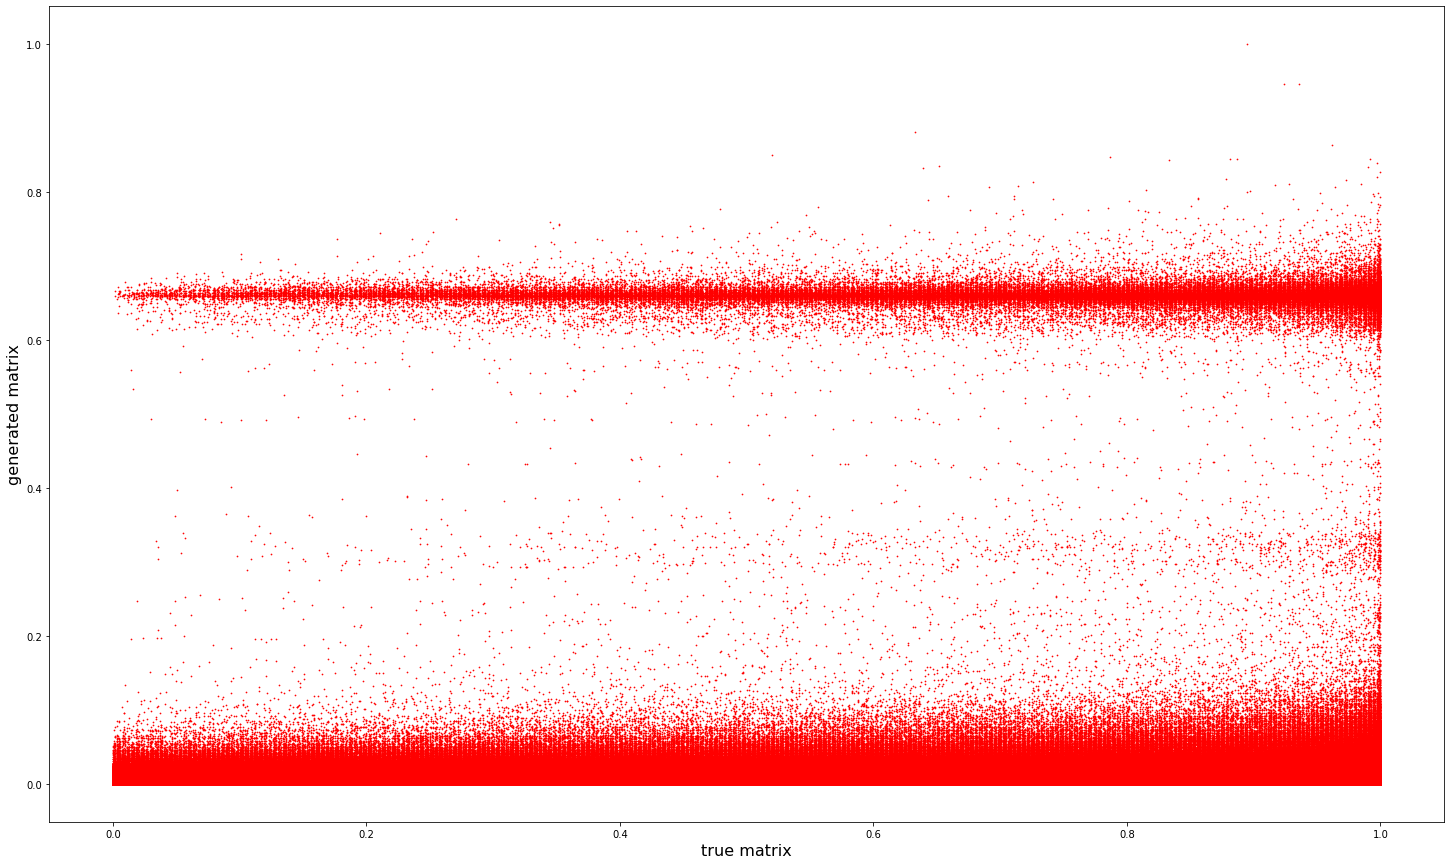

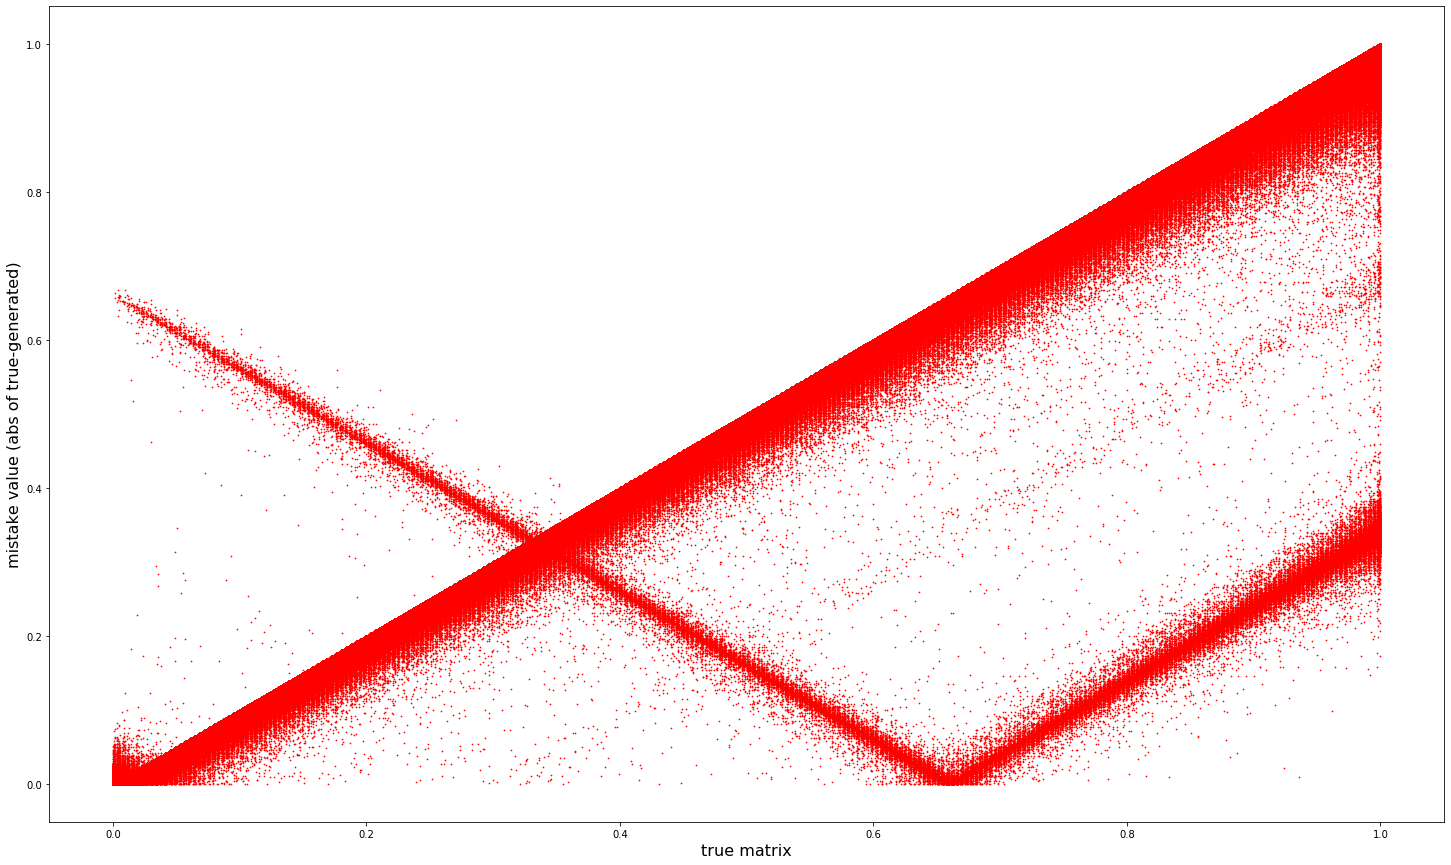

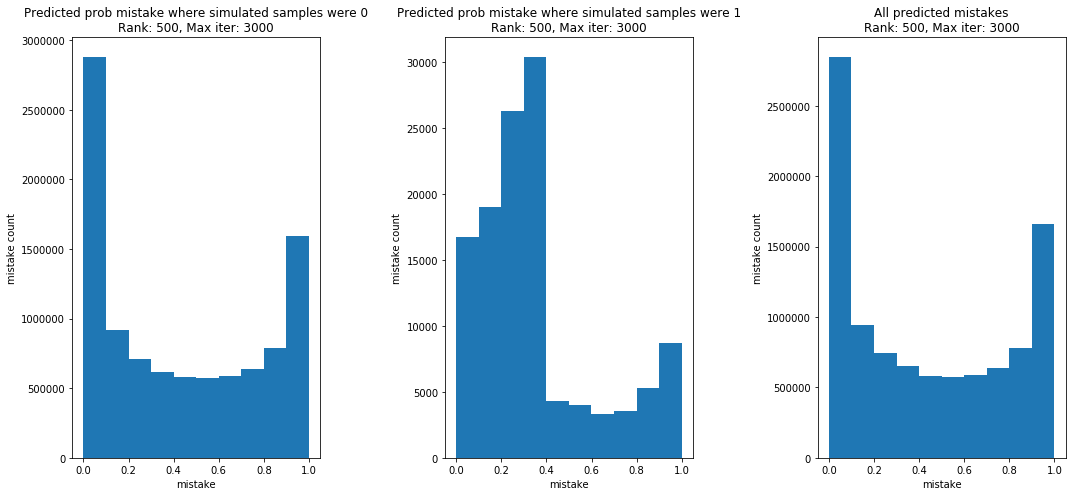

In [62]:
NMF_fun(simulated_samples_shuffled_2, shuffled_true_suitability_2, [500], 3000, 10e-6, create_scatter_plot=True)

Rank: 800, Max iter: 3000, Tol: 1e-05
Zero
Spearman: -0.19130810890829364
MAE 0.43501678600509397
One
Spearman: 0.032447918629419
MAE 0.23956435376932964


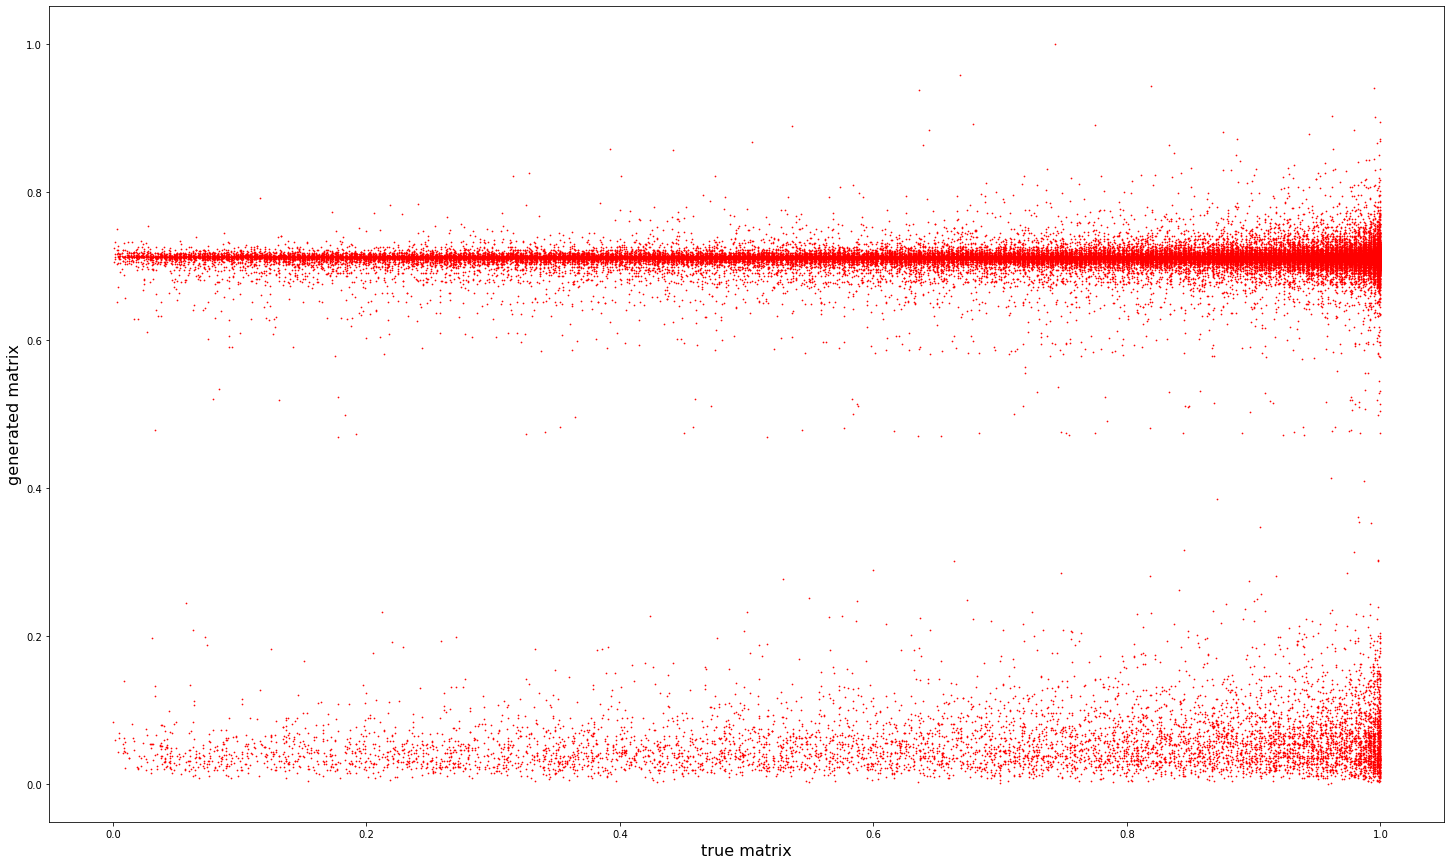

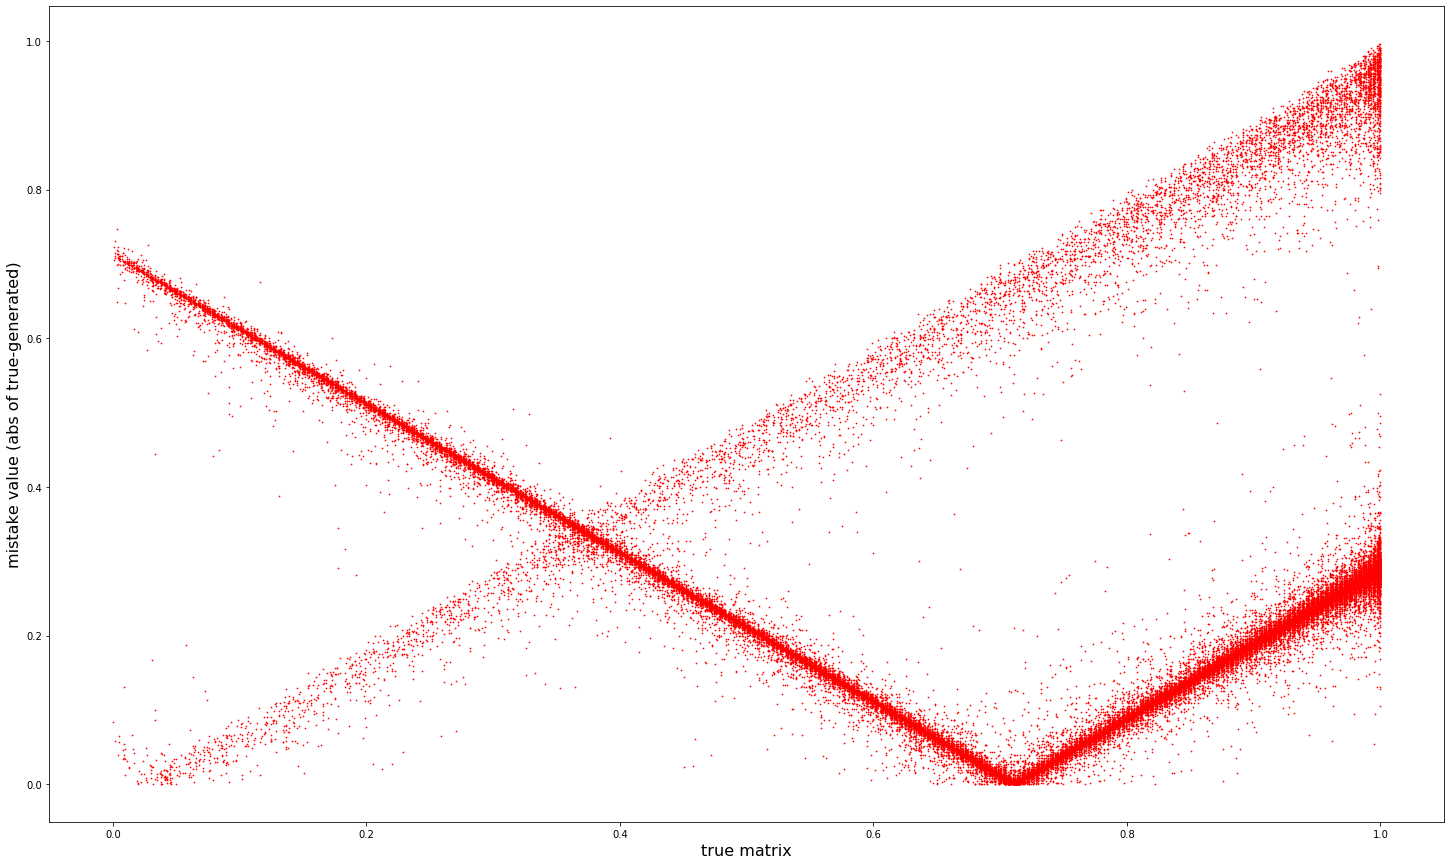

All data
Spearman: -0.1660782598683277
MAE 0.43412485258479305


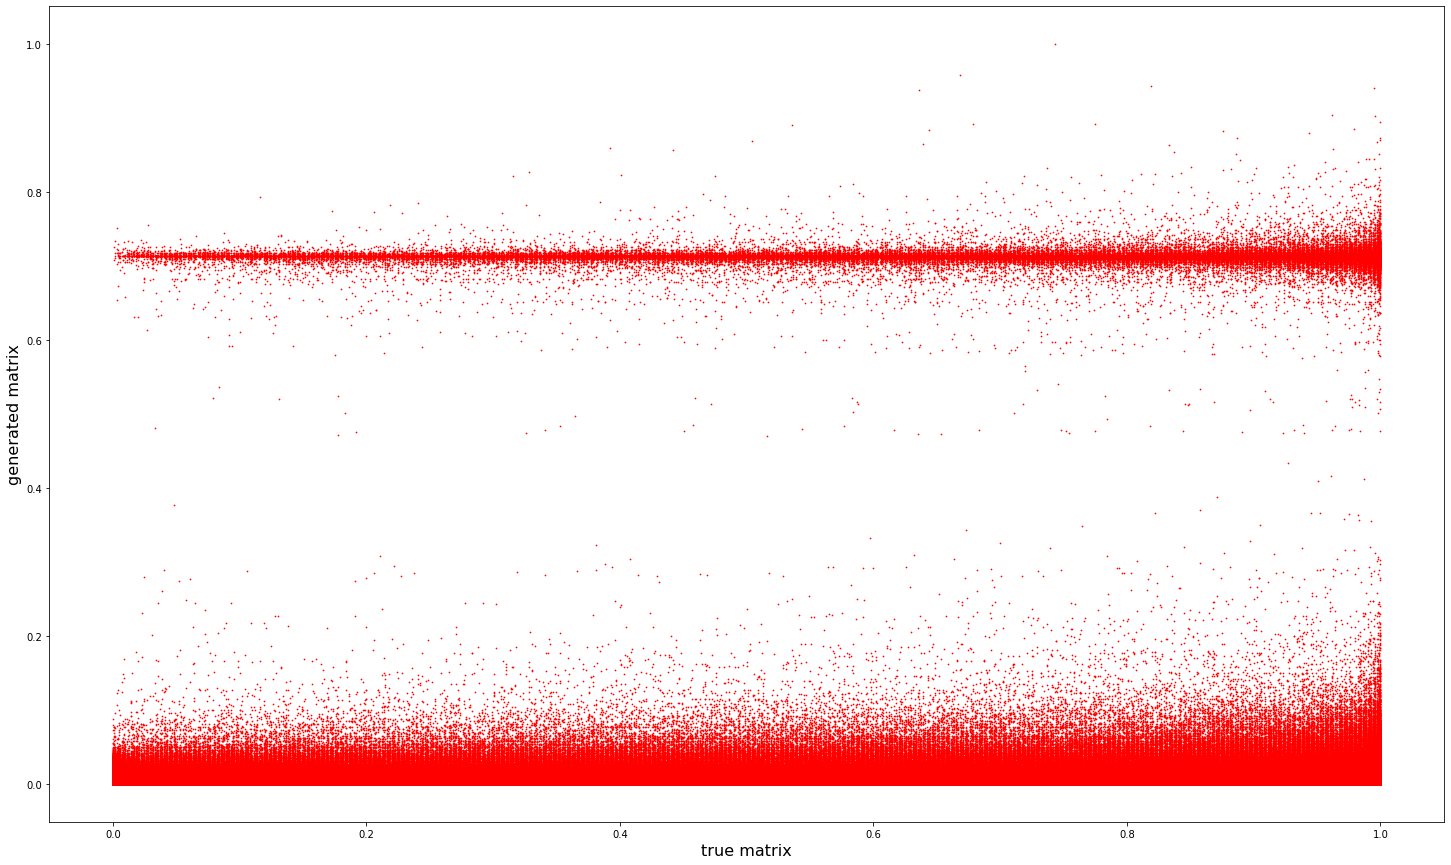

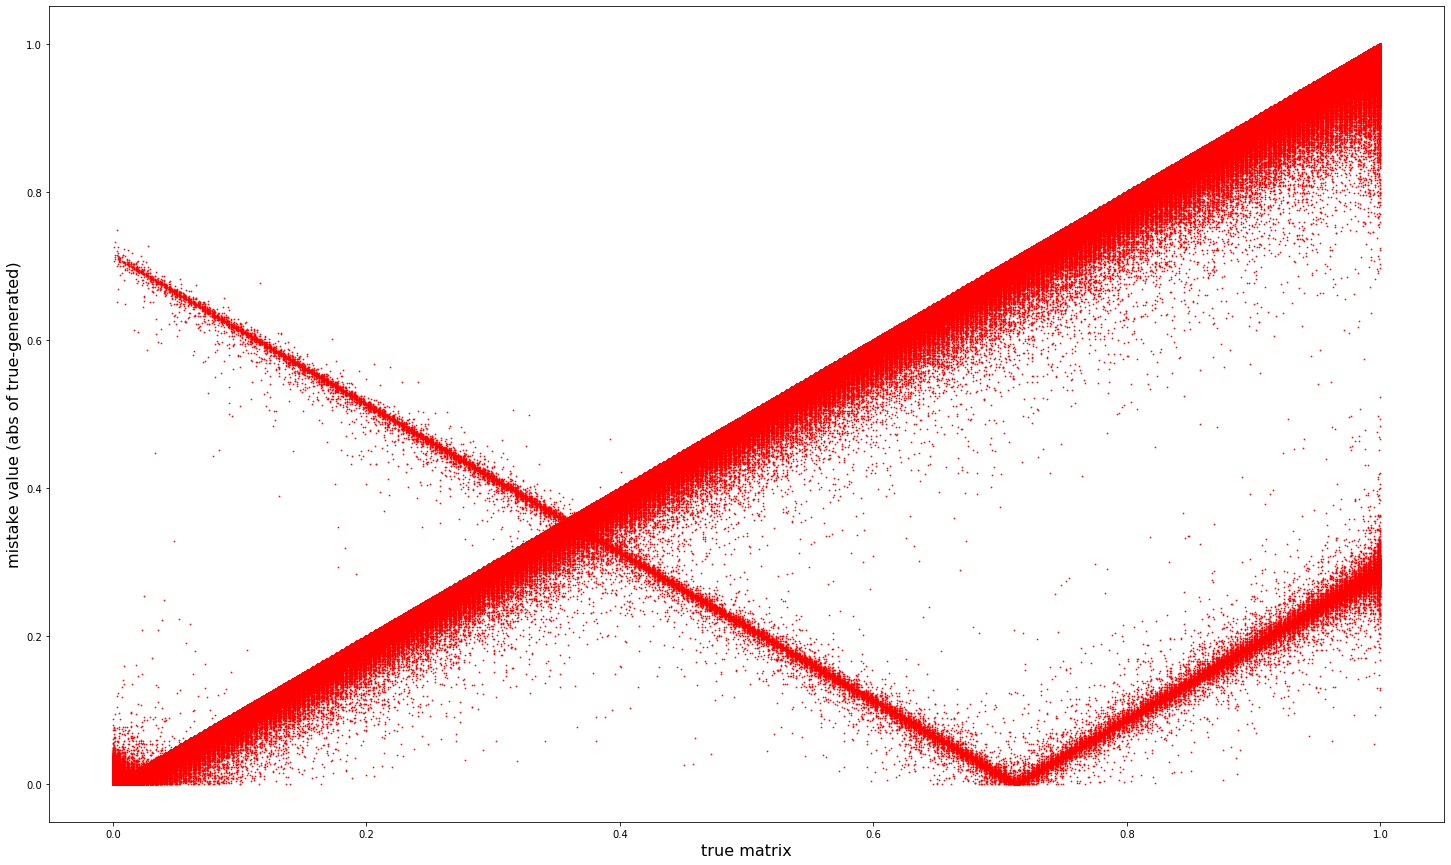

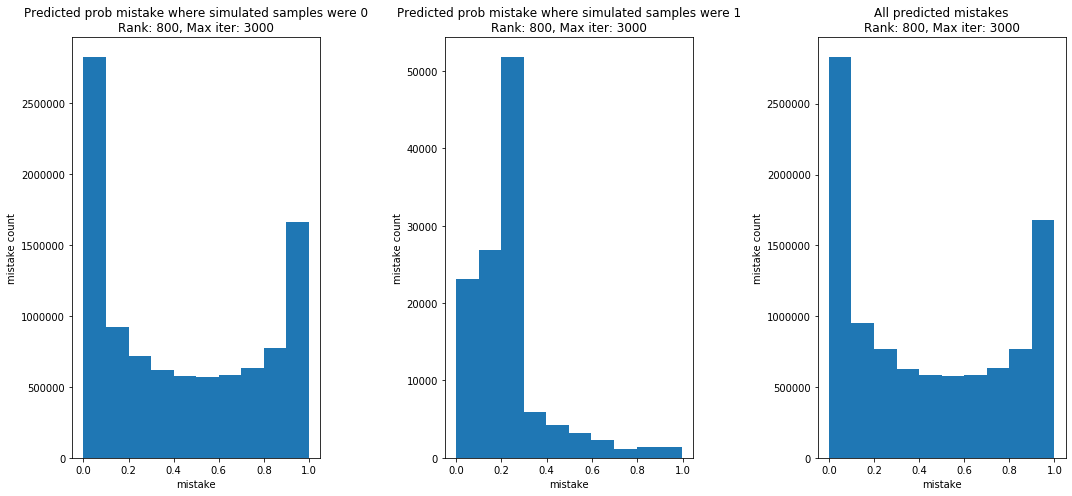

In [63]:
NMF_fun(simulated_samples_shuffled_2, shuffled_true_suitability_2, [800], 3000, 10e-6, create_scatter_plot=True)

Rank: 1000, Max iter: 3000, Tol: 1e-05
Zero
Spearman: 0.12320196827603382
MAE 0.43760364182480765
One
Spearman: 0.03450587845401506
MAE 0.1899712312816958


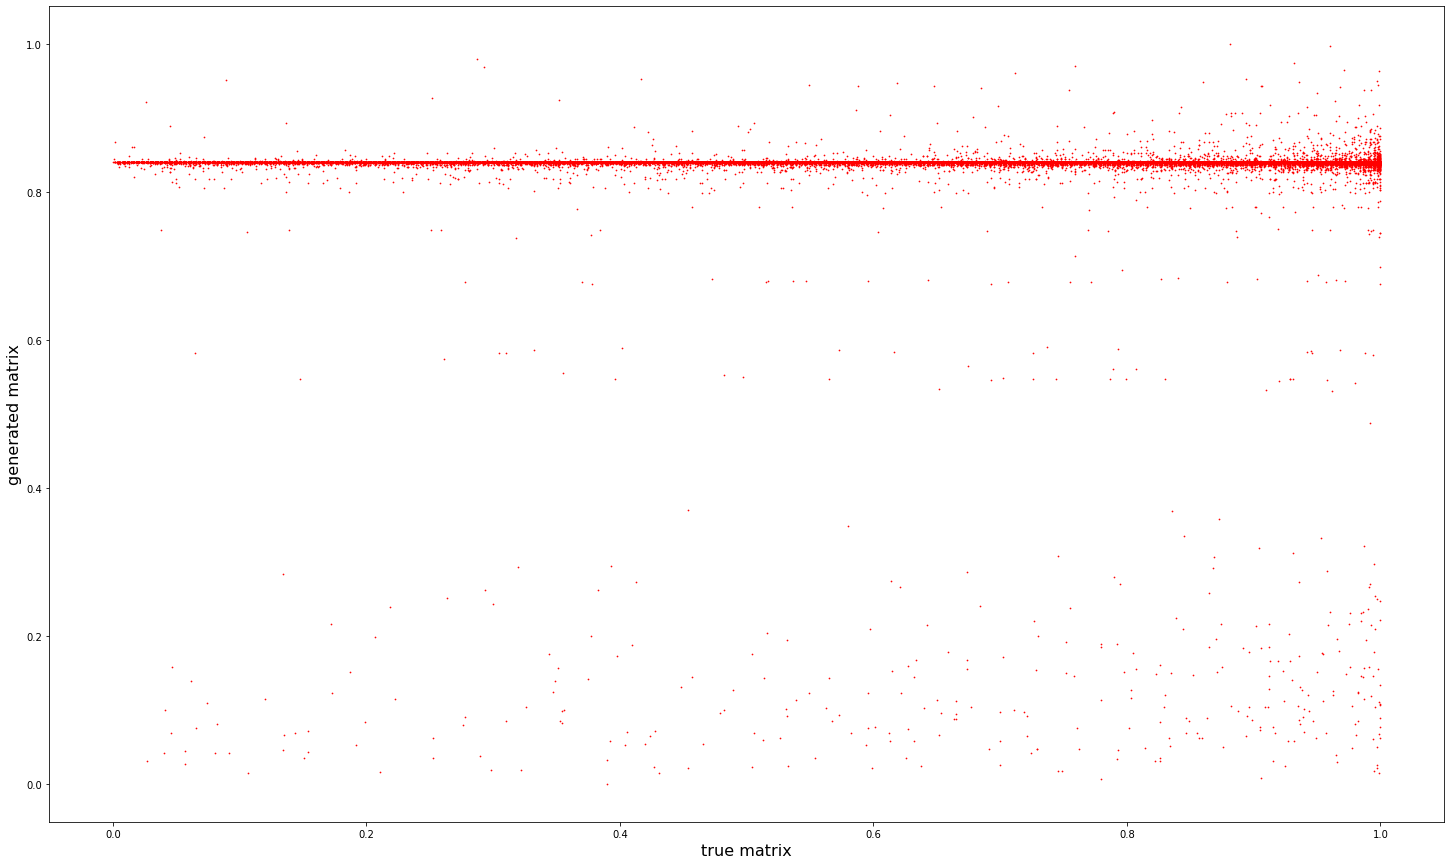

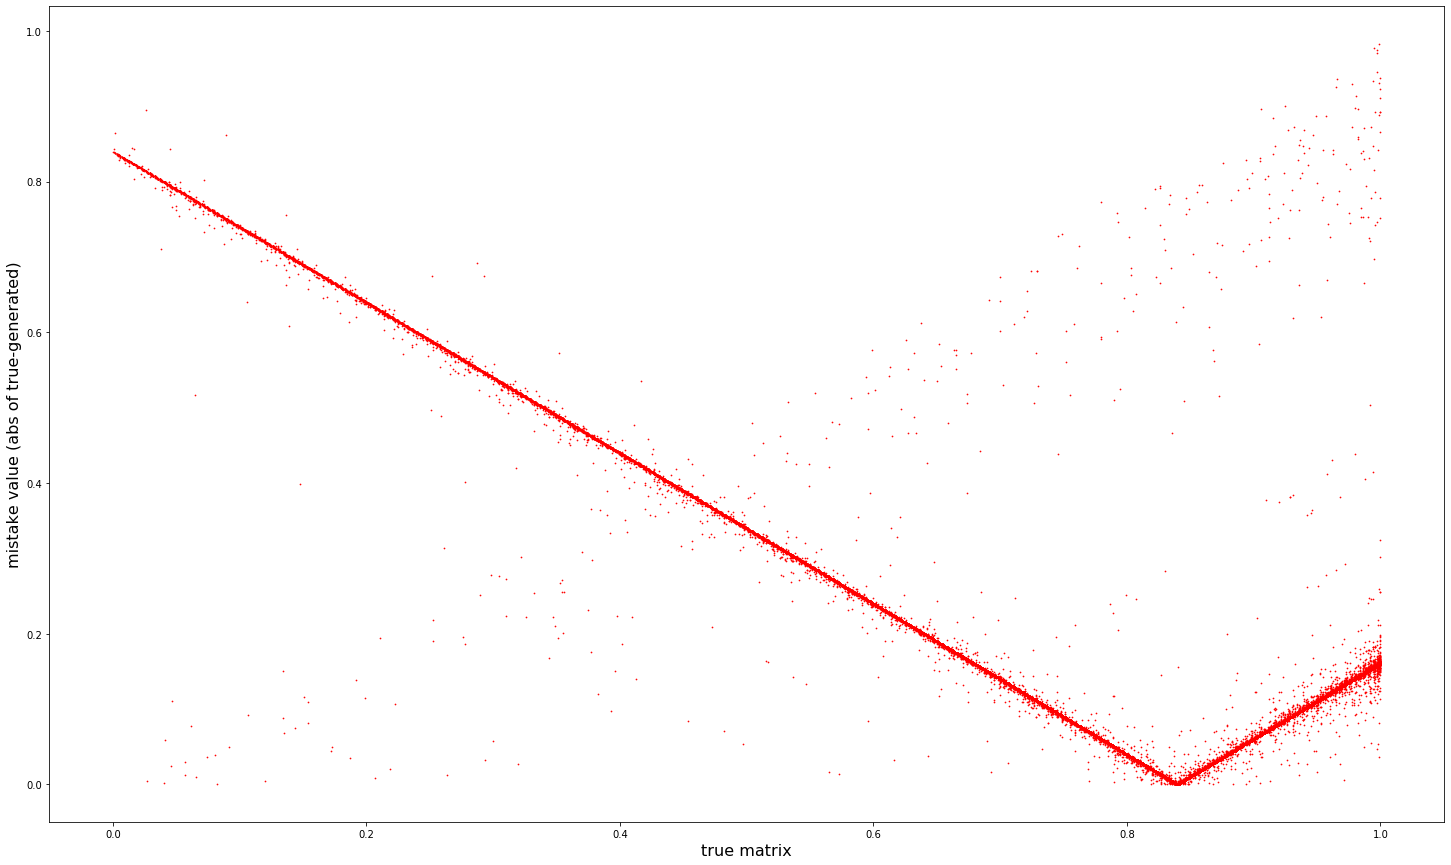

All data
Spearman: 0.13835341799836165
MAE 0.4346972851563081


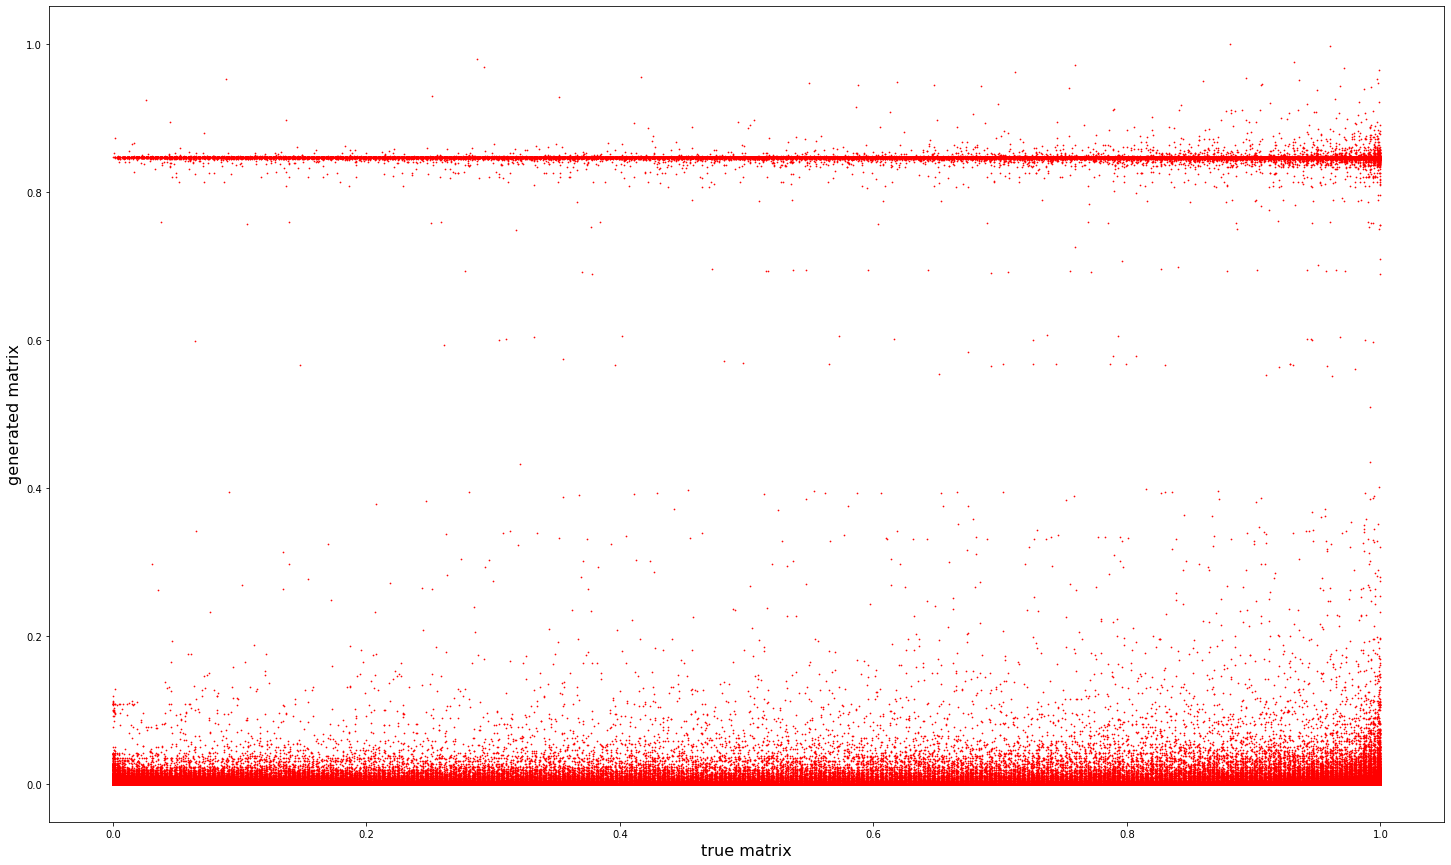

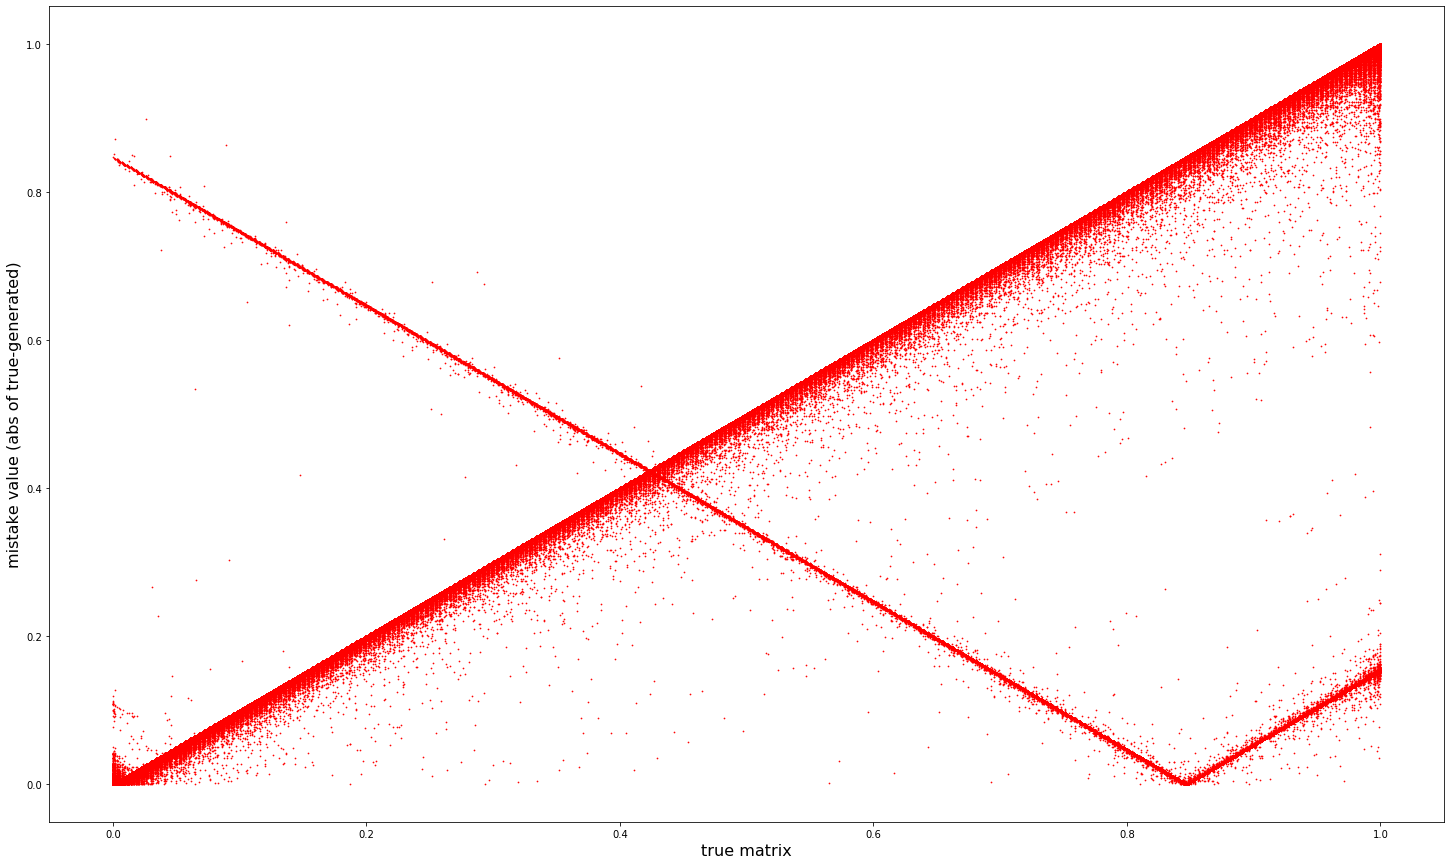

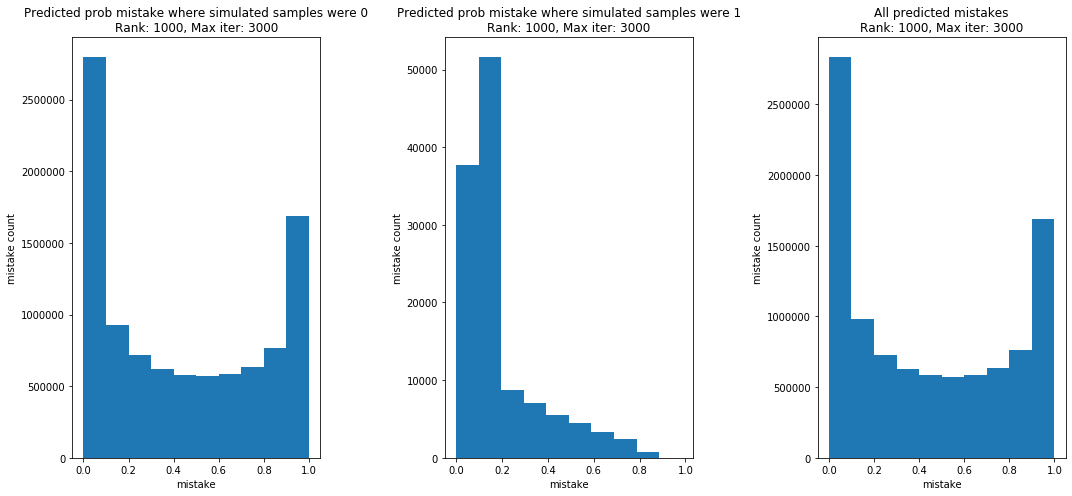

In [64]:
NMF_fun(simulated_samples_shuffled_2, shuffled_true_suitability_2, [1000], 3000, 10e-6, create_scatter_plot=True)

In [42]:
import nltk
from nltk.corpus import brown

# 1
# kõik sõnad
print(len(brown.words()))
# erinevad sõnads
print(len(set(brown.words())))

1161192
56057


In [43]:
# 2
fd = nltk.FreqDist(brown.words())
most_common_200 = sum([el[1] for el in fd.most_common(200)])
print(most_common_200 * 100 / len(brown.words()))

57.1486885889672


In [44]:
# 3
# laused
print(len(brown.sents()))
top_200 = [el[0] for el in fd.most_common(200)]
#print(top_200)

def all_words_top_200(sent):
    for word in sent:
        if word not in top_200:
            return False
    return True

#print(brown.sents())
print(len([sent for sent in brown.sents() if all_words_top_200(sent)]))

57340
457


In [46]:
nltk.download('universal_tagset')
tagged_words = brown.tagged_words(tagset='universal')
print(tagged_words)

[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\siimk\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\universal_tagset.zip.


[('The', 'DET'), ('Fulton', 'NOUN'), ...]


In [50]:
noun_after_the = 0
not_noun_after_the = 0
for i in range(0, len(tagged_words)):
    if tagged_words[i][0].lower() == 'the':
        if tagged_words[i + 1][1] == 'NOUN':
            noun_after_the += 1
        else:
            not_noun_after_the += 1
print(noun_after_the * 100 / (noun_after_the + not_noun_after_the))

69.03717254291064


In [37]:
import nimfa

V = nimfa.examples.medulloblastoma.read(normalize=True)

lsnmf = nimfa.Lsnmf(V, seed='random_vcol', rank=50, max_iter=100)
lsnmf_fit = lsnmf()

print('Rss: %5.4f' % lsnmf_fit.fit.rss())
print('Evar: %5.4f' % lsnmf_fit.fit.evar())
print('K-L divergence: %5.4f' % lsnmf_fit.distance(metric='kl'))
print('Sparseness, W: %5.4f, H: %5.4f' % lsnmf_fit.fit.sparseness())

Rss: 0.0759
Evar: 0.9999
K-L divergence: 24.2109
Sparseness, W: 0.7435, H: 0.8338


In [ ]:
print(V)
print(V.shape)

In [ ]:
import numpy as np
import scipy.sparse as spr

import nimfa

V = spr.csr_matrix([[1, 0, 2, 4], [0, 0, 6, 3], [4, 0, 5, 6]])
print('Target:\n%s' % V.todense())

nmf = nimfa.Nmf(V, max_iter=200, rank=2, update='euclidean', objective='fro')
nmf_fit = nmf()

W = nmf_fit.basis()
print('Basis matrix:\n%s' % W.todense())

H = nmf_fit.coef()
print('Mixture matrix:\n%s' % H.todense())

print('Euclidean distance: %5.3f' % nmf_fit.distance(metric='euclidean'))

sm = nmf_fit.summary()
print('Sparseness Basis: %5.3f  Mixture: %5.3f' % (sm['sparseness'][0], sm['sparseness'][1]))
print('Iterations: %d' % sm['n_iter'])
print('Target estimate:\n%s' % np.dot(W.todense(), H.todense()))

In [1]:
simulated_samples = np.loadtxt("simulated_samples.txt", dtype="int")
true_suitability = np.loadtxt("true_suitability.txt", dtype="float")
print(simulated_samples.shape)
print(true_suitability.shape)
print(np.shape(simulated_samples), type(simulated_samples[0,0]))
print(true_suitability[np.where(simulated_samples == 1)])

NameError: name 'np' is not defined

In [2]:
import numpy as np
import scipy.sparse as spr
import sklearn
import matplotlib.pyplot as plt
import scipy.stats
import nimfa

ModuleNotFoundError: No module named 'nimfa'

In [ ]:
simulated_samples = np.loadtxt("simulated_samples.txt", dtype="int")
true_suitability = np.loadtxt("true_suitability.txt", dtype="float")
print(simulated_samples.shape)
print(true_suitability.shape)
print(np.shape(simulated_samples), type(simulated_samples[0,0]))
print(true_suitability[np.where(simulated_samples == 1)])

## Standard NMF - rank 2

In [ ]:
def create_NMF_basic(iter_num_array, rank_num):
    V = spr.csr_matrix(simulated_samples)
    for iter_num in iter_num_array:
        nmf = nimfa.Nmf(V, max_iter=iter_num, rank=rank_num, update='euclidean', objective='fro')
        nmf_fit = nmf()
        W = nmf_fit.basis()
        H = nmf_fit.coef()

        print("Max iter: " + str(iter_num))
        print('Euclidean distance: %5.3f' % nmf_fit.distance(metric='euclidean'))
        sm = nmf_fit.summary()
        print('Sparseness Basis: %5.3f  Mixture: %5.3f' % (sm['sparseness'][0], sm['sparseness'][1]))
        print('Iterations: %d' % sm['n_iter'])

        estimated_matrix = np.dot(W.todense(), H.todense())
        print("Estimated matrix: " + str(estimated_matrix.shape) + ", True matrix: " + str(true_suitability.shape))

        estimated_matrix_flattened = np.array(estimated_matrix).flatten()
        true_suitability_flattened = true_suitability.flatten()
        print("Compare against true suitability (spearman): ", scipy.stats.spearmanr(estimated_matrix_flattened, true_suitability_flattened))
        print("\n")

In [ ]:
create_NMF_basic([3000], 2)

In [ ]:
create_NMF_basic([500, 750, 1000], 2)

In [ ]:
create_NMF_basic([500, 750, 1000], 5)

In [ ]:
create_NMF_basic([500, 750, 1000], 8)

In [ ]:
create_NMF_basic([500, 750, 1000], 10)

In [ ]:
create_NMF_basic([500, 750, 1000], 15)

In [ ]:
create_NMF_basic([500, 750, 1000], 25)

## BMF

In [98]:
import numpy as np
import scipy.sparse as spr
import nimfa

def call(m):
    print('Summary: ' + str(m.summary))
    print('Rss: %5.4f' % m.fit.rss())
    print('Evar: %5.4f' % m.fit.evar())
    print('K-L divergence: %5.4f' % m.distance(metric='kl'))
    print('Sparseness, W: %5.4f, H: %5.4f' % m.fit.sparseness())
    
V = np.random.rand(40, 100)
# lambdas define how fast basis and mixture matrices increase - <1 is more like a conventional NMF
# >1 give more weight to make the factorization binary with increasing iterations
bmf = nimfa.Bmf(V, seed="nndsvd", rank=30, max_iter=1000, lambda_w=1.1, lambda_h=1.1, min_residuals=1e-05)
bmf_fit = bmf()

print('FINAL:')
print('Rss: %5.4f' % bmf_fit.fit.rss())
print('Evar: %5.4f' % bmf_fit.fit.evar())
print('K-L divergence: %5.4f' % bmf_fit.distance(metric='kl'))
print('Sparseness, W: %5.4f, H: %5.4f' % bmf_fit.fit.sparseness())

FINAL:
Rss: 140.2482
Evar: 0.8950
K-L divergence: 181.6847
Sparseness, W: 0.3376, H: 0.5741


In [108]:
simulated_samples = np.loadtxt("simulated_samples.txt", dtype="int")
true_suitability = np.loadtxt("true_suitability.txt", dtype="float")
print(simulated_samples.shape)
print(true_suitability.shape)
print(np.shape(simulated_samples), type(simulated_samples[0,0]))
print(true_suitability[np.where(simulated_samples == 1)])

(10000, 1000)
(10000, 1000)
(10000, 1000) <class 'numpy.int32'>
[0.977 0.95  0.999 ... 0.989 0.948 0.458]


In [109]:
def create_BMF(iter_num_array, rank_num_array, lambda_value):
    V = spr.csr_matrix(simulated_samples)
    for iter_num in iter_num_array:
        for rank_num in rank_num_array:
            print('Iterations: ' + str(iter_num) + ', Rank: ' + str(rank_num) + ', Lambda: '+ str(lambda_value))
            bmf = nimfa.Bmf(V, rank=rank_num, max_iter=iter_num, lambda_w=lambda_value, lambda_h=lambda_value, min_residuals=1e-05)
            bmf_fit = bmf()
            W = bmf_fit.basis()
            H = bmf_fit.coef()

            print("Max iter: " + str(iter_num))
            print('Euclidean distance: %5.3f' % bmf_fit.distance(metric='euclidean'))
            sm = bmf_fit.summary()
            print('Sparseness Basis: %5.3f  Mixture: %5.3f' % (sm['sparseness'][0], sm['sparseness'][1]))
            print('Iterations: %d' % sm['n_iter'])

            estimated_matrix = np.dot(W.todense(), H.todense())
            #print("Estimated matrix: " + str(estimated_matrix.shape) + ", True matrix: " + str(true_suitability.shape))

            estimated_matrix_flattened = np.array(estimated_matrix).flatten()
            true_suitability_flattened = true_suitability.flatten()
            print("Compare against true suitability (spearman): ", scipy.stats.spearmanr(estimated_matrix_flattened, true_suitability_flattened))
            print("\n")

In [110]:
# default lamda
create_BMF(iter_num_array=[100, 1000], rank_num_array=[10, 20, 30], lambda_value=1.1)

Iterations: 100, Rank: 10, Lambda: 1.1
Max iter: 100
Euclidean distance: 117658.227
Sparseness Basis: 0.545  Mixture: 0.640
Iterations: 36
Compare against true suitability (spearman):  SpearmanrResult(correlation=0.5420581629562553, pvalue=0.0)


Iterations: 100, Rank: 20, Lambda: 1.1
Max iter: 100
Euclidean distance: 115645.194
Sparseness Basis: 0.661  Mixture: 0.633
Iterations: 40
Compare against true suitability (spearman):  SpearmanrResult(correlation=0.512680979606331, pvalue=0.0)


Iterations: 100, Rank: 30, Lambda: 1.1
Max iter: 100
Euclidean distance: 113734.111
Sparseness Basis: 0.709  Mixture: 0.645
Iterations: 41
Compare against true suitability (spearman):  SpearmanrResult(correlation=0.4808189166109496, pvalue=0.0)


Iterations: 1000, Rank: 10, Lambda: 1.1
Max iter: 1000
Euclidean distance: 117522.308
Sparseness Basis: 0.557  Mixture: 0.631
Iterations: 55
Compare against true suitability (spearman):  SpearmanrResult(correlation=0.5393266453172821, pvalue=0.0)


Iterations:

In [ ]:
create_BMF(iter_num_array=[50, 100, 200, 500], rank_num_array=[10, 20, 30, 40, 50], lambda_value=0.5)

Iterations: 50, Rank: 10, Lambda: 0.5
Max iter: 50
Euclidean distance: 117515.867
Sparseness Basis: 0.536  Mixture: 0.643
Iterations: 50
Compare against true suitability (spearman):  SpearmanrResult(correlation=0.5551262175038039, pvalue=0.0)


Iterations: 50, Rank: 20, Lambda: 0.5
Max iter: 50
Euclidean distance: 115440.936
Sparseness Basis: 0.654  Mixture: 0.669
Iterations: 50
Compare against true suitability (spearman):  SpearmanrResult(correlation=0.5405619007005998, pvalue=0.0)


Iterations: 50, Rank: 30, Lambda: 0.5
Max iter: 50
Euclidean distance: 113481.234
Sparseness Basis: 0.701  Mixture: 0.665
Iterations: 50
Compare against true suitability (spearman):  SpearmanrResult(correlation=0.5302697669774045, pvalue=0.0)


Iterations: 50, Rank: 40, Lambda: 0.5
Max iter: 50
Euclidean distance: 111511.897
Sparseness Basis: 0.730  Mixture: 0.678
Iterations: 50
Compare against true suitability (spearman):  SpearmanrResult(correlation=0.4922226103909357, pvalue=0.0)


Iterations: 50, Rank

In [112]:
create_BMF(iter_num_array=[100, 200, 500], rank_num_array=[30, 40, 50], lambda_value=0.9)

Iterations: 100, Rank: 30, Lambda: 0.9
Max iter: 100
Euclidean distance: 113388.839
Sparseness Basis: 0.700  Mixture: 0.670
Iterations: 100
Compare against true suitability (spearman):  SpearmanrResult(correlation=0.5208266170386721, pvalue=0.0)


Iterations: 100, Rank: 40, Lambda: 0.9
Max iter: 100
Euclidean distance: 111411.283
Sparseness Basis: 0.731  Mixture: 0.684
Iterations: 100
Compare against true suitability (spearman):  SpearmanrResult(correlation=0.5204367594946385, pvalue=0.0)


Iterations: 100, Rank: 50, Lambda: 0.9
Max iter: 100
Euclidean distance: 109571.229
Sparseness Basis: 0.751  Mixture: 0.695
Iterations: 100
Compare against true suitability (spearman):  SpearmanrResult(correlation=0.5014819883029767, pvalue=0.0)


Iterations: 200, Rank: 30, Lambda: 0.9
Max iter: 200
Euclidean distance: 113298.544
Sparseness Basis: 0.708  Mixture: 0.664
Iterations: 200
Compare against true suitability (spearman):  SpearmanrResult(correlation=0.5175455842266954, pvalue=0.0)


Iteratio

KeyboardInterrupt: 

In [ ]:
create_BMF(iter_num_array=[50, 100, 200, 500], rank_num_array=[10, 20, 30, 40, 50], lambda_value=1)

In [ ]:
# default lamda
create_BMF(iter_num_array=[100, 1000], rank_num_array=[10, 20, 30], lambda_value=1.1)

In [ ]:
create_BMF(iter_num_array=[50, 100, 200, 500], rank_num_array=[10, 20, 30, 40, 50], lambda_value=1.5)

In [111]:
create_BMF(iter_num_array=[100, 500, 1000], rank_num_array=[10, 20, 30, 40, 50], lambda_value=2)

Iterations: 100, Rank: 10, Lambda: 2
Max iter: 100
Euclidean distance: 118624.866
Sparseness Basis: 0.428  Mixture: 0.473
Iterations: 8
Compare against true suitability (spearman):  SpearmanrResult(correlation=0.45264278213782266, pvalue=0.0)


Iterations: 100, Rank: 20, Lambda: 2
Max iter: 100
Euclidean distance: 118356.260
Sparseness Basis: 0.452  Mixture: 0.528
Iterations: 9
Compare against true suitability (spearman):  SpearmanrResult(correlation=0.4643408271038739, pvalue=0.0)


Iterations: 100, Rank: 30, Lambda: 2
Max iter: 100
Euclidean distance: 118338.196
Sparseness Basis: 0.450  Mixture: 0.554
Iterations: 10
Compare against true suitability (spearman):  SpearmanrResult(correlation=0.46663939393903897, pvalue=0.0)


Iterations: 100, Rank: 40, Lambda: 2
Max iter: 100
Euclidean distance: 118386.506
Sparseness Basis: 0.439  Mixture: 0.562
Iterations: 10
Compare against true suitability (spearman):  SpearmanrResult(correlation=0.46671358077983227, pvalue=0.0)


Iterations: 100, Ra

KeyboardInterrupt: 

In [ ]:
create_BMF(iter_num_array=[100, 500, 1000], rank_num_array=[10, 20, 30, 40, 50], lambda_value=0.9)

## ICM

In [1]:
import numpy as np
import scipy.sparse as spr
import nimfa
from sklearn.metrics import mean_absolute_error

ModuleNotFoundError: No module named 'nimfa'

In [ ]:
simulated_samples = np.loadtxt("simulated_samples.txt", dtype="int")
true_suitability = np.loadtxt("true_suitability.txt", dtype="float")
print(simulated_samples.shape)
print(true_suitability.shape)
print(np.shape(simulated_samples), type(simulated_samples[0,0]))
print(true_suitability[np.where(simulated_samples == 1)])

In [162]:
def create_ICM(iter_num_array, rank_num_array, samples):
    V = spr.csr_matrix(samples)
    for iter_num in iter_num_array:
        for rank_num in rank_num_array:
            print('Iterations: ' + str(iter_num) + ', Rank: ' + str(rank_num))
            icm = nimfa.Icm(samples, seed="nndsvd", rank=rank_num, max_iter=iter_num, iiter=20,
                alpha=np.random.randn(V.shape[0], 10), beta=np.random.randn(10, V.shape[1]),
                theta=0., k=0., sigma=1.)
            icm_fit = icm()
            W = icm_fit.basis()
            H = icm_fit.coef()

            print("Max iter: " + str(iter_num))
            print('Euclidean distance: %5.3f' % icm_fit.distance(metric='euclidean'))
            sm = icm_fit.summary()
            print('Sparseness Basis: %5.3f  Mixture: %5.3f' % (sm['sparseness'][0], sm['sparseness'][1]))
            print('Iterations: %d' % sm['n_iter'])

            estimated_matrix = np.dot(W, H)

            estimated_matrix_flattened = np.array(estimated_matrix).flatten()
            true_suitability_flattened = true_suitability.flatten()
            print("Compare against true suitability (spearman): ", scipy.stats.spearmanr(estimated_matrix_flattened, true_suitability_flattened))
            print("\n")

In [163]:
create_ICM([5], [2], simulated_samples)
#create_ICM([10, 20, 30,40, 50], [2], simulated_samples)

Iterations: 10, Rank: 2
Max iter: 10
Euclidean distance: 118545.446
Sparseness Basis: 0.219  Mixture: 0.859
Iterations: 10
Compare against true suitability (spearman):  SpearmanrResult(correlation=0.7615056708915663, pvalue=0.0)


Iterations: 20, Rank: 2
Max iter: 20
Euclidean distance: 118544.781
Sparseness Basis: 0.218  Mixture: 0.858
Iterations: 20
Compare against true suitability (spearman):  SpearmanrResult(correlation=0.7614820656933645, pvalue=0.0)


Iterations: 30, Rank: 2
Max iter: 30
Euclidean distance: 118544.770
Sparseness Basis: 0.218  Mixture: 0.857
Iterations: 30
Compare against true suitability (spearman):  SpearmanrResult(correlation=0.7613310416472899, pvalue=0.0)


Iterations: 40, Rank: 2
Max iter: 40
Euclidean distance: 118544.776
Sparseness Basis: 0.218  Mixture: 0.858
Iterations: 31
Compare against true suitability (spearman):  SpearmanrResult(correlation=0.7614846841111875, pvalue=0.0)


Iterations: 50, Rank: 2
Max iter: 50
Euclidean distance: 118544.780
Sparsene

In [164]:
create_ICM([10, 20, 30,40, 50], [5], simulated_samples)

Iterations: 10, Rank: 5
Max iter: 10
Euclidean distance: 117595.577
Sparseness Basis: 0.483  Mixture: 0.843
Iterations: 10
Compare against true suitability (spearman):  SpearmanrResult(correlation=0.7494292196181542, pvalue=0.0)


Iterations: 20, Rank: 5
Max iter: 20
Euclidean distance: 117589.924
Sparseness Basis: 0.503  Mixture: 0.847
Iterations: 20
Compare against true suitability (spearman):  SpearmanrResult(correlation=0.7503668155182224, pvalue=0.0)


Iterations: 30, Rank: 5
Max iter: 30
Euclidean distance: 117587.806
Sparseness Basis: 0.509  Mixture: 0.847
Iterations: 30
Compare against true suitability (spearman):  SpearmanrResult(correlation=0.7499982407665826, pvalue=0.0)


Iterations: 40, Rank: 5
Max iter: 40
Euclidean distance: 117586.403
Sparseness Basis: 0.500  Mixture: 0.852
Iterations: 40
Compare against true suitability (spearman):  SpearmanrResult(correlation=0.7505557152578601, pvalue=0.0)


Iterations: 50, Rank: 5
Max iter: 50
Euclidean distance: 117585.132
Sparsene

In [165]:
create_ICM([10, 20, 30,40, 50], [10], simulated_samples)

Iterations: 10, Rank: 10
Max iter: 10
Euclidean distance: 116120.498
Sparseness Basis: 0.559  Mixture: 0.848
Iterations: 10
Compare against true suitability (spearman):  SpearmanrResult(correlation=0.7410672090468794, pvalue=0.0)


Iterations: 20, Rank: 10
Max iter: 20
Euclidean distance: 116098.736
Sparseness Basis: 0.565  Mixture: 0.850
Iterations: 20
Compare against true suitability (spearman):  SpearmanrResult(correlation=0.7396340914362962, pvalue=0.0)


Iterations: 30, Rank: 10
Max iter: 30
Euclidean distance: 116097.031
Sparseness Basis: 0.564  Mixture: 0.853
Iterations: 30
Compare against true suitability (spearman):  SpearmanrResult(correlation=0.738947731802987, pvalue=0.0)


Iterations: 40, Rank: 10
Max iter: 40
Euclidean distance: 116084.700
Sparseness Basis: 0.564  Mixture: 0.855
Iterations: 40
Compare against true suitability (spearman):  SpearmanrResult(correlation=0.7378488193754139, pvalue=0.0)


Iterations: 50, Rank: 10
Max iter: 50
Euclidean distance: 116084.887
Spar

In [8]:
import numpy as np
import scipy.sparse as spr
import nimfa
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import scipy.stats
import nimfa

simulated_samples = np.loadtxt("simulated_samples.txt", dtype="int")
true_suitability = np.loadtxt("true_suitability.txt", dtype="float")
print(simulated_samples.shape)
print(true_suitability.shape)
print(np.shape(simulated_samples), type(simulated_samples[0,0]))
print(true_suitability[np.where(simulated_samples == 1)])

(10000, 1000)
(10000, 1000)
(10000, 1000) <class 'numpy.int32'>
[0.977 0.95  0.999 ... 0.989 0.948 0.458]


In [9]:
def create_ICM_alpha_beta(iter_num_array, rank_num_array, samples, true_suit):
    V = spr.csr_matrix(samples)
    for iter_num in iter_num_array:
        for rank_num in rank_num_array:
            print('Iterations: ' + str(iter_num) + ', Rank: ' + str(rank_num))
            icm = nimfa.Icm(samples, seed="nndsvd", rank=rank_num, max_iter=iter_num, iiter=20,
                alpha=np.random.randn(V.shape[0], rank_num), beta=np.random.randn(rank_num, V.shape[1]),
                theta=0., k=0., sigma=1.)
            icm_fit = icm()
            W = icm_fit.basis()
            H = icm_fit.coef()

            print("Max iter: " + str(iter_num))
            print('Euclidean distance: %5.3f' % icm_fit.distance(metric='euclidean'))
            sm = icm_fit.summary()
            print('Sparseness Basis: %5.3f  Mixture: %5.3f' % (sm['sparseness'][0], sm['sparseness'][1]))
            print('Iterations: %d' % sm['n_iter'])

            estimated_matrix = np.dot(W, H)
            
            # only zeros
            estimated_matrix_zero = np.array(estimated_matrix)[np.where(samples==0)]
            true_matrix_zero = np.array(true_suit)[np.where(samples==0)]
            print("Compare 0 (spearman): ", scipy.stats.spearmanr(estimated_matrix_zero, true_matrix_zero))
            print("Compare 0 (mean abs error): ", mean_absolute_error(estimated_matrix_zero, true_matrix_zero))
            
            # only ones
            estimated_matrix_one = np.array(estimated_matrix)[np.where(samples==1)]
            true_matrix_one = np.array(true_suit)[np.where(samples==1)]
            print("Compare 1 (spearman): ", scipy.stats.spearmanr(estimated_matrix_one, true_matrix_one))
            print("Compare 1 (mean abs error): ", mean_absolute_error(estimated_matrix_one, true_matrix_one))
            
            # both
            estimated_matrix_flattened = np.array(estimated_matrix).flatten()
            true_matrix_flattened = true_suit.flatten()
            print("Compare 0&1 (spearman): ", scipy.stats.spearmanr(estimated_matrix_flattened, true_matrix_flattened))
            print("Compare 0&1 (mean abs error): ", mean_absolute_error(estimated_matrix_flattened, true_matrix_flattened))
            print("\n")

In [ ]:
#create_ICM_alpha_beta([5], [5], simulated_samples, true_suitability)
create_ICM_alpha_beta([10, 30, 50, 100, 500, 1000], [5], simulated_samples, true_suitability)

Iterations: 10, Rank: 5
Max iter: 10
Euclidean distance: 117595.981
Sparseness Basis: 0.479  Mixture: 0.843
Iterations: 10
Compare 0 (spearman):  SpearmanrResult(correlation=0.7498087020679868, pvalue=0.0)
Compare 0 (mean abs error):  0.42579369373966924
Compare 1 (spearman):  SpearmanrResult(correlation=0.31107170235958415, pvalue=0.0)
Compare 1 (mean abs error):  0.7332784671309418
Compare 0&1 (spearman):  SpearmanrResult(correlation=0.7488792686006983, pvalue=0.0)
Compare 0&1 (mean abs error):  0.42952997196962445


Iterations: 30, Rank: 5
Max iter: 30
Euclidean distance: 117587.334
Sparseness Basis: 0.494  Mixture: 0.851
Iterations: 30
Compare 0 (spearman):  SpearmanrResult(correlation=0.7517420573026367, pvalue=0.0)
Compare 0 (mean abs error):  0.42579672282558595
Compare 1 (spearman):  SpearmanrResult(correlation=0.31702380068316255, pvalue=0.0)
Compare 1 (mean abs error):  0.7333625478373107
Compare 0&1 (spearman):  SpearmanrResult(correlation=0.7508023818123735, pvalue=0.0)
Com

In [12]:
#create_ICM_alpha_beta([5], [5], simulated_samples, true_suitability)
create_ICM_alpha_beta([10, 30, 50, 100, 500, 1000], [5], simulated_samples, true_suitability)

Iterations: 10, Rank: 5
Max iter: 10
Euclidean distance: 117595.981
Sparseness Basis: 0.479  Mixture: 0.843
Iterations: 10
Compare 0 (spearman):  SpearmanrResult(correlation=0.7498087020679868, pvalue=0.0)
Compare 0 (mean abs error):  0.42579369373966924
Compare 1 (spearman):  SpearmanrResult(correlation=0.31107170235958415, pvalue=0.0)
Compare 1 (mean abs error):  0.7332784671309418
Compare 0&1 (spearman):  SpearmanrResult(correlation=0.7488792686006983, pvalue=0.0)
Compare 0&1 (mean abs error):  0.42952997196962445


Iterations: 30, Rank: 5
Max iter: 30
Euclidean distance: 117587.334
Sparseness Basis: 0.494  Mixture: 0.851
Iterations: 30
Compare 0 (spearman):  SpearmanrResult(correlation=0.7517420573026367, pvalue=0.0)
Compare 0 (mean abs error):  0.42579672282558595
Compare 1 (spearman):  SpearmanrResult(correlation=0.31702380068316255, pvalue=0.0)
Compare 1 (mean abs error):  0.7333625478373107
Compare 0&1 (spearman):  SpearmanrResult(correlation=0.7508023818123735, pvalue=0.0)
Com

In [13]:
create_ICM_alpha_beta([10, 30, 50, 100, 500, 1000], [10], simulated_samples, true_suitability)
#create_ICM_alpha_beta([200, 500], [15], simulated_samples, true_suitability)

Iterations: 10, Rank: 10
Max iter: 10
Euclidean distance: 116119.549
Sparseness Basis: 0.556  Mixture: 0.850
Iterations: 10
Compare 0 (spearman):  SpearmanrResult(correlation=0.7401215833434969, pvalue=0.0)
Compare 0 (mean abs error):  0.4255881526883812
Compare 1 (spearman):  SpearmanrResult(correlation=0.2829297372655999, pvalue=0.0)
Compare 1 (mean abs error):  0.7227453913160986
Compare 0&1 (spearman):  SpearmanrResult(correlation=0.7396643249343566, pvalue=0.0)
Compare 0&1 (mean abs error):  0.4291989400106698


Iterations: 30, Rank: 10
Max iter: 30
Euclidean distance: 116094.342
Sparseness Basis: 0.564  Mixture: 0.852
Iterations: 30
Compare 0 (spearman):  SpearmanrResult(correlation=0.7395379711801404, pvalue=0.0)
Compare 0 (mean abs error):  0.4256144848649033
Compare 1 (spearman):  SpearmanrResult(correlation=0.2854249992148031, pvalue=0.0)
Compare 1 (mean abs error):  0.7226768580110389
Compare 0&1 (spearman):  SpearmanrResult(correlation=0.7390710149415561, pvalue=0.0)
Compar

In [14]:
create_ICM_alpha_beta([10, 30, 50, 100, 500, 1000], [15], simulated_samples, true_suitability)
#create_ICM_alpha_beta([1000, 2000], [5], simulated_samples, true_suitability)

Iterations: 10, Rank: 15
Max iter: 10
Euclidean distance: 114698.214
Sparseness Basis: 0.608  Mixture: 0.852
Iterations: 10
Compare 0 (spearman):  SpearmanrResult(correlation=0.7316285175540667, pvalue=0.0)
Compare 0 (mean abs error):  0.42549620344760564
Compare 1 (spearman):  SpearmanrResult(correlation=0.2669572515736544, pvalue=0.0)
Compare 1 (mean abs error):  0.7133446817458711
Compare 0&1 (spearman):  SpearmanrResult(correlation=0.7314292739621577, pvalue=0.0)
Compare 0&1 (mean abs error):  0.4289938790922558


Iterations: 30, Rank: 15
Max iter: 30
Euclidean distance: 114665.807
Sparseness Basis: 0.617  Mixture: 0.852
Iterations: 30
Compare 0 (spearman):  SpearmanrResult(correlation=0.7304166956561706, pvalue=0.0)
Compare 0 (mean abs error):  0.42554166774902846
Compare 1 (spearman):  SpearmanrResult(correlation=0.2700233952502664, pvalue=0.0)
Compare 1 (mean abs error):  0.7135848677759218
Compare 0&1 (spearman):  SpearmanrResult(correlation=0.7302172860576596, pvalue=0.0)
Comp

In [15]:
create_ICM_alpha_beta([10, 30, 50, 100, 500, 1000], [25], simulated_samples, true_suitability)
#create_ICM_alpha_beta([1000, 2000], [10], simulated_samples, true_suitability)

Iterations: 10, Rank: 25
Max iter: 10
Euclidean distance: 111983.830
Sparseness Basis: 0.665  Mixture: 0.860
Iterations: 10
Compare 0 (spearman):  SpearmanrResult(correlation=0.7042043944438363, pvalue=0.0)
Compare 0 (mean abs error):  0.42543061115597675
Compare 1 (spearman):  SpearmanrResult(correlation=0.2418860808274481, pvalue=0.0)
Compare 1 (mean abs error):  0.6969779337560235
Compare 0&1 (spearman):  SpearmanrResult(correlation=0.7046273947043753, pvalue=0.0)
Compare 0&1 (mean abs error):  0.4287302098276214


Iterations: 30, Rank: 25
Max iter: 30
Euclidean distance: 111913.041
Sparseness Basis: 0.675  Mixture: 0.859
Iterations: 30
Compare 0 (spearman):  SpearmanrResult(correlation=0.708116495465592, pvalue=0.0)
Compare 0 (mean abs error):  0.4254664070109687
Compare 1 (spearman):  SpearmanrResult(correlation=0.25024922009717543, pvalue=0.0)
Compare 1 (mean abs error):  0.69855648459551
Compare 0&1 (spearman):  SpearmanrResult(correlation=0.7084917476594732, pvalue=0.0)
Compare

In [17]:
create_ICM_alpha_beta([10, 30, 50, 100, 500, 1000], [35], simulated_samples, true_suitability)
#create_ICM_alpha_beta([50, 100, 200], [30], simulated_samples, true_suitability)

Iterations: 10, Rank: 35
Max iter: 10
Euclidean distance: 109458.199
Sparseness Basis: 0.693  Mixture: 0.870
Iterations: 10
Compare 0 (spearman):  SpearmanrResult(correlation=0.6827060709680336, pvalue=0.0)
Compare 0 (mean abs error):  0.42538434716291246
Compare 1 (spearman):  SpearmanrResult(correlation=0.22338092424450934, pvalue=0.0)
Compare 1 (mean abs error):  0.6817886733125376
Compare 0&1 (spearman):  SpearmanrResult(correlation=0.6836831385628221, pvalue=0.0)
Compare 0&1 (mean abs error):  0.42849994177038914


Iterations: 30, Rank: 35
Max iter: 30
Euclidean distance: 109313.066
Sparseness Basis: 0.701  Mixture: 0.871
Iterations: 30
Compare 0 (spearman):  SpearmanrResult(correlation=0.6825872836142475, pvalue=0.0)
Compare 0 (mean abs error):  0.425439825284247
Compare 1 (spearman):  SpearmanrResult(correlation=0.22572143275524445, pvalue=0.0)
Compare 1 (mean abs error):  0.6834391533805471
Compare 0&1 (spearman):  SpearmanrResult(correlation=0.6835257658405792, pvalue=0.0)
Com

KeyboardInterrupt: 

In [24]:
create_ICM_alpha_beta([50, 100], [50], simulated_samples, true_suitability)

Iterations: 50, Rank: 50
Max iter: 50
Euclidean distance: 105641.160
Sparseness Basis: 0.732  Mixture: 0.912
Iterations: 20
Compare 0 (spearman):  SpearmanrResult(correlation=0.6243324648658164, pvalue=0.0)
Compare 0 (mean abs error):  0.42533703979815424
Compare 1 (spearman):  SpearmanrResult(correlation=0.2000209624832943, pvalue=0.0)
Compare 1 (mean abs error):  0.6651380074156343
Compare 0&1 (spearman):  SpearmanrResult(correlation=0.6264521393195402, pvalue=0.0)
Compare 0&1 (mean abs error):  0.42825088533577116


Iterations: 100, Rank: 50
Max iter: 100
Euclidean distance: 105551.888
Sparseness Basis: 0.734  Mixture: 0.899
Iterations: 60
Compare 0 (spearman):  SpearmanrResult(correlation=0.643824173660365, pvalue=0.0)
Compare 0 (mean abs error):  0.4254424294468001
Compare 1 (spearman):  SpearmanrResult(correlation=0.20396320568749743, pvalue=0.0)
Compare 1 (mean abs error):  0.6652256599847836
Compare 0&1 (spearman):  SpearmanrResult(correlation=0.6455770830833635, pvalue=0.0)
Co

In [21]:
def create_ICM_min_res_e5(iter_num_array, rank_num_array, samples, true_suit):
    V = spr.csr_matrix(samples)
    for iter_num in iter_num_array:
        for rank_num in rank_num_array:
            print('Iterations: ' + str(iter_num) + ', Rank: ' + str(rank_num))
            icm = nimfa.Icm(samples, seed="nndsvd", rank=rank_num, max_iter=iter_num, iiter=20,
                alpha=np.random.randn(V.shape[0], rank_num), beta=np.random.randn(rank_num, V.shape[1]),
                theta=0., k=0., sigma=1., min_residuals=1e-05)
            icm_fit = icm()
            W = icm_fit.basis()
            H = icm_fit.coef()

            print("Max iter: " + str(iter_num))
            print('Euclidean distance: %5.3f' % icm_fit.distance(metric='euclidean'))
            sm = icm_fit.summary()
            print('Sparseness Basis: %5.3f  Mixture: %5.3f' % (sm['sparseness'][0], sm['sparseness'][1]))
            print('Iterations: %d' % sm['n_iter'])

            estimated_matrix = np.dot(W, H)
            
            # only zeros
            estimated_matrix_zero = np.array(estimated_matrix)[np.where(samples==0)]
            true_matrix_zero = np.array(true_suit)[np.where(samples==0)]
            print("Compare 0 (spearman): ", scipy.stats.spearmanr(estimated_matrix_zero, true_matrix_zero))
            print("Compare 0 (mean abs error): ", mean_absolute_error(estimated_matrix_zero, true_matrix_zero))
            
            # only ones
            estimated_matrix_one = np.array(estimated_matrix)[np.where(samples==1)]
            true_matrix_one = np.array(true_suit)[np.where(samples==1)]
            print("Compare 1 (spearman): ", scipy.stats.spearmanr(estimated_matrix_one, true_matrix_one))
            print("Compare 1 (mean abs error): ", mean_absolute_error(estimated_matrix_one, true_matrix_one))
            
            # both
            estimated_matrix_flattened = np.array(estimated_matrix).flatten()
            true_matrix_flattened = true_suit.flatten()
            print("Compare 0&1 (spearman): ", scipy.stats.spearmanr(estimated_matrix_flattened, true_matrix_flattened))
            print("Compare 0&1 (mean abs error): ", mean_absolute_error(estimated_matrix_flattened, true_matrix_flattened))
            print("\n")

In [26]:
def create_ICM_min_res_e4(iter_num_array, rank_num_array, samples, true_suit):
    V = spr.csr_matrix(samples)
    for iter_num in iter_num_array:
        for rank_num in rank_num_array:
            print('Iterations: ' + str(iter_num) + ', Rank: ' + str(rank_num))
            icm = nimfa.Icm(samples, seed="nndsvd", rank=rank_num, max_iter=iter_num, iiter=20,
                alpha=np.random.randn(V.shape[0], rank_num), beta=np.random.randn(rank_num, V.shape[1]),
                theta=0., k=0., sigma=1., min_residuals=1e-04)
            icm_fit = icm()
            W = icm_fit.basis()
            H = icm_fit.coef()

            print("Max iter: " + str(iter_num))
            print('Euclidean distance: %5.3f' % icm_fit.distance(metric='euclidean'))
            sm = icm_fit.summary()
            print('Sparseness Basis: %5.3f  Mixture: %5.3f' % (sm['sparseness'][0], sm['sparseness'][1]))
            print('Iterations: %d' % sm['n_iter'])

            estimated_matrix = np.dot(W, H)
            
            # only zeros
            estimated_matrix_zero = np.array(estimated_matrix)[np.where(samples==0)]
            true_matrix_zero = np.array(true_suit)[np.where(samples==0)]
            print("Compare 0 (spearman): ", scipy.stats.spearmanr(estimated_matrix_zero, true_matrix_zero))
            print("Compare 0 (mean abs error): ", mean_absolute_error(estimated_matrix_zero, true_matrix_zero))
            
            # only ones
            estimated_matrix_one = np.array(estimated_matrix)[np.where(samples==1)]
            true_matrix_one = np.array(true_suit)[np.where(samples==1)]
            print("Compare 1 (spearman): ", scipy.stats.spearmanr(estimated_matrix_one, true_matrix_one))
            print("Compare 1 (mean abs error): ", mean_absolute_error(estimated_matrix_one, true_matrix_one))
            
            # both
            estimated_matrix_flattened = np.array(estimated_matrix).flatten()
            true_matrix_flattened = true_suit.flatten()
            print("Compare 0&1 (spearman): ", scipy.stats.spearmanr(estimated_matrix_flattened, true_matrix_flattened))
            print("Compare 0&1 (mean abs error): ", mean_absolute_error(estimated_matrix_flattened, true_matrix_flattened))
            print("\n")

In [27]:
create_ICM_min_res_e4([50, 100, 500], [75], simulated_samples, true_suitability)

Iterations: 50, Rank: 75
Max iter: 50
Euclidean distance: 99637.488
Sparseness Basis: 0.764  Mixture: 0.888
Iterations: 50
Compare 0 (spearman):  SpearmanrResult(correlation=0.587040347153255, pvalue=0.0)
Compare 0 (mean abs error):  0.42558338569199977
Compare 1 (spearman):  SpearmanrResult(correlation=0.18101775205329892, pvalue=0.0)
Compare 1 (mean abs error):  0.639056823449444
Compare 0&1 (spearman):  SpearmanrResult(correlation=0.5900965440202279, pvalue=0.0)
Compare 0&1 (mean abs error):  0.4281773227815333


Iterations: 100, Rank: 75


KeyboardInterrupt: 

In [ ]:
create_ICM_min_res_e4([50, 100, 500], [100], simulated_samples, true_suitability)

In [ ]:
create_ICM_min_res_e5([100, 500, 1000], [100], simulated_samples, true_suitability)

In [ ]:
create_ICM_alpha_beta([50, 100, 200], [40], simulated_samples, true_suitability)

In [187]:
create_ICM_alpha_beta([50, 100, 200], [50], simulated_samples, true_suitability)

Iterations: 50, Rank: 50
Max iter: 50
Euclidean distance: 105735.413
Sparseness Basis: 0.727  Mixture: 0.911
Iterations: 14
Compare 0 (spearman):  SpearmanrResult(correlation=0.596164916326801, pvalue=0.0)
Compare 1 (spearman):  SpearmanrResult(correlation=0.19578243080878732, pvalue=0.0)
Compare 0&1 (spearman):  SpearmanrResult(correlation=0.5988954222317042, pvalue=0.0)


Iterations: 100, Rank: 50
Max iter: 100
Euclidean distance: 105461.240
Sparseness Basis: 0.735  Mixture: 0.902
Iterations: 52
Compare 0 (spearman):  SpearmanrResult(correlation=0.6388468584008624, pvalue=0.0)
Compare 1 (spearman):  SpearmanrResult(correlation=0.20433873264710806, pvalue=0.0)
Compare 0&1 (spearman):  SpearmanrResult(correlation=0.640686314104414, pvalue=0.0)


Iterations: 200, Rank: 50
Max iter: 200
Euclidean distance: 105453.827
Sparseness Basis: 0.735  Mixture: 0.905
Iterations: 72
Compare 0 (spearman):  SpearmanrResult(correlation=0.6428168468618431, pvalue=0.0)
Compare 1 (spearman):  SpearmanrRes

In [190]:
create_ICM_alpha_beta([2000], [2, 3, 4, 5], simulated_samples, true_suitability)

Iterations: 2000, Rank: 2
Max iter: 2000
Euclidean distance: 118544.773
Sparseness Basis: 0.218  Mixture: 0.857
Iterations: 30
Compare 0 (spearman):  SpearmanrResult(correlation=0.7625904776662759, pvalue=0.0)
Compare 1 (spearman):  SpearmanrResult(correlation=0.34148572976356945, pvalue=0.0)
Compare 0&1 (spearman):  SpearmanrResult(correlation=0.7614586764796843, pvalue=0.0)


Iterations: 2000, Rank: 3
Max iter: 2000
Euclidean distance: 118215.267
Sparseness Basis: 0.377  Mixture: 0.853
Iterations: 35
Compare 0 (spearman):  SpearmanrResult(correlation=0.7580278055188048, pvalue=0.0)
Compare 1 (spearman):  SpearmanrResult(correlation=0.3335018585209809, pvalue=0.0)
Compare 0&1 (spearman):  SpearmanrResult(correlation=0.7569589791750163, pvalue=0.0)


Iterations: 2000, Rank: 4
Max iter: 2000
Euclidean distance: 117898.385
Sparseness Basis: 0.453  Mixture: 0.853
Iterations: 74
Compare 0 (spearman):  SpearmanrResult(correlation=0.755048407319605, pvalue=0.0)
Compare 1 (spearman):  Spearma

In [192]:
def create_ICM_iiter(iter_num_array, rank_num_array, samples, true_suit, iiter_num):
    V = spr.csr_matrix(samples)
    for iter_num in iter_num_array:
        for rank_num in rank_num_array:
            print('Iterations: ' + str(iter_num) + ', Rank: ' + str(rank_num))
            icm = nimfa.Icm(samples, seed="nndsvd", rank=rank_num, max_iter=iter_num, iiter=iiter_num,
                alpha=np.random.randn(V.shape[0], rank_num), beta=np.random.randn(rank_num, V.shape[1]),
                theta=0., k=0., sigma=1.)
            icm_fit = icm()
            W = icm_fit.basis()
            H = icm_fit.coef()

            print("Max iter: " + str(iter_num))
            print('Euclidean distance: %5.3f' % icm_fit.distance(metric='euclidean'))
            sm = icm_fit.summary()
            print('Sparseness Basis: %5.3f  Mixture: %5.3f' % (sm['sparseness'][0], sm['sparseness'][1]))
            print('Iterations: %d' % sm['n_iter'])

            estimated_matrix = np.dot(W, H)
            
            # only zeros
            estimated_matrix_zero = np.array(estimated_matrix)[np.where(env_species_matrix==0)]
            true_matrix_zero = np.array(true_suit)[np.where(env_species_matrix==0)]
            print("Compare 0 (spearman): ", scipy.stats.spearmanr(estimated_matrix_zero, true_matrix_zero))
            
            # only ones
            estimated_matrix_one = np.array(estimated_matrix)[np.where(env_species_matrix==1)]
            true_matrix_one = np.array(true_suit)[np.where(env_species_matrix==1)]
            print("Compare 1 (spearman): ", scipy.stats.spearmanr(estimated_matrix_one, true_matrix_one))
            
            # both
            estimated_matrix_flattened = np.array(estimated_matrix).flatten()
            true_matrix_flattened = true_suit.flatten()
            print("Compare 0&1 (spearman): ", scipy.stats.spearmanr(estimated_matrix_flattened, true_matrix_flattened))
            print("\n")


iiter 10




iiter 20

Iterations: 200, Rank: 50
Max iter: 200
Euclidean distance: 105453.827
Sparseness Basis: 0.735  Mixture: 0.905
Iterations: 72
Compare 0 (spearman):  SpearmanrResult(correlation=0.6428168468618431, pvalue=0.0)
Compare 1 (spearman):  SpearmanrResult(correlation=0.20578353118477175, pvalue=0.0)
Compare 0&1 (spearman):  SpearmanrResult(correlation=0.6446020485604563, pvalue=0.0)


iiter 30

Iterations: 200, Rank: 50
Max iter: 200
Euclidean distance: 105422.405
Sparseness Basis: 0.737  Mixture: 0.910
Iterations: 74
Compare 0 (spearman):  SpearmanrResult(correlation=0.6380363021907562, pvalue=0.0)
Compare 1 (spearman):  SpearmanrResult(correlation=0.20357639076708017, pvalue=0.0)
Compare 0&1 (spearman):  SpearmanrResult(correlation=0.6398359900523881, pvalue=0.0)

In [198]:
create_ICM_iiter([200], [50], simulated_samples, true_suitability, iiter_num=10)

Iterations: 200, Rank: 50
Max iter: 200
Euclidean distance: 105565.625
Sparseness Basis: 0.735  Mixture: 0.856
Iterations: 36
Compare 0 (spearman):  SpearmanrResult(correlation=0.6503570392626931, pvalue=0.0)
Compare 1 (spearman):  SpearmanrResult(correlation=0.20880635529044014, pvalue=0.0)
Compare 0&1 (spearman):  SpearmanrResult(correlation=0.6519989274487072, pvalue=0.0)




In [193]:
create_ICM_iiter([200], [50], simulated_samples, true_suitability, iiter_num=30)

Iterations: 200, Rank: 50
Max iter: 200
Euclidean distance: 105422.405
Sparseness Basis: 0.737  Mixture: 0.910
Iterations: 74
Compare 0 (spearman):  SpearmanrResult(correlation=0.6380363021907562, pvalue=0.0)
Compare 1 (spearman):  SpearmanrResult(correlation=0.20357639076708017, pvalue=0.0)
Compare 0&1 (spearman):  SpearmanrResult(correlation=0.6398359900523881, pvalue=0.0)




## LfMNF

In [194]:
import numpy as np
import scipy.sparse as spr
import nimfa

In [195]:
simulated_samples = np.loadtxt("simulated_samples.txt", dtype="int")
true_suitability = np.loadtxt("true_suitability.txt", dtype="float")
print(simulated_samples.shape)
print(true_suitability.shape)
print(np.shape(simulated_samples), type(simulated_samples[0,0]))
print(true_suitability[np.where(simulated_samples == 1)])

(10000, 1000)
(10000, 1000)
(10000, 1000) <class 'numpy.int32'>
[0.977 0.95  0.999 ... 0.989 0.948 0.458]


### report
<b>LfNMF</b> is even slower than the basic implementation of NMF of Nimfa - waited for 15 minutes with smallest possible values and nothing.
Will try it later again, but for now it seems that <b>ICM</b> gives the best performance and also the best results Euclidean distance (105000 - 110000, while others are 115000+) and Spearman correlation wise (0.6-0.75 overall, 0.2-0.3 for cases where observation was 1).
<br>
<b>BMF</b>'s Spearman is around 0.5 and Euclidean distance worse than ICM.
<br>
#### Overall, when Euclidean distance decreases, then Spearman correlation drops as well

In [204]:
def create_LfNMF(iter_num_array, rank_num_array, samples, true_suit):
    V = spr.lil_matrix(samples)
    for iter_num in iter_num_array:
        for rank_num in rank_num_array:
            print('Iterations: ' + str(iter_num) + ', Rank: ' + str(rank_num))
            lfnmf = nimfa.Lfnmf(V, seed=None, rank=rank_num, max_iter=iter_num, alpha=0.01)
            lfnmf_fit = lfnmf()
            W = lfnmf_fit.basis()
            H = lfnmf_fit.coef()

            print("Max iter: " + str(iter_num))
            print('Euclidean distance: %5.3f' % lfnmf_fit.distance(metric='euclidean'))
            sm = lfnmf_fit.summary()
            print('Sparseness Basis: %5.3f  Mixture: %5.3f' % (sm['sparseness'][0], sm['sparseness'][1]))
            print('Iterations: %d' % sm['n_iter'])

            estimated_matrix = np.dot(W, H)
            
            # only zeros
            estimated_matrix_zero = np.array(estimated_matrix)[np.where(env_species_matrix==0)]
            true_matrix_zero = np.array(true_suit)[np.where(env_species_matrix==0)]
            print("Compare 0 (spearman): ", scipy.stats.spearmanr(estimated_matrix_zero, true_matrix_zero))
            
            # only ones
            estimated_matrix_one = np.array(estimated_matrix)[np.where(env_species_matrix==1)]
            true_matrix_one = np.array(true_suit)[np.where(env_species_matrix==1)]
            print("Compare 1 (spearman): ", scipy.stats.spearmanr(estimated_matrix_one, true_matrix_one))
            
            # both
            estimated_matrix_flattened = np.array(estimated_matrix).flatten()
            true_matrix_flattened = true_suit.flatten()
            print("Compare 0&1 (spearman): ", scipy.stats.spearmanr(estimated_matrix_flattened, true_matrix_flattened))
            print("\n")

In [205]:
create_LfNMF([3], [2, 3, 4, 5], simulated_samples, true_suitability)

Iterations: 3, Rank: 2


C:\Users\siimk\Anaconda3\lib\site-packages\scipy\sparse\_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


KeyboardInterrupt: 

## sklearn NMF again

In [212]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF 
import scipy.stats
import scipy.spatial as sp
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import pairwise_distances


In [213]:
simulated_samples = np.loadtxt("simulated_samples.txt", dtype="int")
true_suitability = np.loadtxt("true_suitability.txt", dtype="float")
print(simulated_samples.shape)
print(true_suitability.shape)
print(np.shape(simulated_samples), type(simulated_samples[0,0]))
print(true_suitability[np.where(simulated_samples == 1)])

(10000, 1000)
(10000, 1000)
(10000, 1000) <class 'numpy.int32'>
[0.977 0.95  0.999 ... 0.989 0.948 0.458]


Increasing components doesn't change spearman result a lot

In [216]:
for n_comp in [1, 2, 3]:
    factorizer = NMF(init='nndsvd', n_components=n_comp, max_iter=2000, solver="cd", tol=10e-6)
    W = factorizer.fit_transform(simulated_samples)
    H = factorizer.components_
    estimated_matrix = np.dot(W, H)
    #print("n_comp:", n_comp, sp.distance.cdist(estimated_matrix, true_suitability, 'cosine'))
    
    estimated_matrix_flat = estimated_matrix.flatten()
    true_matrix_flat = true_suitability.flatten()
    print("Spearman:", n_comp, scipy.stats.spearmanr(estimated_matrix_flat, true_matrix_flat))
    #print("Pairwise Euc", n_comp, pairwise_distances(estimated_matrix_flat, true_matrix_flat, metric='euclidean'))
    print("Eucliean", n_comp, euclidean_distances([estimated_matrix_flat, true_matrix_flat]))

Spearman: 1 SpearmanrResult(correlation=0.5036132121811081, pvalue=0.0)
Eucliean 1 [[   0.       1766.802636]
 [1766.802636    0.      ]]
Spearman: 2 SpearmanrResult(correlation=0.7615273372598587, pvalue=0.0)
Eucliean 2 [[   0.         1758.43549905]
 [1758.43549905    0.        ]]
Spearman: 3 SpearmanrResult(correlation=0.7570612516490515, pvalue=0.0)
Eucliean 3 [[   0.         1758.37070781]
 [1758.37070781    0.        ]]


In [ ]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF 
import scipy.stats


In [ ]:
env_species_matrix = np.loadtxt("simulated_samples.txt", dtype="int")
#print(env_species_matrix.shape)
#print(env_species_matrix[0])
suitability_matrix = np.loadtxt("true_suitability.txt", dtype="float")
#print(suitability_matrix.shape)
#print(suitability_matrix[0])
#print(suitability_matrix[np.where(env_species_matrix == 1)])


In [ ]:
print(np.shape(env_species_matrix), type(env_species_matrix[0,0]))
print(suitability_matrix[np.where(env_species_matrix == 1)])

In [ ]:
def continuous_to_binary(array, limit):
    binaries = []
    for val in array:
        if val > limit:
            binaries.append(1)
        else:
            binaries.append(0)
    return binaries

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

eco_true_matrix_flattened = env_species_matrix.flatten()
eco_suitability_matrix_flattened = suitability_matrix.flatten()
labels = ['Not found', 'Found']


In [ ]:
print('Ecology department suit suitability 0.5')
conf_05 = confusion_matrix(eco_true_matrix_flattened, continuous_to_binary(eco_suitability_matrix_flattened, 0.5))
print(conf_05)

print('Ecology department suit suitability 0.6')
conf_06 = confusion_matrix(eco_true_matrix_flattened, continuous_to_binary(eco_suitability_matrix_flattened, 0.6))
print(conf_06)

print('Ecology department suit suitability 0.75')
conf_075 = confusion_matrix(eco_true_matrix_flattened, continuous_to_binary(eco_suitability_matrix_flattened, 0.75))
print(conf_075)

print('Ecology department suit suitability 0.8')
conf_08 = confusion_matrix(eco_true_matrix_flattened, continuous_to_binary(eco_suitability_matrix_flattened, 0.8))
print(conf_08)

print('Ecology department suit suitability 0.9')
conf_09 = confusion_matrix(eco_true_matrix_flattened, continuous_to_binary(eco_suitability_matrix_flattened, 0.9))
print(conf_09)


In [ ]:
generated_matrixes = {'1': None, '2': None, '3': None, '4': None, '5': None}
for n_comp in generated_matrixes:
    factorizer = NMF(n_components = int(n_comp), max_iter = 2000, solver="cd", tol=10e-6)
    W = factorizer.fit_transform(env_species_matrix)
    H = factorizer.components_
    regenerated_matrix = factorizer.inverse_transform(W)
    generated_matrixes[n_comp] = regenerated_matrix

    missing_species_suggested_values = regenerated_matrix.flatten()
    missing_species_true_suitabilities = suitability_matrix.flatten()

    print("n_comp:", n_comp, scipy.stats.spearmanr(missing_species_suggested_values, missing_species_true_suitabilities))

In [ ]:
print("n_comp:", 2)
our_suitability_matrix_flattened = generated_matrixes['2'].flatten()
our_suitability_matrix_binary_flattened = continuous_to_binary(our_suitability_matrix_flattened, 0.5)
conf = confusion_matrix(eco_true_matrix_flattened, our_suitability_matrix_binary_flattened)
print(conf)
our_suitability_matrix_binary_flattened = continuous_to_binary(our_suitability_matrix_flattened, 0.6)
conf = confusion_matrix(eco_true_matrix_flattened, our_suitability_matrix_binary_flattened)
print(conf)
our_suitability_matrix_binary_flattened = continuous_to_binary(our_suitability_matrix_flattened, 0.75)
conf = confusion_matrix(eco_true_matrix_flattened, our_suitability_matrix_binary_flattened)
print(conf)
our_suitability_matrix_binary_flattened = continuous_to_binary(our_suitability_matrix_flattened, 0.8)
conf = confusion_matrix(eco_true_matrix_flattened, our_suitability_matrix_binary_flattened)
print(conf)
our_suitability_matrix_binary_flattened = continuous_to_binary(our_suitability_matrix_flattened, 0.9)
conf = confusion_matrix(eco_true_matrix_flattened, our_suitability_matrix_binary_flattened)
print(conf)

# REPORT
1) max_iter 400 seems better than 200. Iter 600 is equivalent to 400
2) solver "mu" performs worse
3) solver "mu" and KL loss performs worse
4) init "random" slightly worse, almost equivalent. "nndsvda" equivalent. "nndsvdar" equivalent
5) regularization (alpha) should not improve things in theory. not much effect in practice.


In [ ]:
for n_comp in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    factorizer = NMF(n_components=n_comp, max_iter=2000, solver="cd",tol=10e-6)
    W = factorizer.fit_transform(env_species_matrix)
    H = factorizer.components_
    regenerated_matrix = factorizer.inverse_transform(W)

    missing_species_suggested_values = regenerated_matrix[np.where(env_species_matrix==0)]
    missing_species_true_suitabilities = suitability_matrix[np.where(env_species_matrix==0)]

    print("n_comp:",n_comp, scipy.stats.spearmanr(missing_species_suggested_values, missing_species_true_suitabilities))

## Should we also check what the true suitabilities were for the species that were present  (marked with 1)?

In [ ]:

missing_species_suggested_values = regenerated_matrix[np.where(env_species_matrix==1)]
missing_species_true_suitabilities = suitability_matrix[np.where(env_species_matrix==1)]

#plt.scatter(missing_species_suggested_values[:100000], missing_species_true_suitabilities[:100000], marker=".")
#plt.show()

#print "Pearson", scipy.stats.pearsonr(missing_species_suggested_values, missing_species_true_suitabilities)
print ("Spearman", scipy.stats.spearmanr(missing_species_suggested_values, missing_species_true_suitabilities))

## For all species, present and not present

In [ ]:
for n_comp in [1,2,3,4,5,6,7,8,9,10]:
    factorizer = NMF(n_components=n_comp, max_iter=2000, solver="cd",tol=10e-6)
    W = factorizer.fit_transform(env_species_matrix)
    H = factorizer.components_
    regenerated_matrix = factorizer.inverse_transform(W)

    missing_species_suggested_values = regenerated_matrix.flatten()
    missing_species_true_suitabilities = suitability_matrix.flatten()

    print("n_comp:",n_comp, scipy.stats.spearmanr(missing_species_suggested_values, missing_species_true_suitabilities))


## Materials
1) Habitat Suitability and Distribution Models: With Applications in R
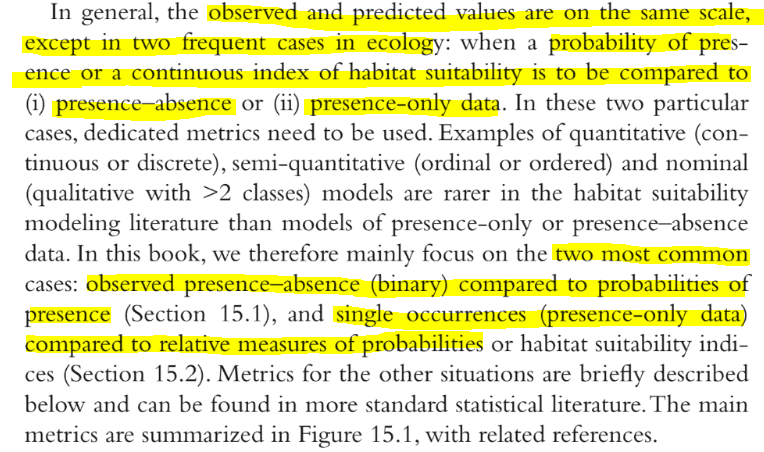

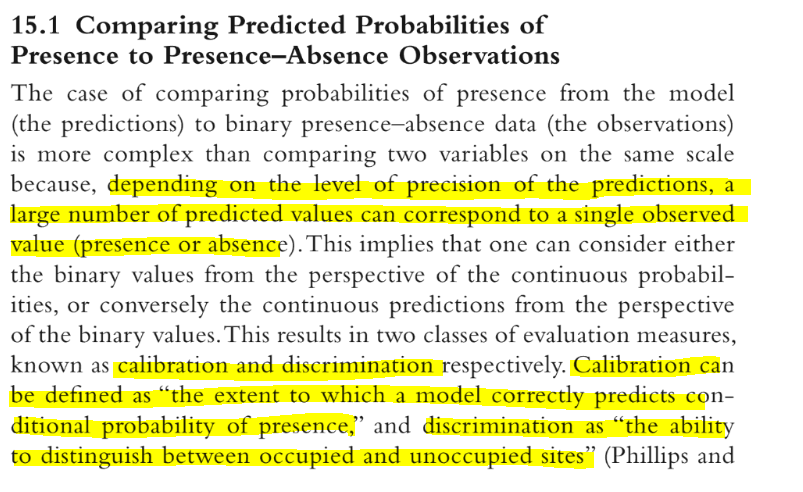

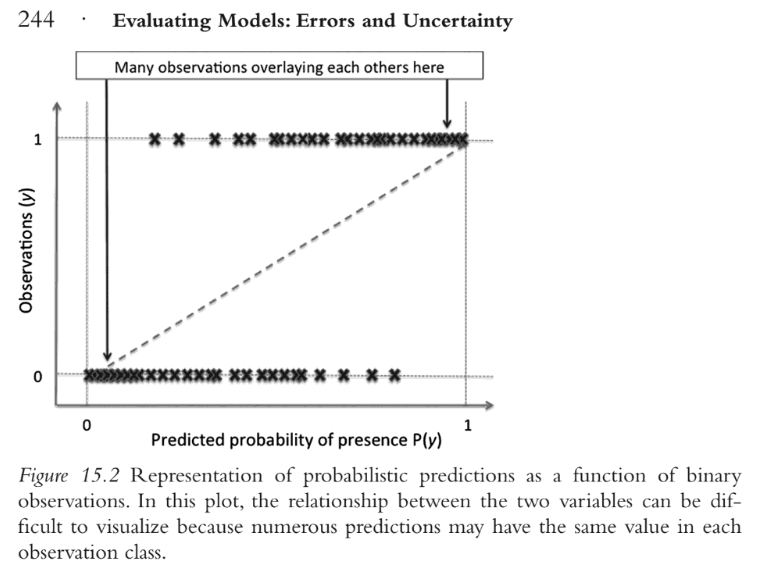

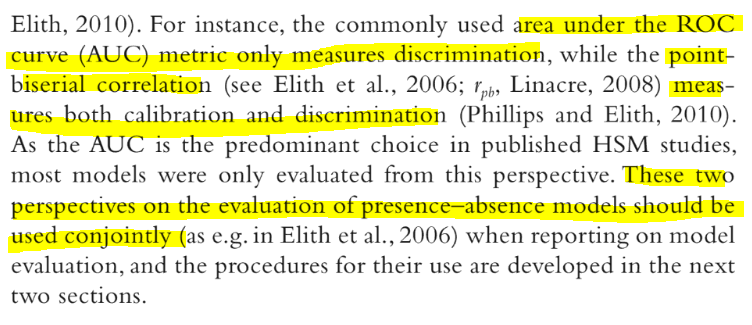

## Prinicipal Component Analysis (PCA)
https://www.osgdigitallabs.com/blogs/2018/4/3/dimensionality-reduction
<br>
https://stats.stackexchange.com/questions/159705/would-pca-work-for-boolean-binary-data-types

In [ ]:
import pandas as pd

In [ ]:
env_species_matrix = pandas.read_csv("simulated_samples.txt", dtype="int", sep=" ", header=None)
print(env_species_matrix.shape)
suitability_matrix = pandas.read_csv("true_suitability.txt", dtype="float", sep=" ", header=None)
print(suitability_matrix.shape)

column_names = ['Species ' + str(i + 1) for i in range(env_species_matrix.shape[1])]
print(column_names[0] + ' ... ' + column_names[-1])
row_names = ['Area ' + str(i + 1) for i in range(env_species_matrix.shape[0])]
print(row_names[0] + ' ... ' + row_names[-1])

env_species_matrix.columns = column_names

In [ ]:
X = np.array([[-1, -1, -1], [-2, -1, -1]])
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)

In [ ]:
from sklearn.decomposition import PCA

env_species_matrix_T = env_species_matrix.T
pca = PCA(n_components=5)
pca.fit(env_species_matrix_T)

In [ ]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

In [ ]:
pca = PCA(n_components=5, svd_solver='full')
pca.fit(env_species_matrix_T)

In [ ]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

In [ ]:
pca = PCA(n_components=5, svd_solver='arpack')
pca.fit(env_species_matrix_T)

In [ ]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

<h3>explained_variance_ratio_-s are super low for even first PCs so don't think that any of the components can be removed just yet</h3>

In [ ]:
env_species_matrix = np.loadtxt("simulated_samples.txt", dtype="int")
print(env_species_matrix.shape)
suitability_matrix = np.loadtxt("true_suitability.txt", dtype="float")
print(suitability_matrix.shape)

pca_eco = PCA(n_components=5, svd_solver='arpack')
pca_eco.fit(suitability_matrix)

In [ ]:
print(pca_eco.explained_variance_ratio_)
print(pca_eco.singular_values_)

In [ ]:
# Lets test PCA on one of our generated NMFs
generated_matrix = None
factorizer = NMF(n_components = 5, max_iter = 2000, solver="cd", tol=10e-6)
W = factorizer.fit_transform(env_species_matrix)
H = factorizer.components_

In [ ]:
regenerated_matrix = factorizer.inverse_transform(W)
generated_matrix = regenerated_matrix
missing_species_suggested_values = regenerated_matrix.flatten()
missing_species_true_suitabilities = suitability_matrix.flatten()
print("n_comp:", n_comp, scipy.stats.spearmanr(missing_species_suggested_values, missing_species_true_suitabilities))
    
print(generated_matrix)    

In [ ]:
pca_ours = PCA(n_components=5, svd_solver='arpack')
pca_ours.fit(generated_matrix)
print(pca_ours.explained_variance_ratio_)
print(pca_ours.singular_values_)

## Multiple Correspondence Analysis (MCA)
https://www.osgdigitallabs.com/blogs/2018/4/3/dimensionality-reduction
<br>
https://stats.stackexchange.com/questions/159705/would-pca-work-for-boolean-binary-data-types
<br>
https://pypi.org/project/mca/
<br>
https://github.com/esafak/mca
<br>
http://vxy10.github.io/2016/06/10/intro-MCA/
<br>
"It is not possible to apply PCA techniques for dimensionality reduction when the data is composed of categorical variables. Luckily there exists Multiple Correspondance Analysis (MCA), a PCA-like technique developed for categorical data. MCA has been successfully applied for clustering in genomic data or population surveys." - should still try PCA also as some others claim that PCA still may be useful.
<br>

In [ ]:
import mca, pandas, numpy as np

In [ ]:
env_species_matrix = pandas.read_csv("simulated_samples.txt", dtype="int", sep=" ", header=None)
print(env_species_matrix.shape)
suitability_matrix = pandas.read_csv("true_suitability.txt", dtype="float", sep=" ", header=None)
print(suitability_matrix.shape)

In [ ]:
column_names = ['Species ' + str(i + 1) for i in range(env_species_matrix.shape[1])]
print(column_names[0] + ' ... ' + column_names[-1])
row_names = ['Area ' + str(i + 1) for i in range(env_species_matrix.shape[0])]
print(row_names[0] + ' ... ' + row_names[-1])

In [ ]:
#env_species_matrix.columns = column_names
print(env_species_matrix.columns)
print(env_species_matrix.T.columns)
print(env_species_matrix.T.shape)
#print(env_species_matrix.rows)

In [ ]:
# https://github.com/esafak/mca/blob/master/docs/usage.rst

env_species_matrix_T = env_species_matrix.T
mca_ben = mca.MCA(env_species_matrix_T)
mca_ind = mca.MCA(env_species_matrix_T, benzecri=False)

fs_r_ben = mca_ben.fs_r(1) # 1 = 100%, meaning preserve all variance.
#print(fs_r_ben)
print(len(fs_r_ben))
print(len(fs_r_ben[0]))

fs_r_ind = mca_ind.fs_r(1) # 1 = 100%, meaning preserve all variance.
#print(fs_r_ind)
print(len(fs_r_ind))
print(len(fs_r_ind[0]))

In [ ]:
data = {'Iλ': pandas.Series(mca_ind.L),
        'τI': mca_ind.expl_var(greenacre=False, N=999),
        'Zλ': pandas.Series(mca_ben.L),
        'τZ': mca_ben.expl_var(greenacre=False, N=999),
        'cλ': pandas.Series(mca_ben.L),
        'τc': mca_ind.expl_var(greenacre=True, N=999)}

# 'Indicator Matrix', 'Benzecri Correction', 'Greenacre Correction'
columns = ['Iλ', 'τI', 'Zλ', 'τZ', 'cλ', 'τc']
table2 = pandas.DataFrame(data=data, columns=columns).fillna(0)
table2.index += 1
table2.loc['Σ'] = table2.sum()
table2.index.name = 'Factor'

table2

In [ ]:
print('The eigenvalues, or principal inertias, of the factors:')
print(len(mca_ben.L))
print(mca_ben.L)

print('The inertia is simply the sum of the principle inertias:')
print(mca_ben.inertia, mca_ben.L.sum())

print('If Benzecri correction has been enabled (default), this is less than the the squared sum of the singular values:')
print(mca_ben.s)
print(sum(mca_ben.s**2))

In [ ]:
print('The eigenvalues, or principal inertias, of the factors:')
print(len(mca_ind.L))
print(mca_ind.L)

print('The inertia is simply the sum of the principle inertias:')
print(mca_ind.inertia, mca_ind.L.sum())

print('If Benzecri correction has been enabled (default), this is less than the the squared sum of the singular values:')
print(mca_ind.s)
print(sum(mca_ind.s**2))

In [ ]:
print('The eigenvalues, or principal inertias, of the factors:')
print(len(mca_ben.L))
print([e for e in mca_ben.L if e > 0.03])

In [ ]:
print('The eigenvalues, or principal inertias, of the factors:')
print(len(mca_ind.L))
print([e for e in mca_ind.L if e > 0])



## Latent Diriclet allocation

## CorEx from Greg van Steeg from University of Southern California
https://stats.stackexchange.com/questions/159705/would-pca-work-for-boolean-binary-data-types
<br>
https://github.com/gregversteeg/CorEx
<br>
https://arxiv.org/pdf/1410.7404.pdf

## Vector quantization

In [ ]:
Kendall vs Spearman vs ?what is three?

Latent Diriclet allocation
